In [1]:
import gym
from gym import spaces
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t, mode
from tqdm import tqdm
from multiprocessing import Pool

import agents
import environments
from utility import print_gridworld_with_policy, print_heatmap, plot_graph

2023-09-12 01:17:01.467044: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-12 01:17:01.543685: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-12 01:17:01.544473: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-12 01:17:03.072150: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# GLOBAL VARIABLES
confidence = 0.95

# Gridworld MDP

In [9]:
# Create the Gridworld environment and the REINFORCE agent
env = environments.GridworldEnv(time_horizon=20)

## Reward Reinforce Agent MDP

**Test Reward MDP single sampling**

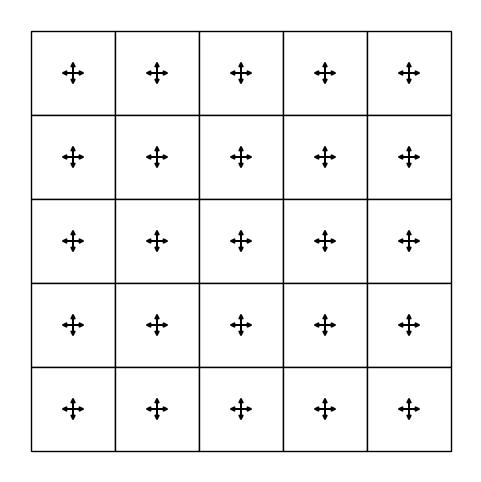

In [10]:
# Create the REINFORCE agent
agent = agents.REINFORCEAgent(env)

# Print the starting policy
print_gridworld_with_policy(agent, env, title="Starting Policy")


 33%|████████████▏                        | 1973/6000 [00:02<00:03, 1160.87it/s]

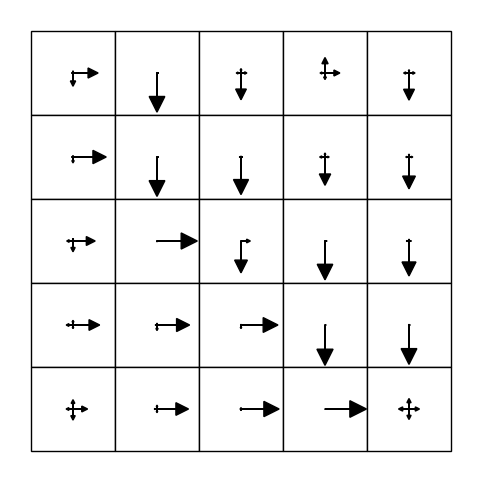

 66%|████████████████████████▌            | 3977/6000 [00:04<00:01, 1211.36it/s]

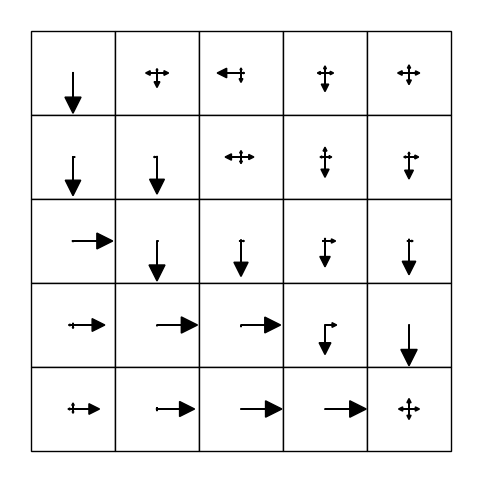

 99%|████████████████████████████████████▊| 5962/6000 [00:06<00:00, 1205.26it/s]

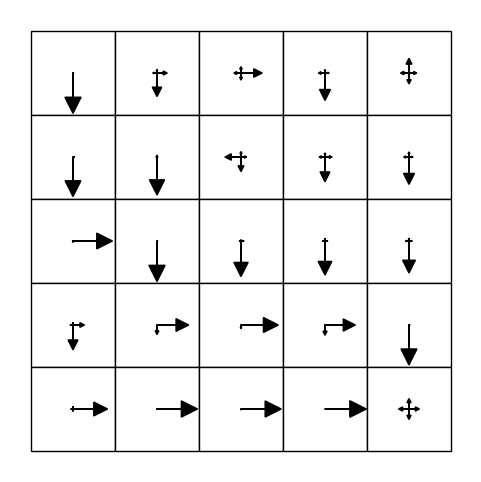

100%|██████████████████████████████████████| 6000/6000 [00:07<00:00, 819.48it/s]


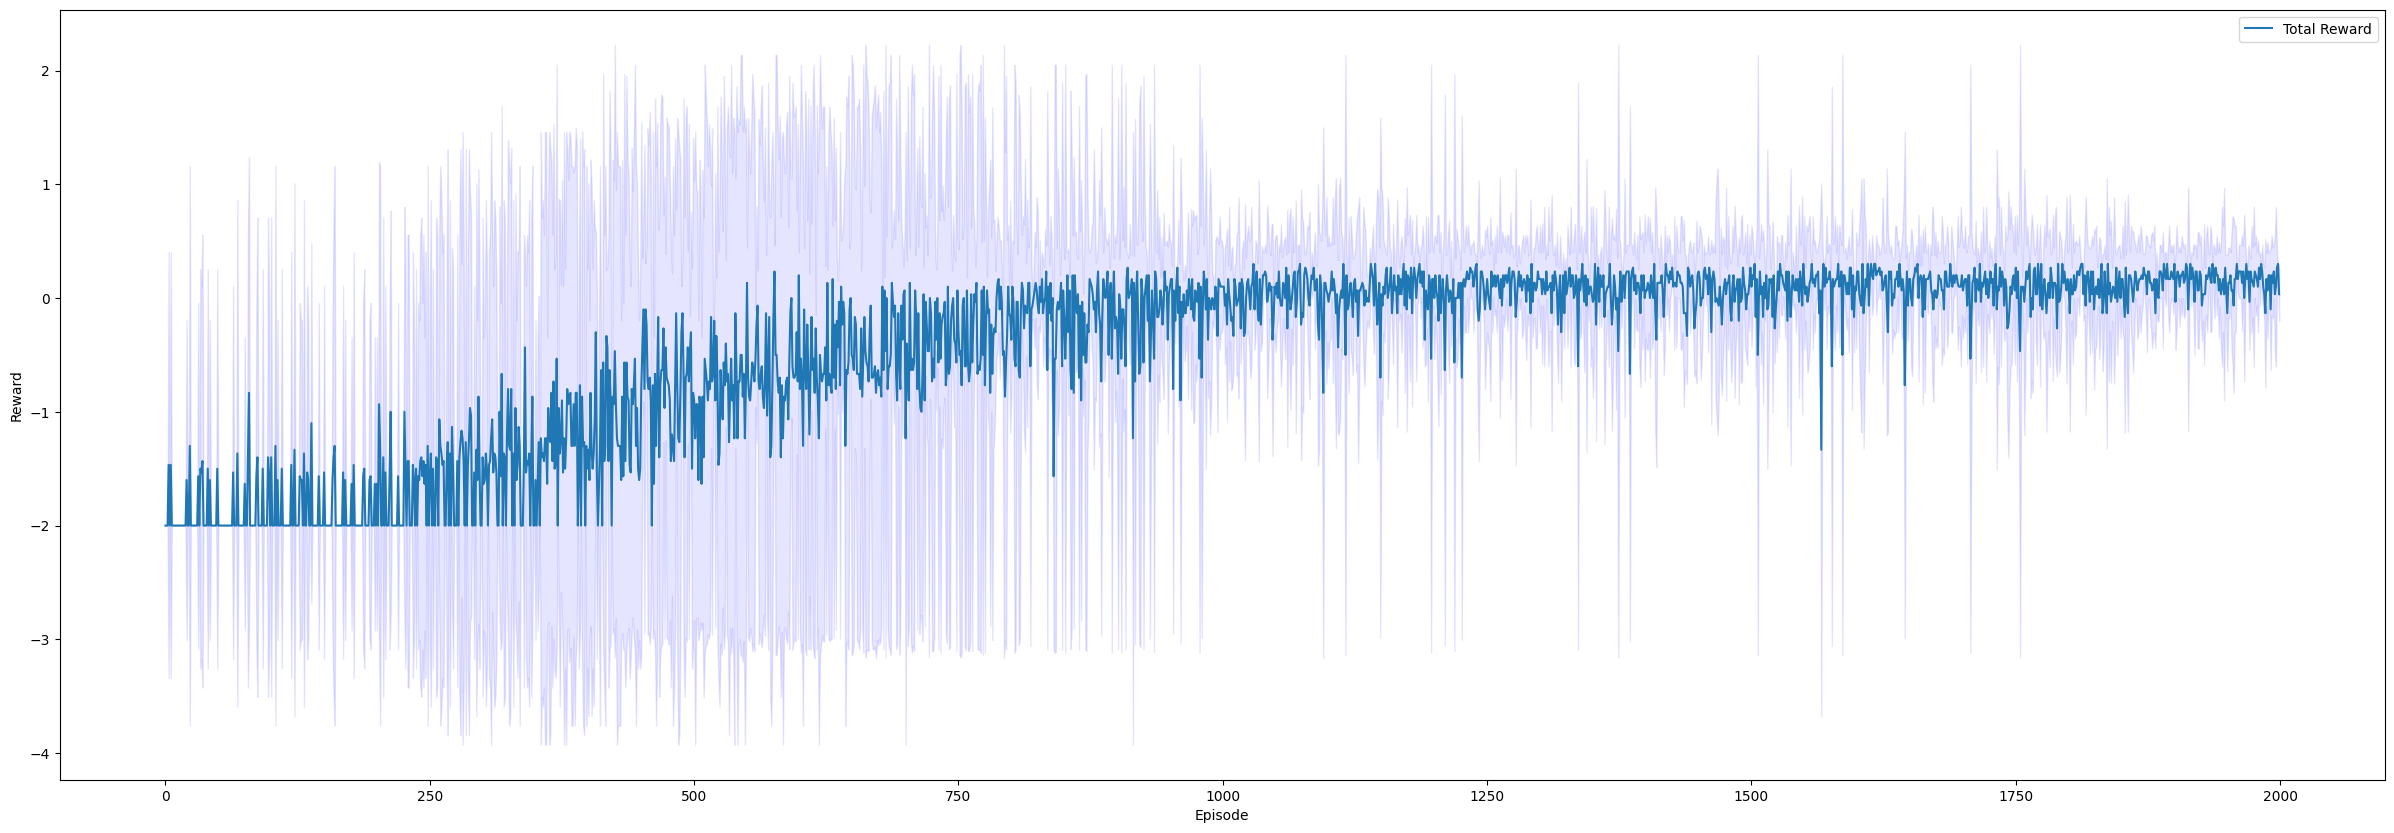

In [11]:
# Create the Gridworld environment and the REINFORCE agent
n_episodes = 2000
#number of run per episode
n_run = 3

# Train the agent and plot the rewards
list_total_rewards = []
with tqdm(total=n_run * n_episodes, ncols=80) as pbar:
    for r in range(n_run):
        # Initialize the agent
        agent = agents.REINFORCEAgent(env, alpha=0.1)
        # Initialize the rewards array
        total_rewards = []
        for i in range(n_episodes):
            # Play the environment
            episode, total_reward = agent.play(env)
            # Save the reward
            total_rewards.append(total_reward)
            # Update the policy
            agent.update_single_sampling(episode)
            pbar.update(1)
        # Save the rewards over the run
        list_total_rewards.append(total_rewards)
        # Print the ending policy
        print_gridworld_with_policy(agent, env)
# Adjust the representation of the rewards
list_total_rewards = np.transpose(np.array(list_total_rewards), (1,0))

# Prepare values to print
plot_args = {}

total_rewards_means = np.mean(list_total_rewards, axis=1)
total_rewards_stds = np.std(list_total_rewards, axis=1)
plot_args["Total Reward"] = [total_rewards_means, total_rewards_stds]
plot_graph(n_run, n_episodes, plot_args, confidence, 'Reward', 'Reward MDP single sampling')

**Test Reward MDP multiple sampling**

  0%|                                                   | 0/500 [00:00<?, ?it/s]

 19%|████████▏                                 | 97/500 [00:02<00:07, 50.99it/s]

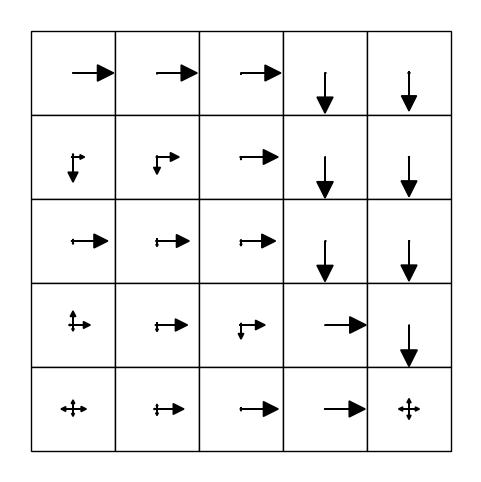

 40%|████████████████▏                        | 198/500 [00:04<00:06, 50.19it/s]

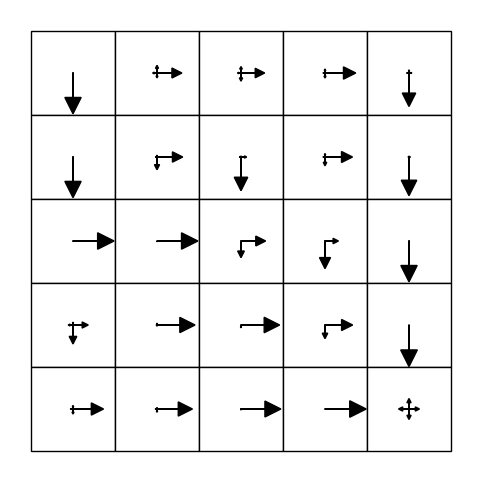

 60%|████████████████████████▍                | 298/500 [00:07<00:04, 49.25it/s]

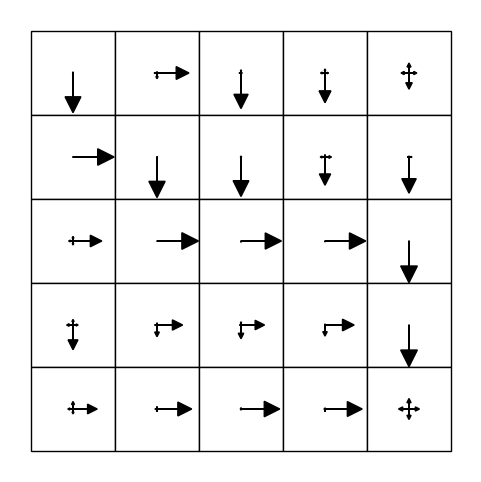

 79%|████████████████████████████████▌        | 397/500 [00:10<00:02, 51.12it/s]

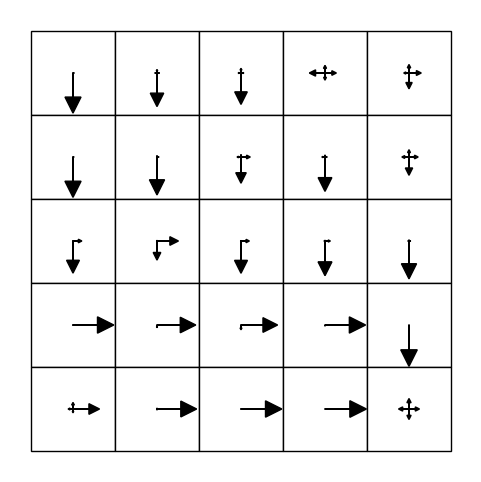

 99%|████████████████████████████████████████▋| 496/500 [00:12<00:00, 50.47it/s]

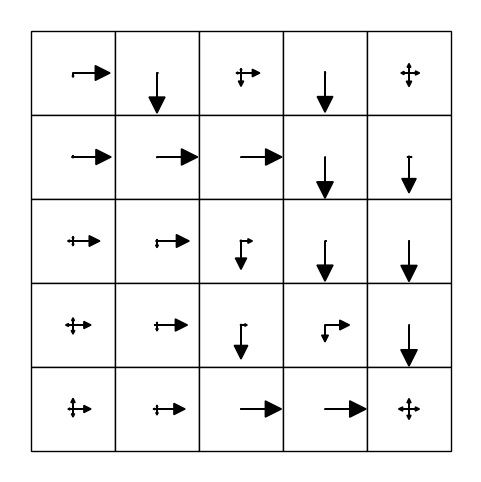

100%|█████████████████████████████████████████| 500/500 [00:13<00:00, 37.85it/s]


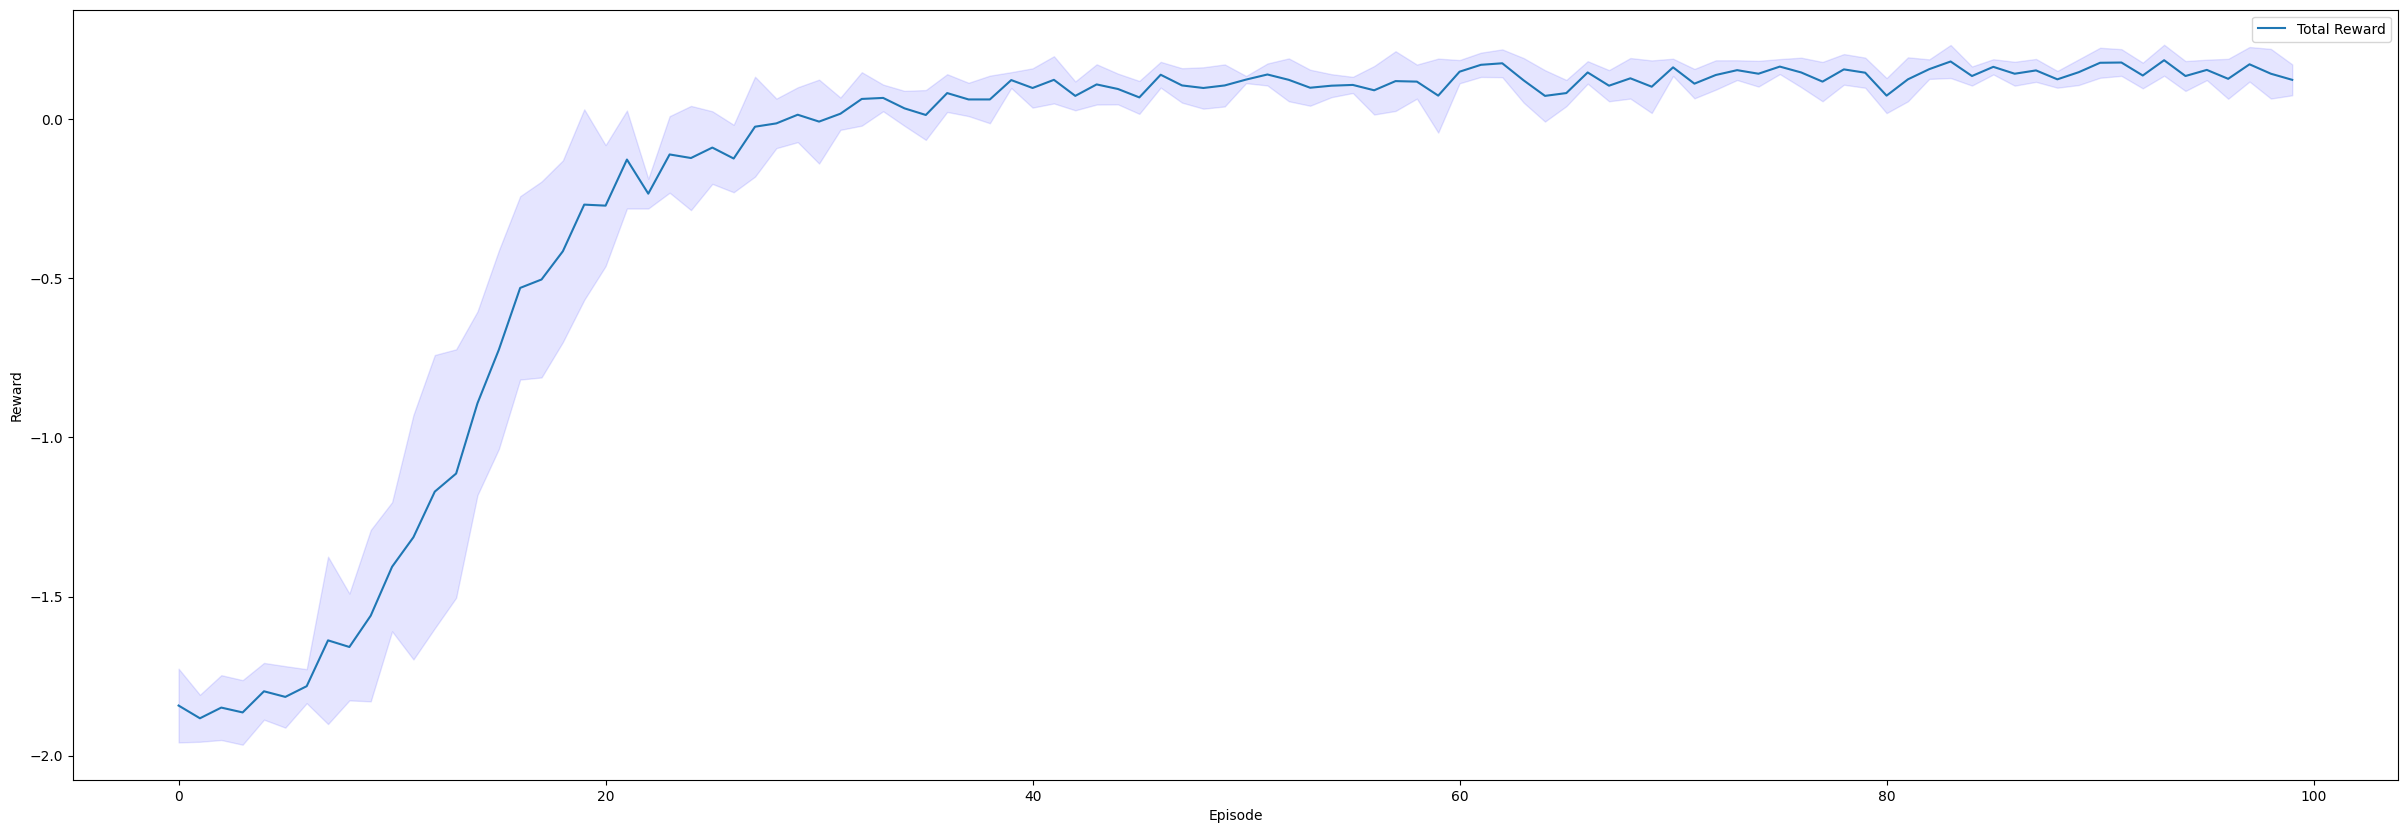

In [12]:
# Create the Gridworld environment and the REINFORCE agent
n_episodes = 100
# Number of sampled trajectories per episode
n_traj = 25
#number of run per episode
n_run = 5

# Train the agent and plot the rewards
list_total_rewards = []
with tqdm(total=n_run * n_episodes, ncols=80) as pbar:
    for r in range(n_run):
        # Initialize the agent
        agent = agents.REINFORCEAgent(env, alpha=3)
        # Initialize the average rewards array
        total_avg_rewards = []
        for i in range(n_episodes):
            # Play the environment
            episodes, total_rewards = agent.play(env, n_traj)
            # Update the policy
            agent.update_multiple_sampling(episodes)
            # Compute the average the reward in the episode and save it
            total_avg_rewards.append(np.mean(total_rewards))
            pbar.update(1)
        # Save the average rewards over the run
        list_total_rewards.append(total_avg_rewards)
        # Print the ending policy
        print_gridworld_with_policy(agent, env)
# Adjust the representation of the rewards
list_total_rewards = np.transpose(np.array(list_total_rewards), (1,0))

# Prepare values to print
plot_args = {}

total_rewards_means = np.mean(list_total_rewards, axis=1)
total_rewards_stds = np.std(list_total_rewards, axis=1)
plot_args["Total Reward"] = [total_rewards_means, total_rewards_stds]
plot_graph(n_run, n_episodes, plot_args, confidence, 'Reward', 'Reward MDP multiple sampling')

## Entropy Reinforce Agent MDP

In [3]:
env = environments.GridworldEnvGoalless(time_horizon=25)

**Look of an optimal policy**

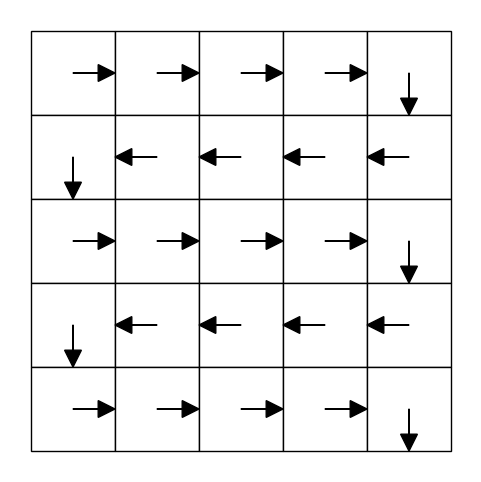

In [4]:

agent = agents.REINFORCEAgentE(env=env ,policy=1)
print_gridworld_with_policy(agent, env)

**Optimal Policy deterministic**

100%|████████████████████████████████████| 10000/10000 [00:21<00:00, 457.21it/s]


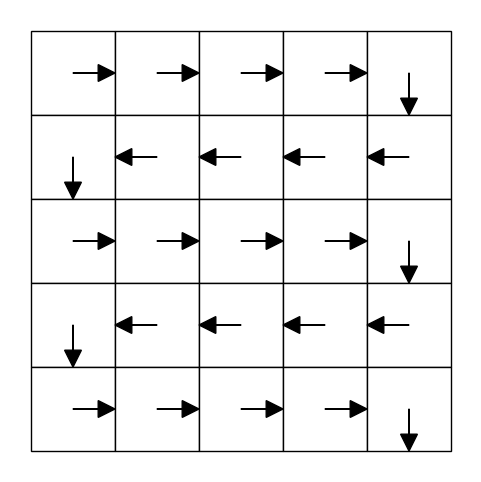

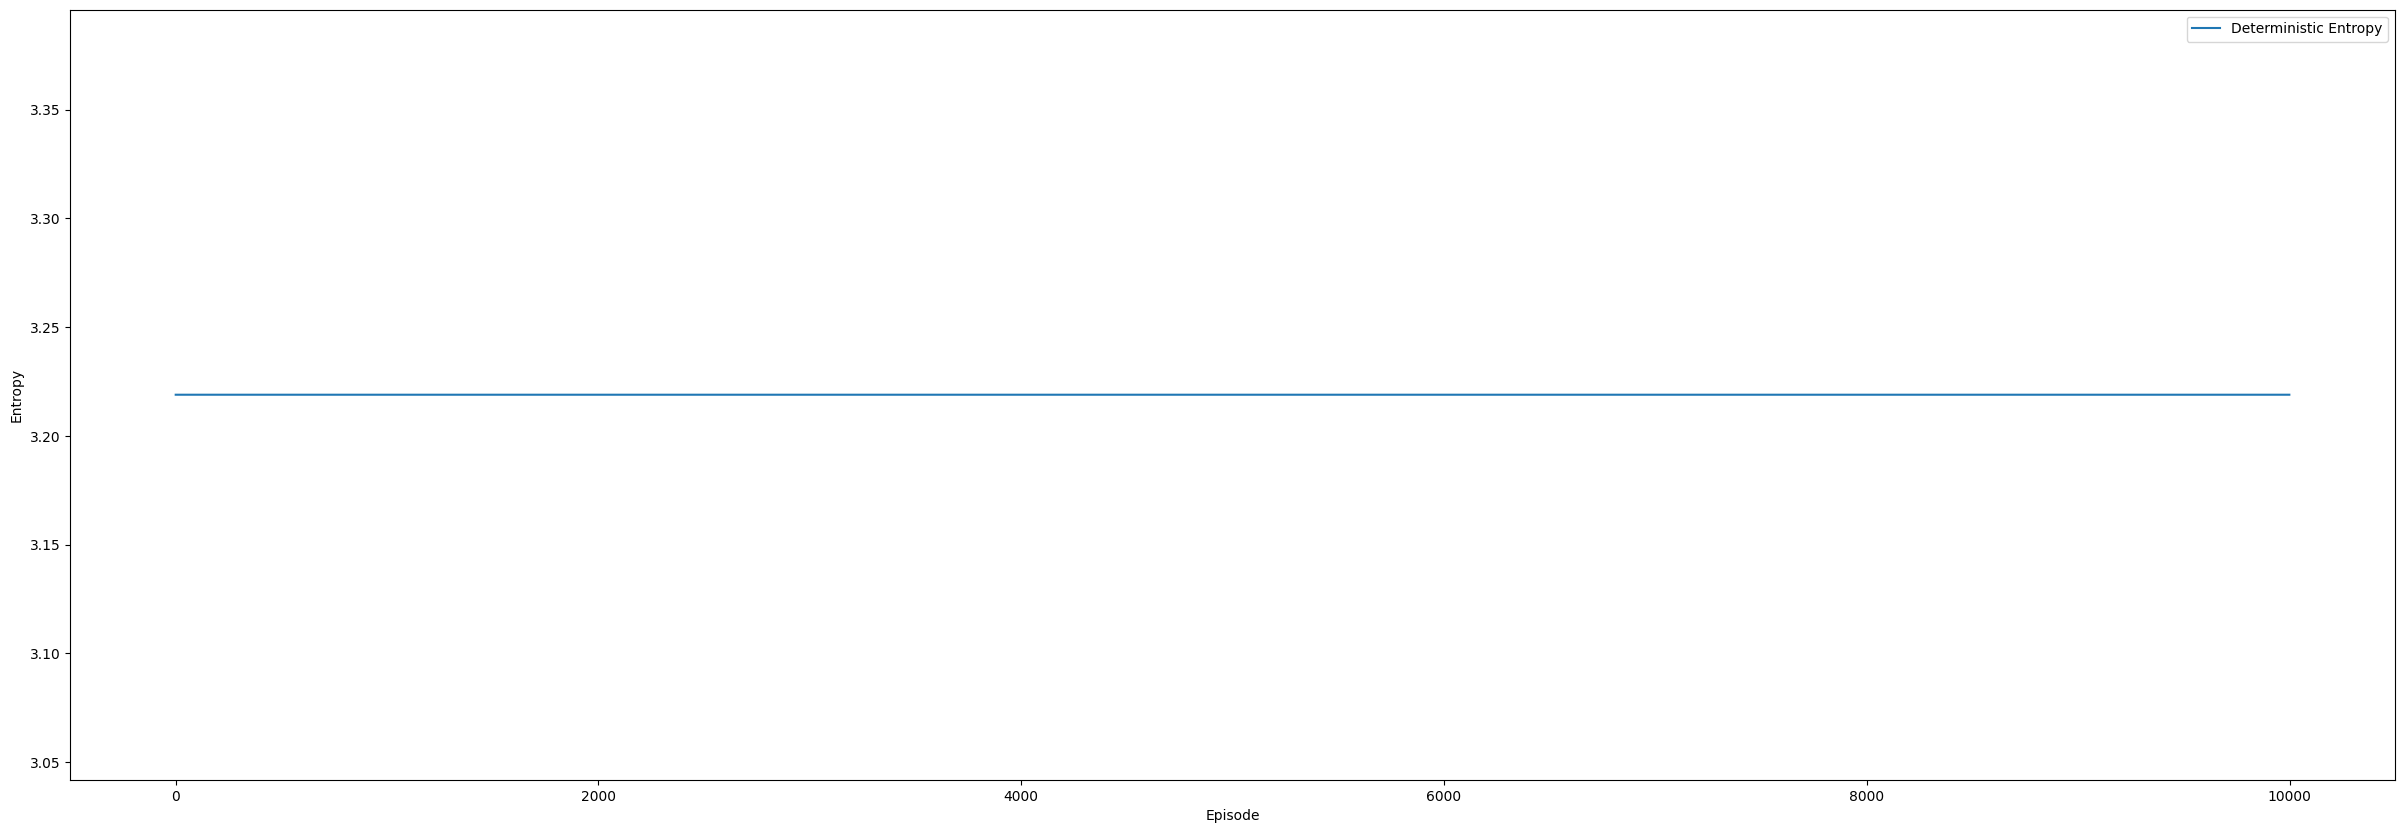

In [5]:
# Number of episodes for the training
n_episodes = 10000
# Initialize the environment
env = environments.GridworldEnvGoalless(time_horizon = 25, prob= 0)
# Number of times the learning is executed
n_run = 1

# Train the agent and plot the rewards
list_true_entropies = []
with tqdm(total=n_run * n_episodes, ncols=80) as pbar:
    for r in range(n_run):
        # Initialize the agent
        agent = agents.REINFORCEAgentE(env, policy=1)
        # Initialize the rewards array
        entropies = []
        for i in range(n_episodes):
            # Play the environment
            episode, d_t = agent.play(env)
            # Update the policy
            entropy = agent.update_single_sampling(episode, d_t)
            # Save the entropy
            entropies.append(entropy)
            pbar.update(1)
        # Save the rewards over the run
        list_true_entropies.append(entropies)
    # Adjust the representation of the entropies
    list_true_entropies = np.transpose(np.array(list_true_entropies), (1,0))

# Print the ending policy
print_gridworld_with_policy(agent, env)

# Prepare values to print
plot_args = {}

true_entropies_means = np.mean(list_true_entropies, axis=1)
true_entropies_stds = np.std(list_true_entropies, axis=1)
plot_args['Deterministic Entropy'] = [true_entropies_means, true_entropies_stds]
optimal_deterministic_result = plot_args
plot_graph(n_run, n_episodes, plot_args, confidence, 'Entropy', 'Optimal Policy Deterministic')

**Optimal Policy stochastic**
Increasing the number of runs doesn't make the variance of the curve smaller

100%|████████████████████████████████████| 50000/50000 [01:26<00:00, 577.57it/s]


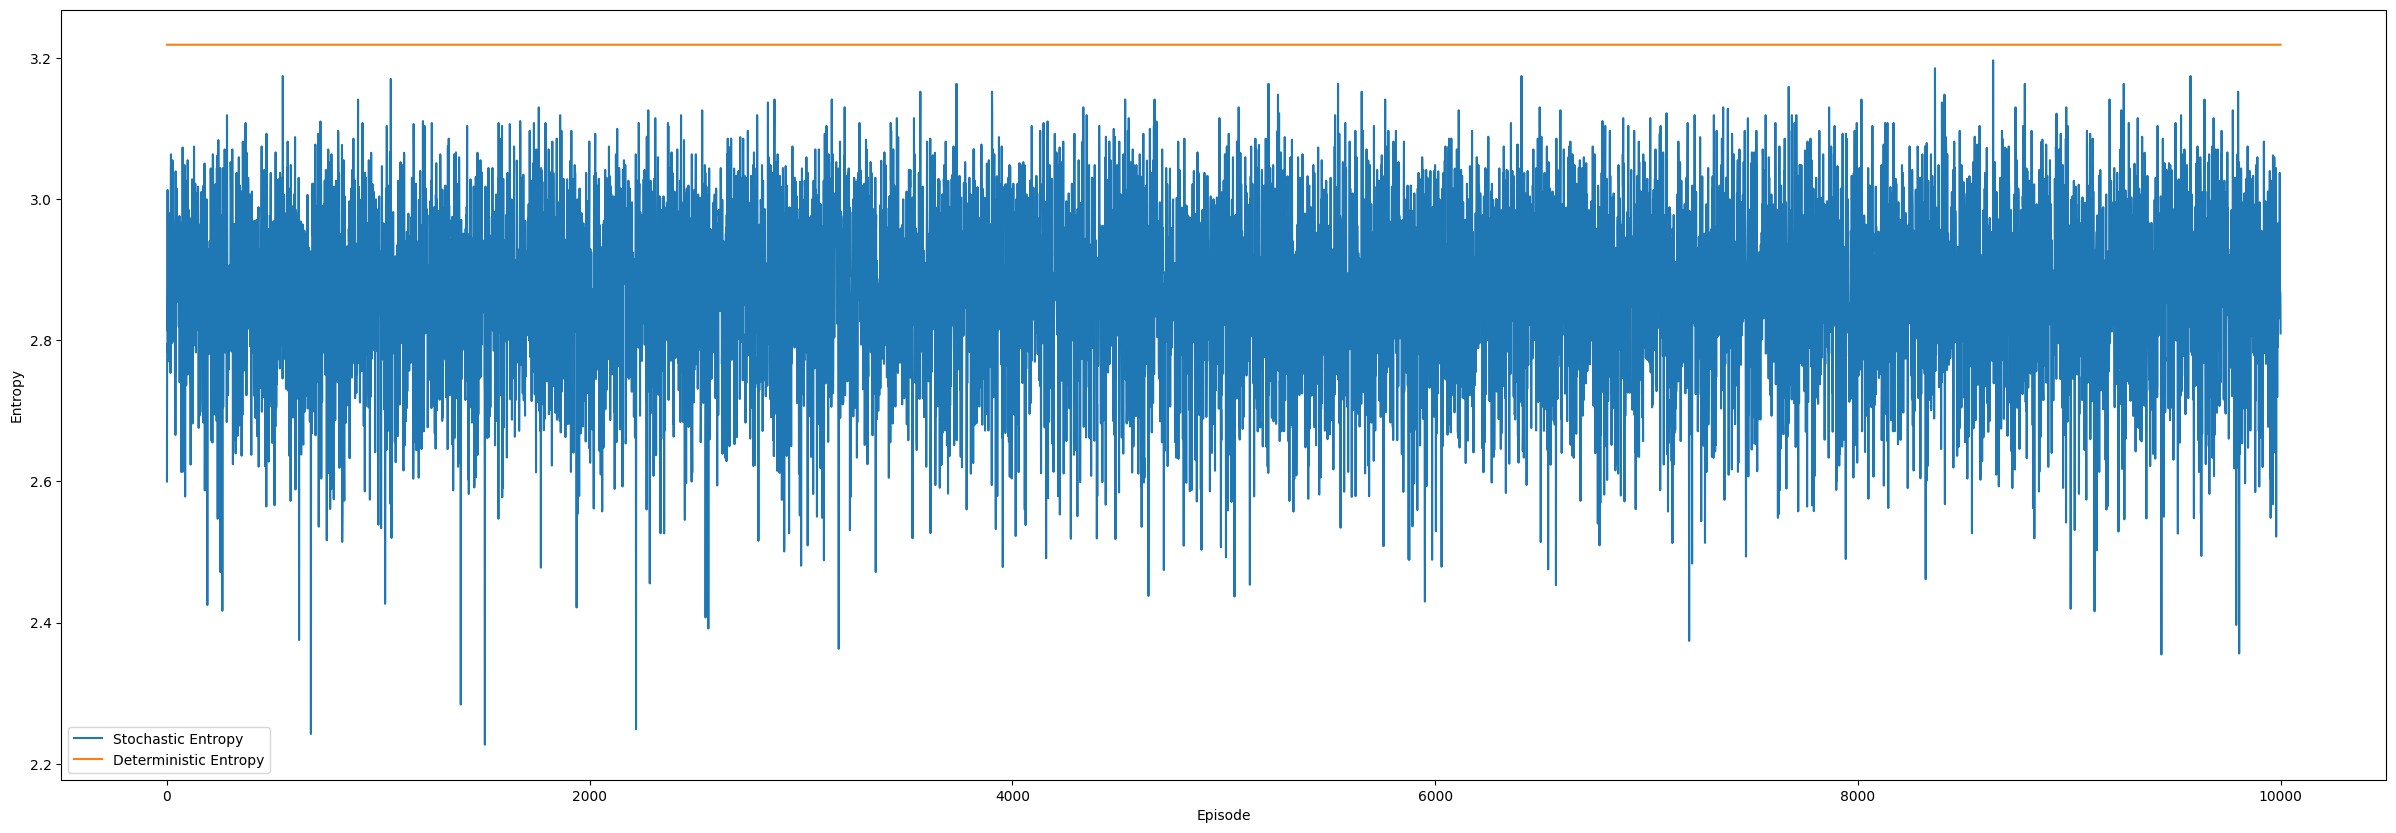

In [6]:
n_episodes = 10000
env = environments.GridworldEnvGoalless(time_horizon = 25, prob= 0.1)
# Number of runs per episode
n_run = 5

# Train the agent and plot the rewards
list_true_entropies = []
with tqdm(total=n_run * n_episodes, ncols=80) as pbar:
    for r in range(n_run):
        # Initialize the agent
        agent = agents.REINFORCEAgentE(env, policy=1)
        # Initialize the array of entropies over the episodes
        entropies = []
        for i in range(n_episodes):
            # Play the environment
            entropy, d_t = agent.play(env)
            # Compute the entropy
            entropy = agent.compute_entropy(d_t)
            # Save the entropy
            entropies.append(entropy)
            pbar.update(1)
        # Save the entropies during the runs
        list_true_entropies.append(entropies)
    # Adjust the representation of the entropies
    list_true_entropies = np.transpose(np.array(list_true_entropies), (1,0))

# Prepare values to print
plot_args = {}

true_entropies_means = np.mean(list_true_entropies, axis=1)
true_entropies_stds = np.std(list_true_entropies, axis=1)
plot_args['Stochastic Entropy'] = [true_entropies_means, true_entropies_stds]
plot_args.update(optimal_deterministic_result)
optimal_stochastic_result = plot_args
plot_graph(n_run, n_episodes, plot_args, confidence, 'Entropy', 'Entropy Policy Deterministic/Stochastic')

**UNIFORM**

**Test Entropy MDP single sampling deterministic**

  0%|                                                 | 0/50000 [00:00<?, ?it/s]

 20%|███████▍                             | 9972/50000 [00:20<01:22, 487.06it/s]

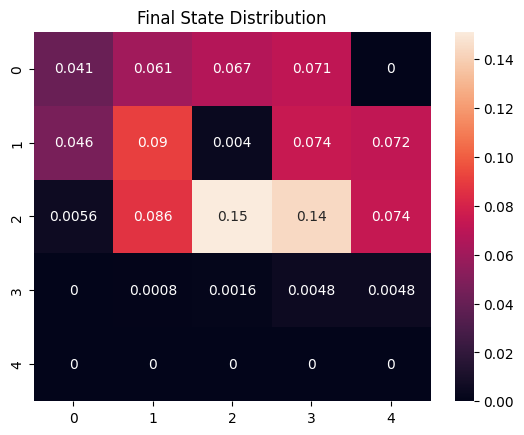

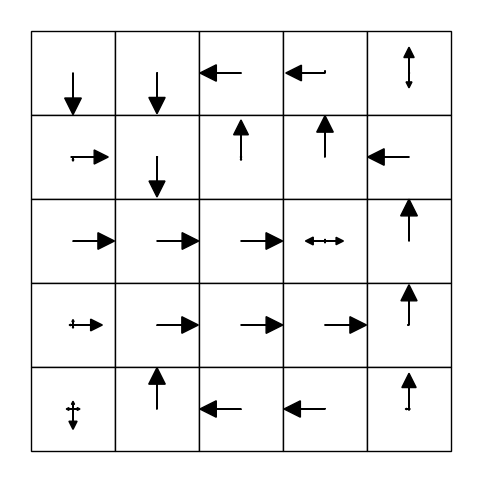

 40%|██████████████▍                     | 19968/50000 [00:41<01:01, 486.87it/s]

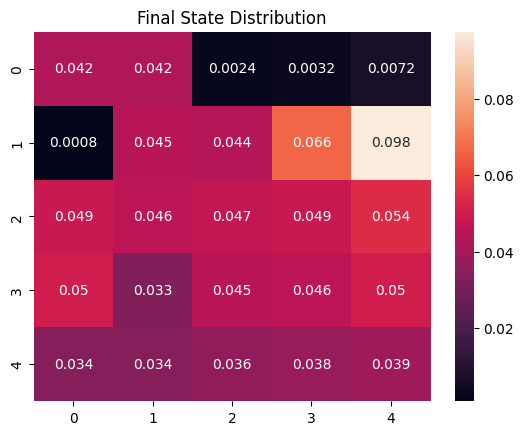

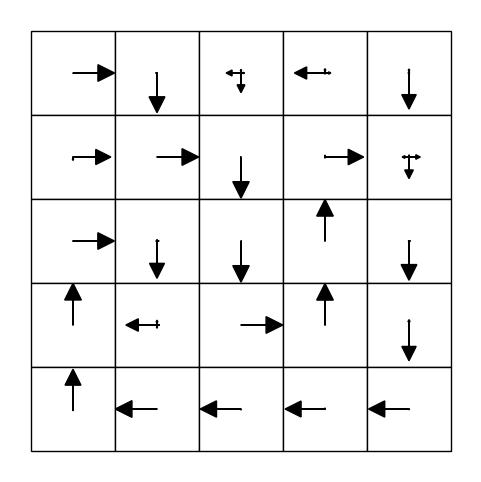

 60%|█████████████████████▌              | 29958/50000 [01:02<00:40, 489.69it/s]

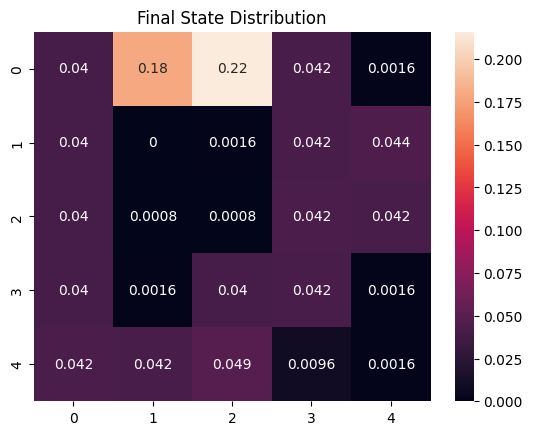

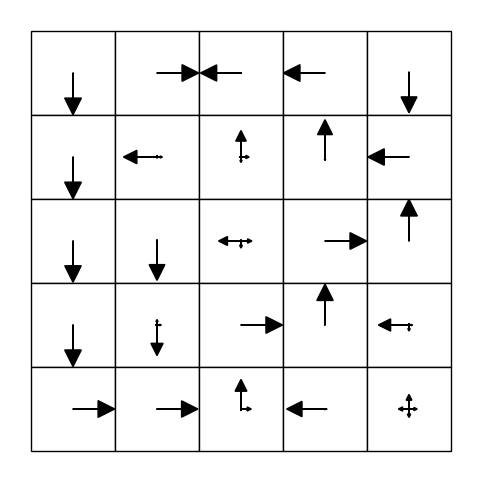

 80%|████████████████████████████▊       | 39995/50000 [01:23<00:20, 488.69it/s]

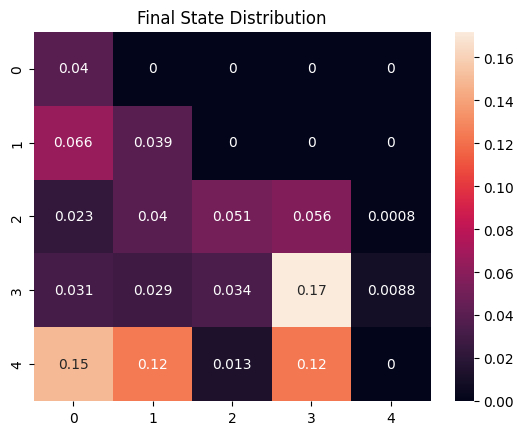

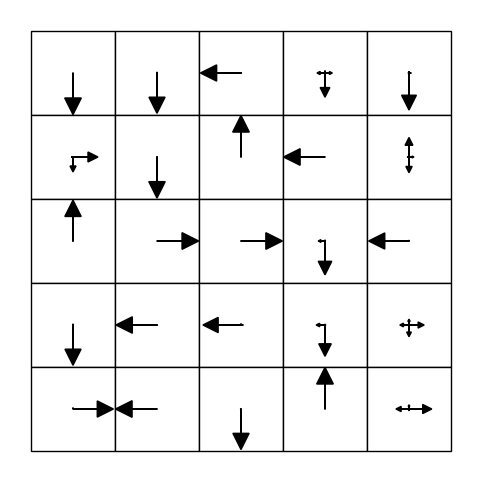

100%|███████████████████████████████████▉| 49974/50000 [01:44<00:00, 507.07it/s]

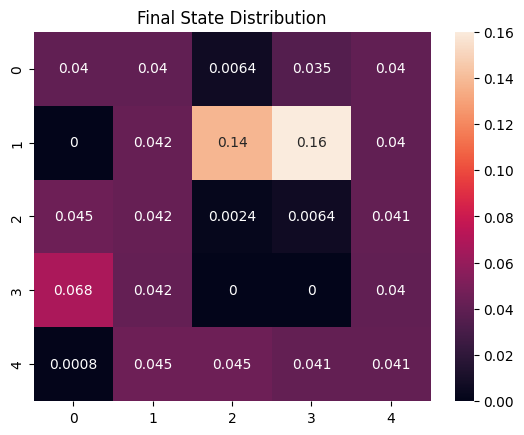

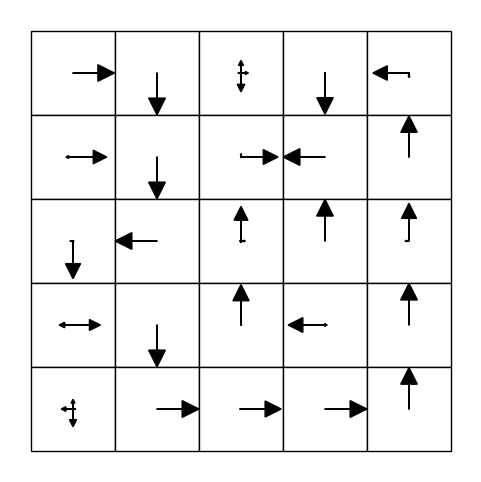

100%|████████████████████████████████████| 50000/50000 [01:45<00:00, 474.27it/s]


Stochastic Optimal mean: 2.870896222973462
Deterministic Learned mean: 2.4180456119389055


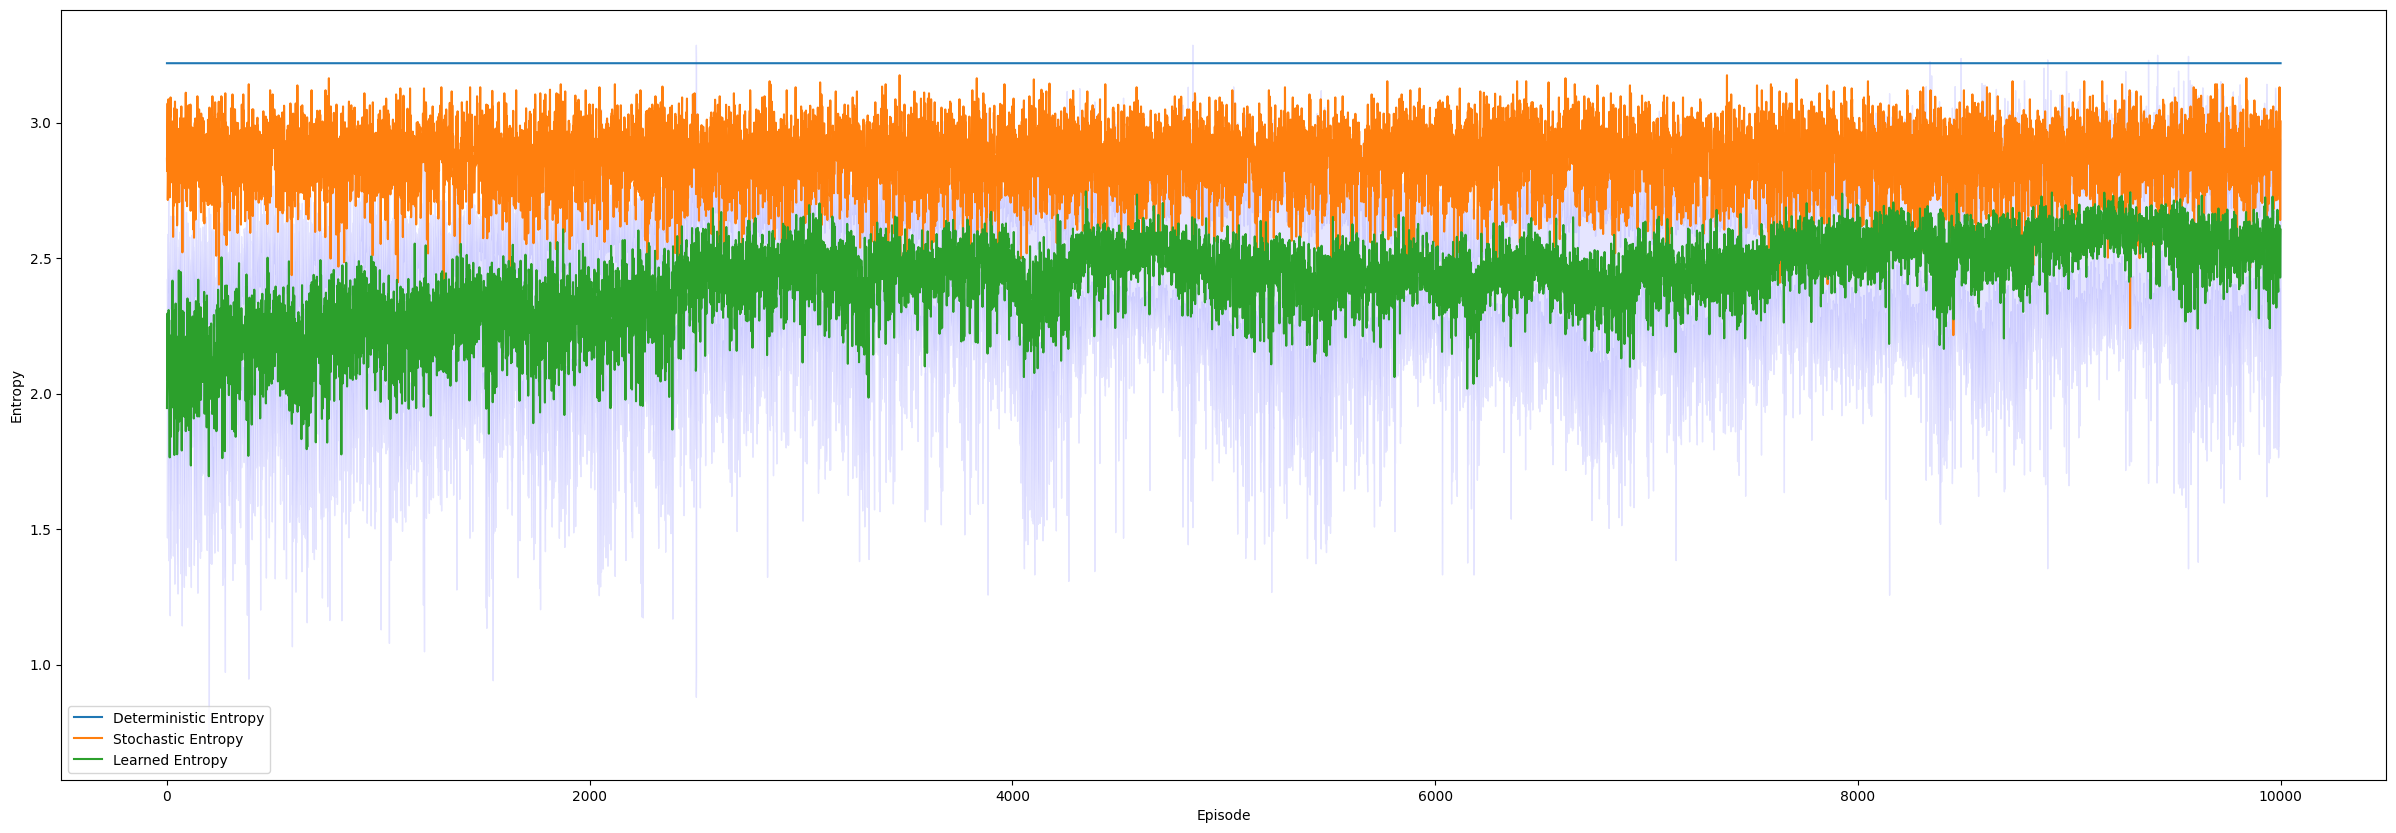

In [13]:
# Number of episodes for the training
n_episodes = 10000
# Initialize the environment
time_horizon = 25
env = environments.GridworldEnvGoalless(time_horizon = 25, prob=0)
# Number of runs per episode
n_run = 5
# Number of trajectories to print the visuals
n_traj = 50

# Train the agent and plot the rewards
list_true_entropies = []
with tqdm(total=n_run * n_episodes, ncols=80) as pbar:
    for r in range(n_run):
        # Initialize the agent
        agent = agents.REINFORCEAgentE(env, alpha=0.04)
        # Initialize the entropies array
        entropies = []
        # Training part
        for i in range(n_episodes):
            # Play the environment
            episode, d_t = agent.play(env)
            # Update the policy
            entropy = agent.update_single_sampling(episode, d_t)
            # Save the entropies
            entropies.append(entropy)
            pbar.update(1)
        # Print the policy and the expected state visitation
        agent.print_visuals(env, n_traj)
        # Save the entropies during the run
        list_true_entropies.append(entropies)
    # Adjust the representation of the entropies
    list_true_entropies = np.transpose(np.array(list_true_entropies), (1,0))

# Prepare values to print
plot_args = {}
plot_args.update(optimal_deterministic_result)
plot_args.update(optimal_stochastic_result)

true_entropies_means = np.mean(list_true_entropies, axis=1)
true_entropies_stds = np.std(list_true_entropies, axis=1)
plot_args['Learned Entropy'] = [true_entropies_means, true_entropies_stds]
plot_graph(n_run, n_episodes, plot_args, confidence, 'Entropy', 'Entropy Policy Deterministic/Stochastic')
print("Stochastic Optimal mean: " + str(np.mean(optimal_stochastic_result.get('Stochastic Entropy')[0])))
print("Deterministic Learned mean: " + str(np.mean(true_entropies_means)))

**Test Entropy MDP single sampling stochastic**

 20%|███████▍                             | 9983/50000 [00:20<01:22, 487.38it/s]

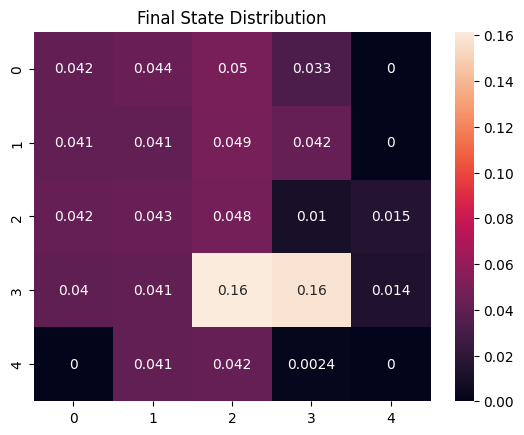

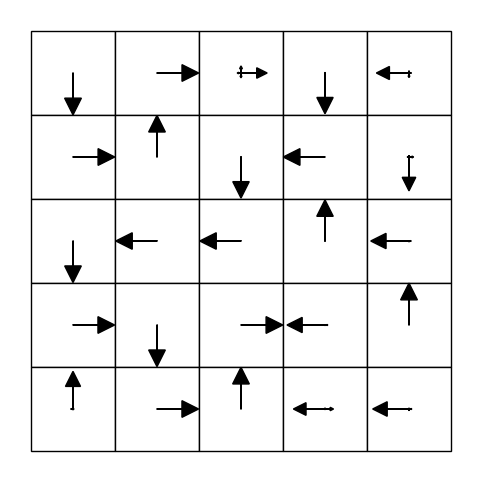

 40%|██████████████▍                     | 20000/50000 [00:41<01:03, 469.34it/s]

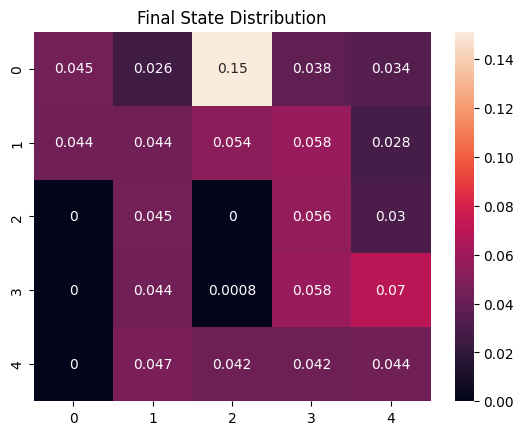

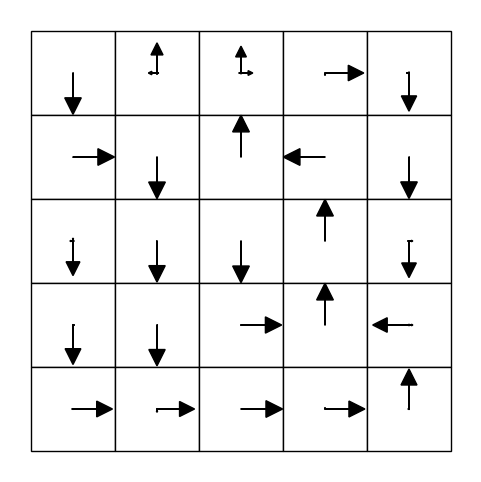

 60%|█████████████████████▌              | 29990/50000 [01:02<00:40, 492.82it/s]

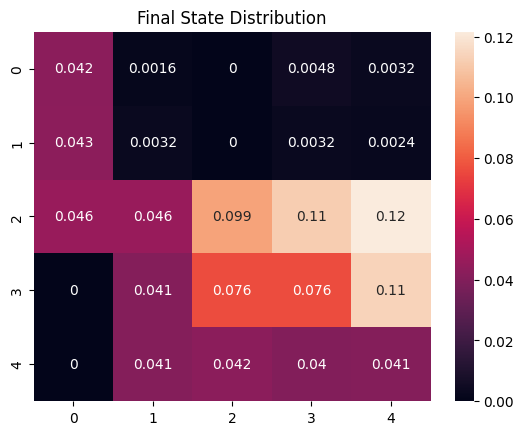

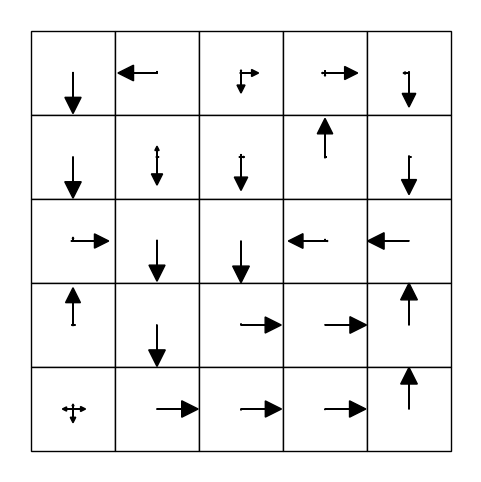

 80%|████████████████████████████▊       | 39970/50000 [01:23<00:20, 494.26it/s]

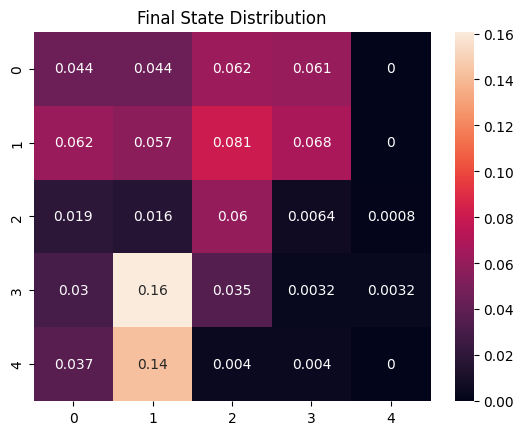

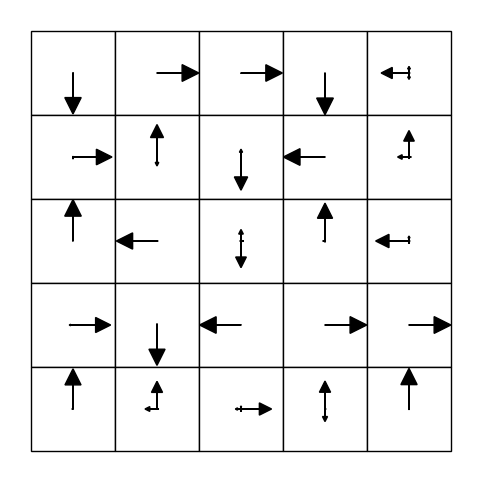

100%|███████████████████████████████████▉| 49953/50000 [01:44<00:00, 487.06it/s]

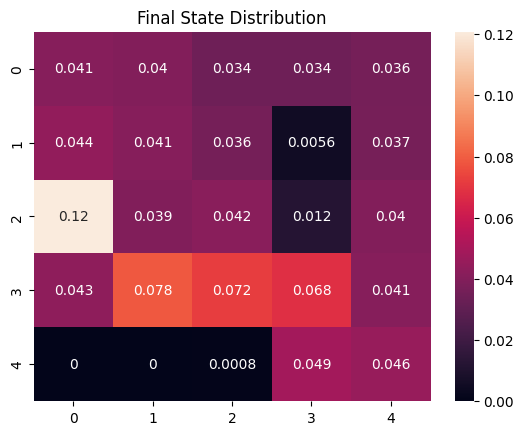

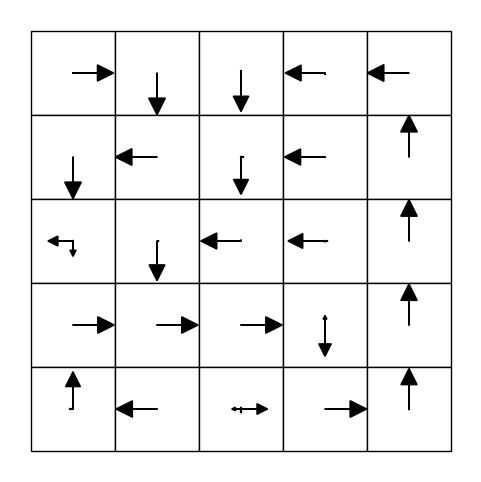

100%|████████████████████████████████████| 50000/50000 [01:45<00:00, 473.94it/s]


Stochastic Optimal mean: 2.870896222973462
Stochastic Learned mean: 2.6915443416421376


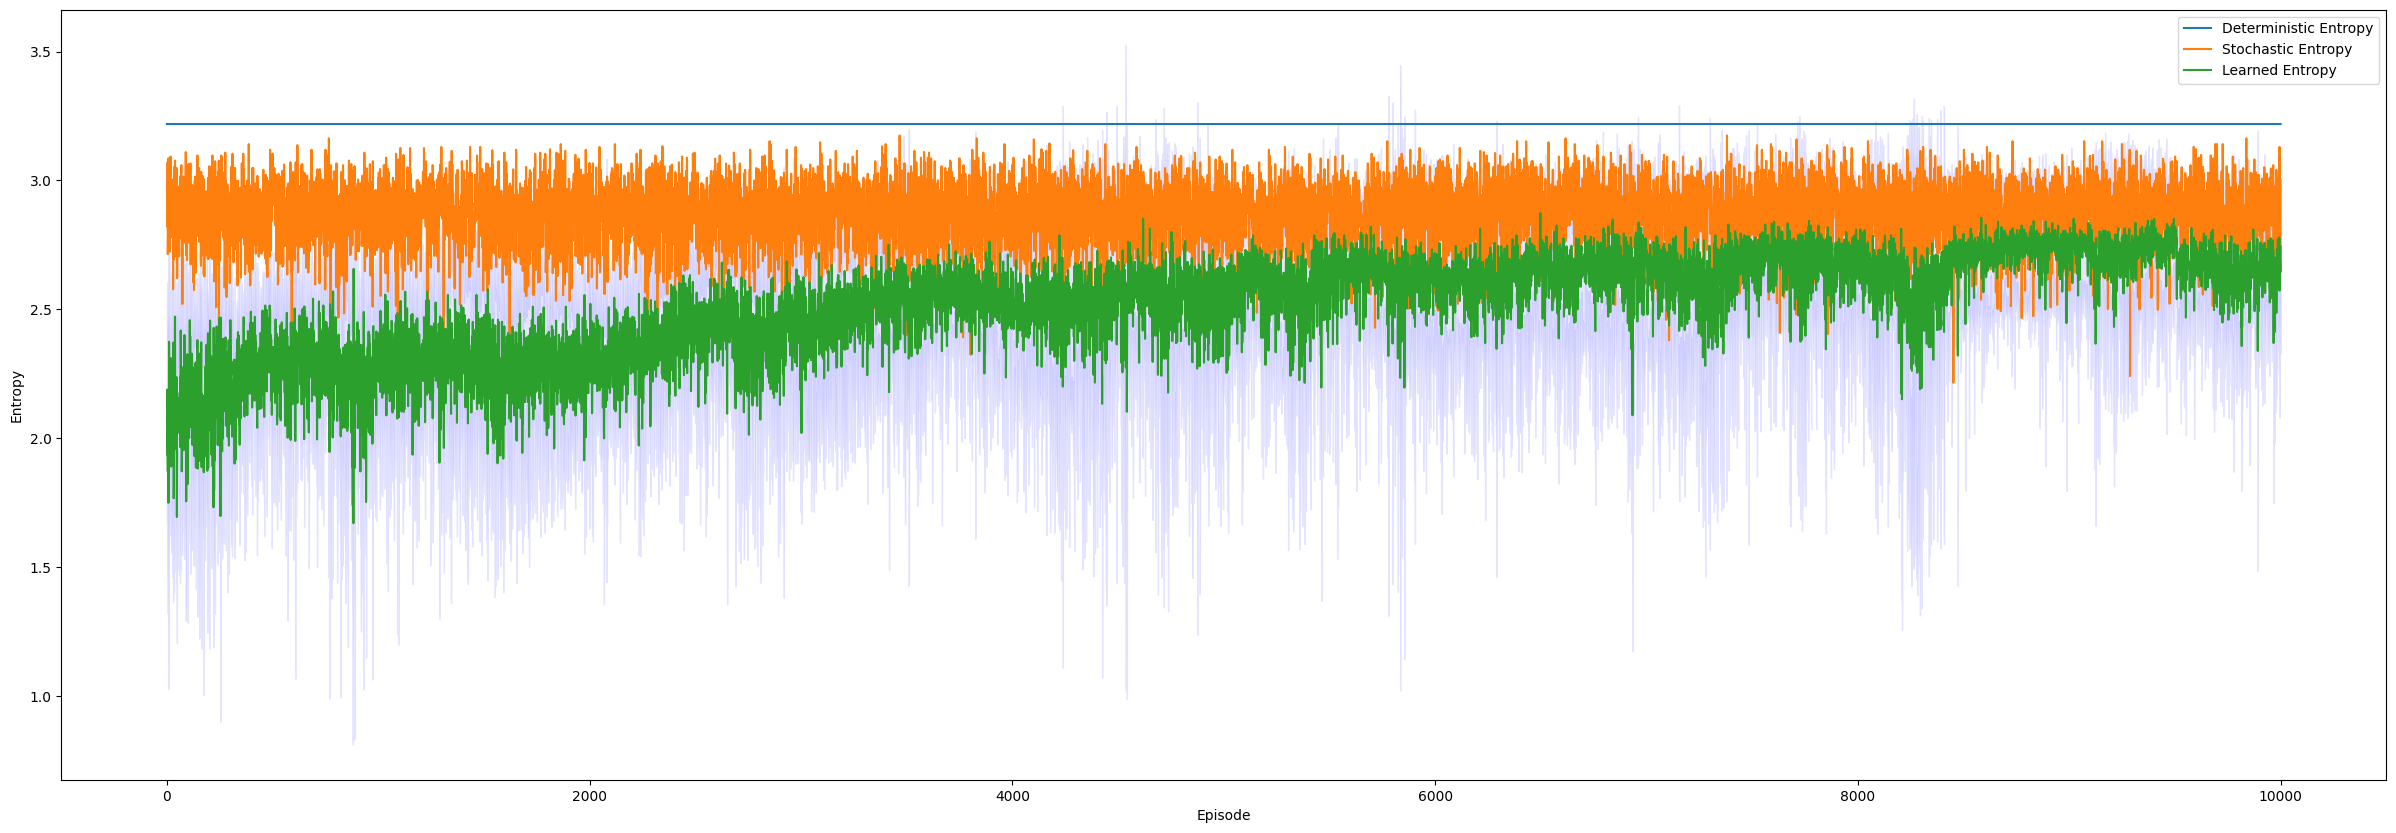

In [15]:
# Number of episodes for the training
n_episodes = 10000
# Initialize the environment
time_horizon = 25
env = environments.GridworldEnvGoalless(time_horizon = 25, prob=0)
# Number of runs per episode
n_run = 5
# Number of trajectories to print the visuals
n_traj = 50

# Train the agent and plot the rewards
list_true_entropies = []
with tqdm(total=n_run * n_episodes, ncols=80) as pbar:
    for r in range(n_run):
        # Initialize the agent
        agent = agents.REINFORCEAgentE(env, alpha=0.04)
        # Initialize the entropies array
        entropies = []
        # Training part
        for i in range(n_episodes):
            # Play the environment
            episode, d_t = agent.play(env)
            # Update the policy
            entropy = agent.update_single_sampling(episode, d_t)
            # Save the entropies
            entropies.append(entropy)
            pbar.update(1)
        # Print the policy and the expected state visitation
        agent.print_visuals(env, n_traj)
        # Save the entropies during the run
        list_true_entropies.append(entropies)
    # Adjust the representation of the entropies
    list_true_entropies = np.transpose(np.array(list_true_entropies), (1,0))

# Prepare values to print
plot_args = {}
plot_args.update(optimal_deterministic_result)
plot_args.update(optimal_stochastic_result)

true_entropies_means = np.mean(list_true_entropies, axis=1)
true_entropies_stds = np.std(list_true_entropies, axis=1)
plot_args['Learned Entropy'] = [true_entropies_means, true_entropies_stds]
plot_graph(n_run, n_episodes, plot_args, confidence, 'Entropy', 'Entropy Policy Deterministic/Stochastic')
print("Stochastic Optimal mean: " + str(np.mean(optimal_stochastic_result.get('Stochastic Entropy')[0])))
print("Stochastic Learned mean: " + str(np.mean(true_entropies_means[9000:])))

**Test Entropy MDP multiple sampling deterministic**

  0%|                                                 | 0/50000 [00:00<?, ?it/s]

 20%|███████▌                              | 9999/50000 [13:47<55:11, 12.08it/s]

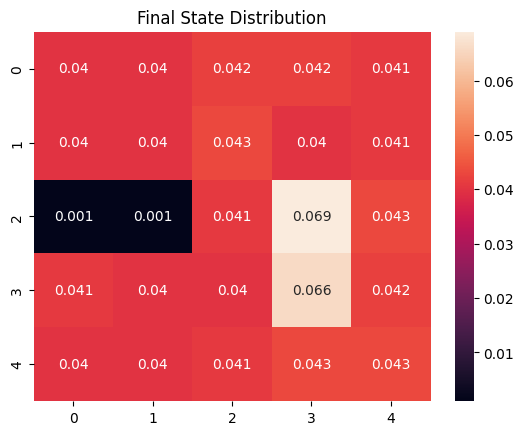

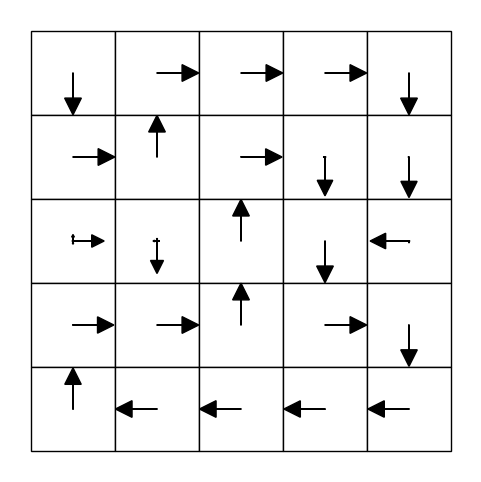

 40%|██████████████▊                      | 20000/50000 [27:39<41:17, 12.11it/s]

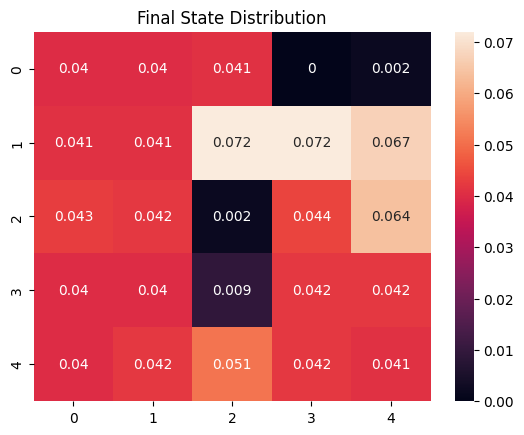

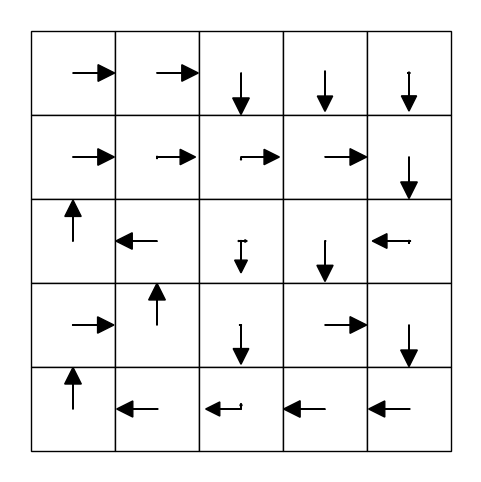

 60%|██████████████████████▏              | 30000/50000 [41:17<27:53, 11.95it/s]

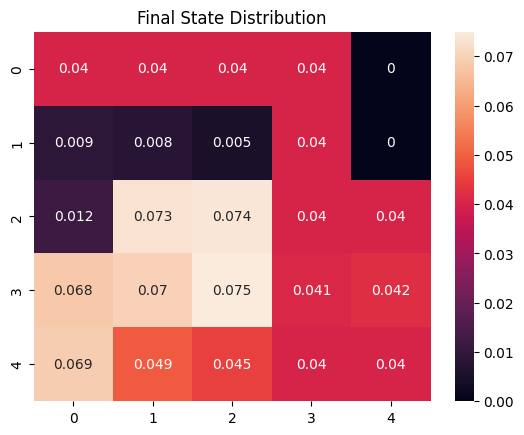

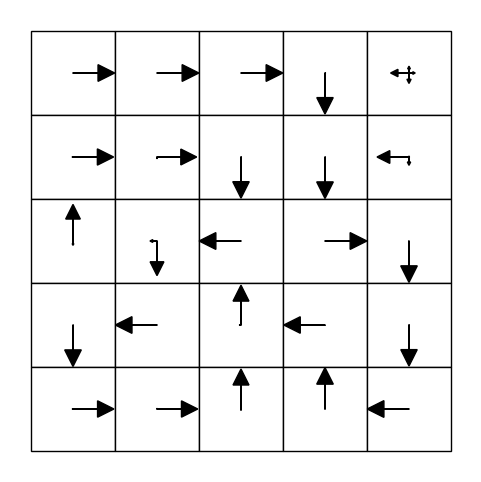

 80%|█████████████████████████████▌       | 40000/50000 [54:52<13:32, 12.31it/s]

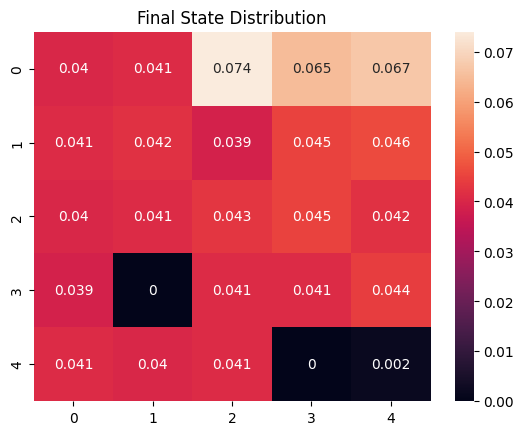

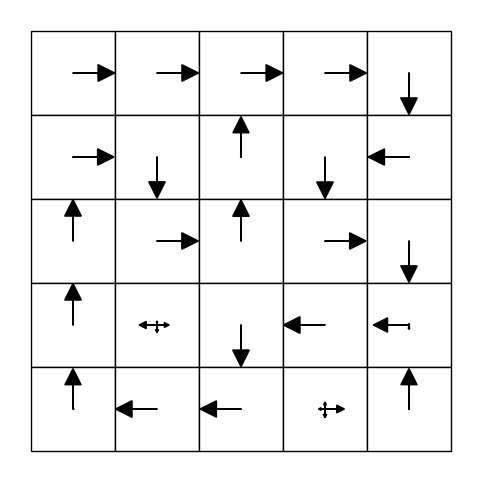

100%|███████████████████████████████████| 50000/50000 [1:08:28<00:00, 13.13it/s]

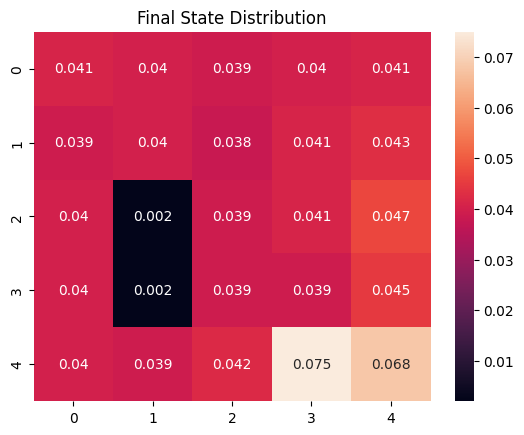

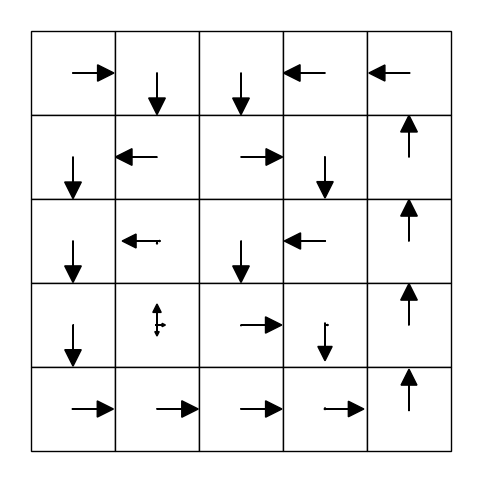

100%|███████████████████████████████████| 50000/50000 [1:08:28<00:00, 12.17it/s]


Stochastic Optimal mean: 2.870896222973462
Stochastic Learned mean: 3.0311712570506653


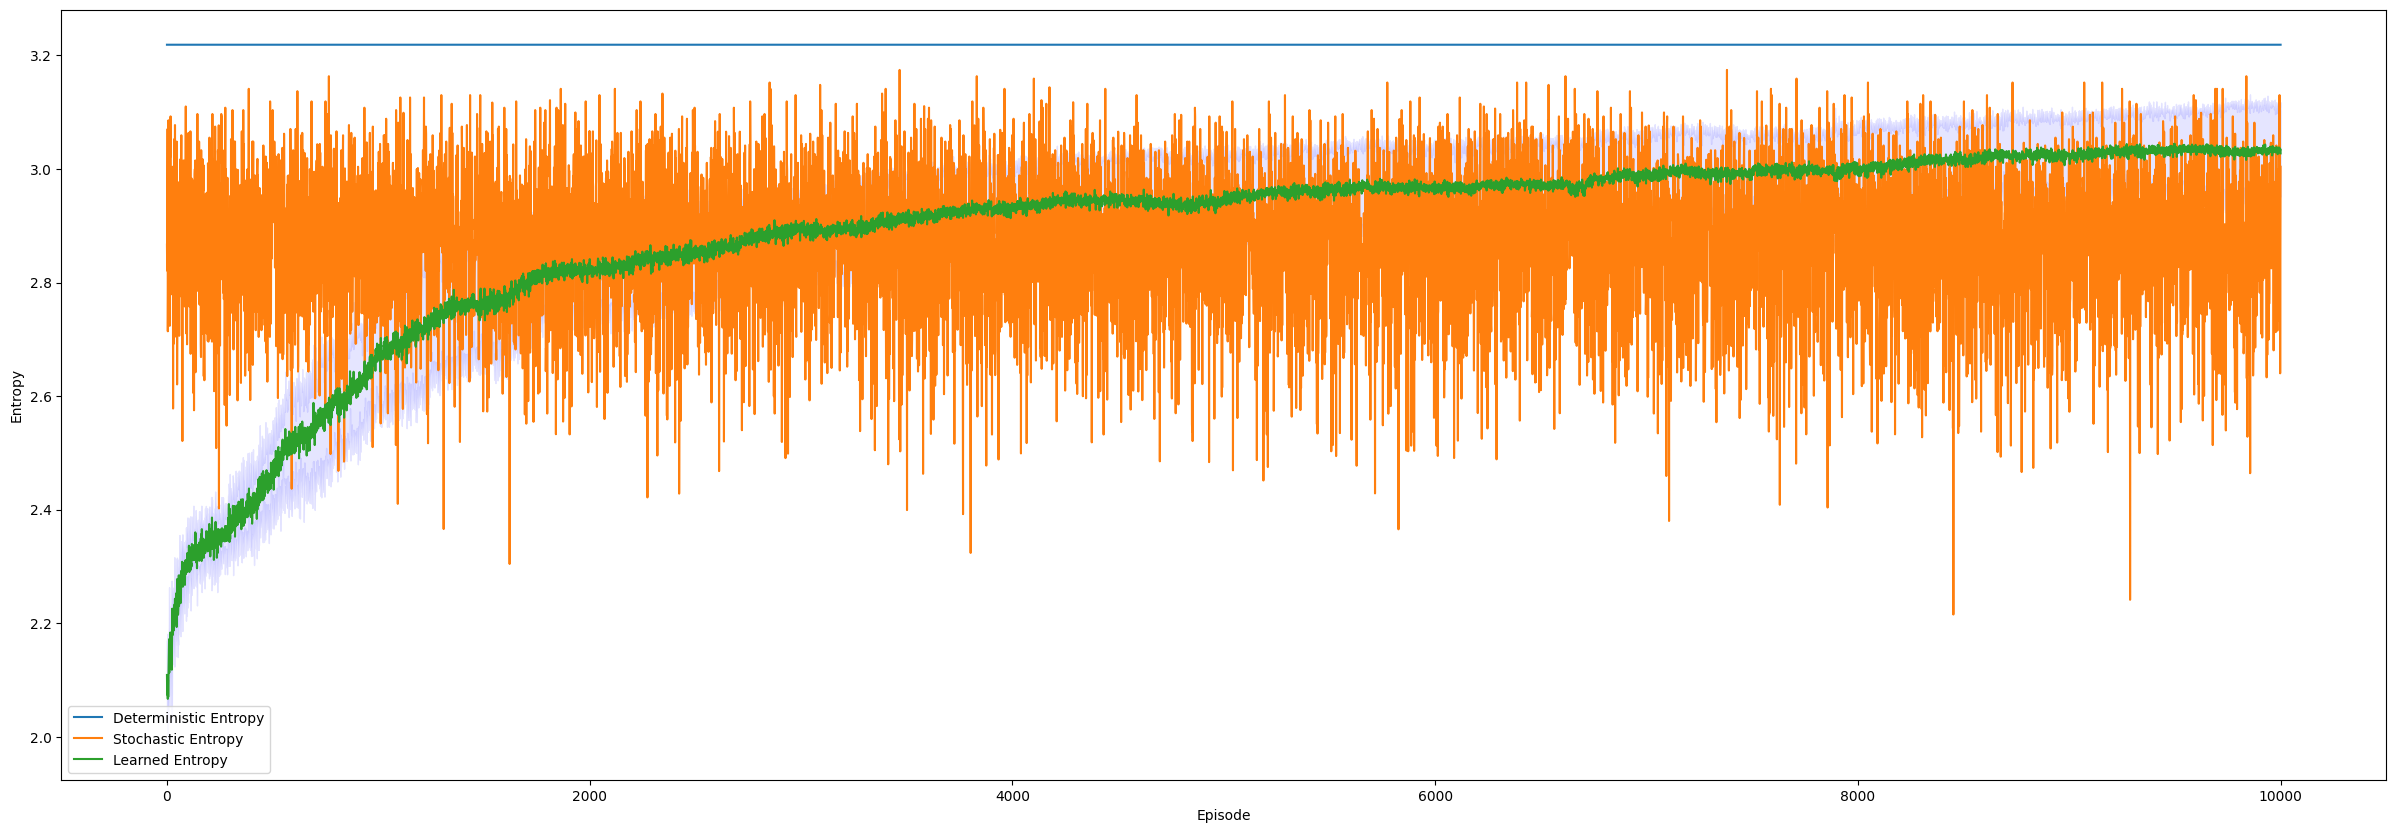

In [18]:
# Number of episodes for the training
n_episodes = 10000
# Initialize the environment
time_horizon = 25
env = environments.GridworldEnvGoalless(time_horizon = 25, prob=0)
# Number of runs per episode
n_run = 5
# Number of trajectories to print the visuals
n_traj = 40

with tqdm(total=n_run * n_episodes, ncols=80) as pbar:
    # Train the agent and plot the entropies
    list_true_entropies = []
    for r in range(n_run):
        # Initialize the agent
        agent = agents.REINFORCEAgentE(env, alpha=0.15)
        # Initialize the average entropies array
        avg_entropies = []
        for i in range(n_episodes):
            # Play the environment
            episodes = agent.play(env, n_traj=n_traj)
            # Update the policy
            entropies = agent.update_multiple_sampling(episodes)
            # Save the average entropies over the episode
            avg_entropies.append(np.mean(entropies))
            pbar.update(1)
        # Print the policy and the expected state visitation
        agent.print_visuals(env, n_traj)
        # Save the entropies during the run
        list_true_entropies.append(avg_entropies)
    # Adjust the representation of the entropies
    list_true_entropies = np.transpose(np.array(list_true_entropies), (1,0))

# Prepare values to print
plot_args = {}
plot_args.update(optimal_deterministic_result)
plot_args.update(optimal_stochastic_result)

true_entropies_means = np.mean(list_true_entropies, axis=1)
true_entropies_stds = np.std(list_true_entropies, axis=1)
plot_args['Learned Entropy'] = [true_entropies_means, true_entropies_stds]
plot_graph(n_run, n_episodes, plot_args, confidence, 'Entropy', 'Entropy Policy Deterministic/Stochastic Multiple Sampling')
print("Stochastic Optimal mean: " + str(np.mean(optimal_stochastic_result.get('Stochastic Entropy')[0])))
print("Stochastic Learned mean: " + str(np.mean(true_entropies_means[9000:])))

In [19]:
plot_args = {}
plot_args['Learned Entropy'] = [true_entropies_means, true_entropies_stds]
deterministic_multiple_sampling_result = plot_args

**Test Entropy MDP multiple sampling stochastic**

 20%|███████                            | 10000/50000 [16:58<1:08:33,  9.73it/s]

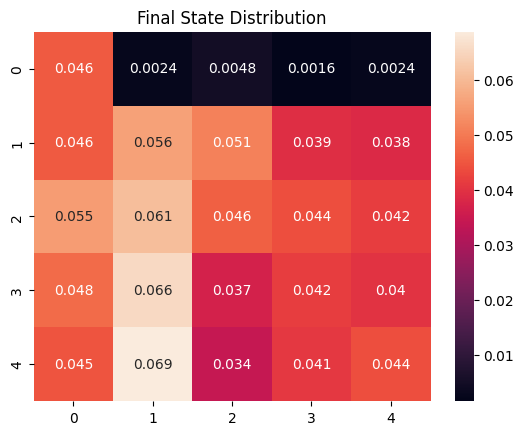

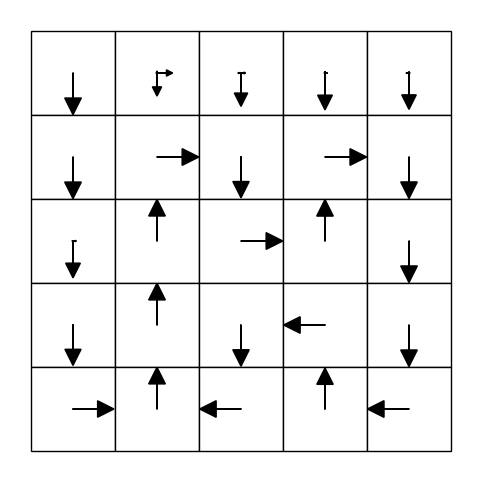

 40%|██████████████▊                      | 20000/50000 [34:09<47:22, 10.55it/s]

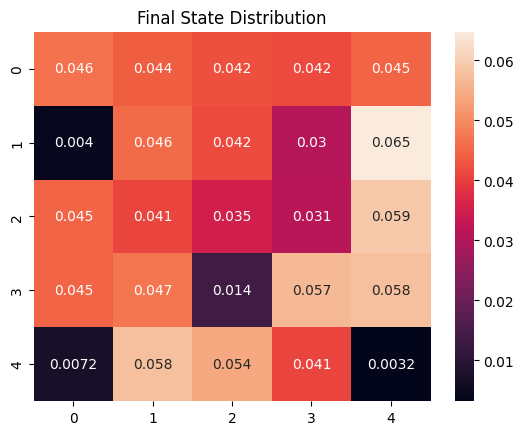

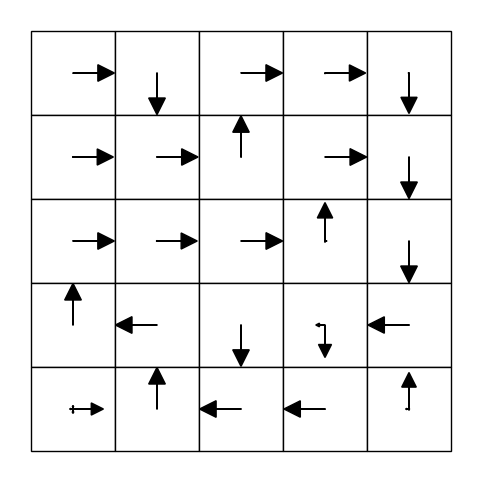

 60%|██████████████████████▏              | 30000/50000 [51:19<33:40,  9.90it/s]

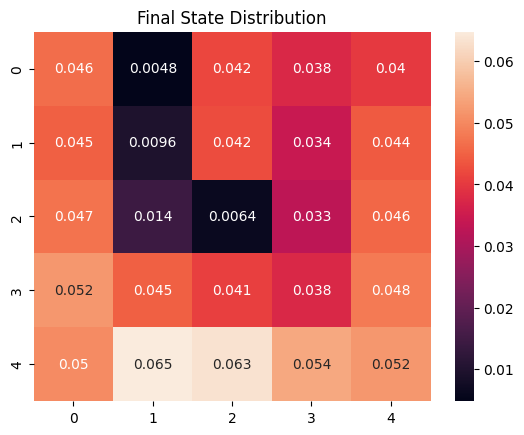

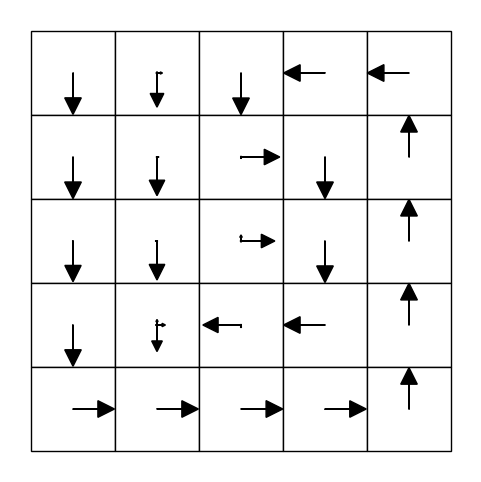

 80%|████████████████████████████       | 40000/50000 [1:08:22<17:26,  9.56it/s]

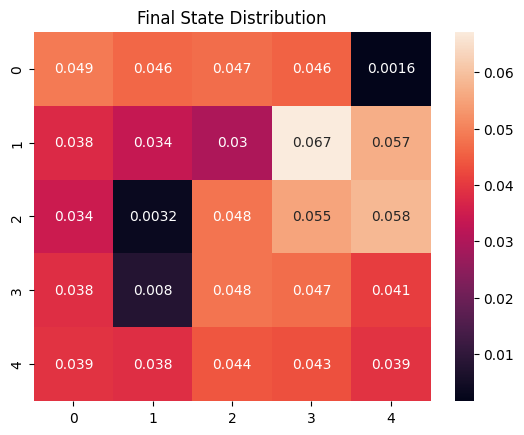

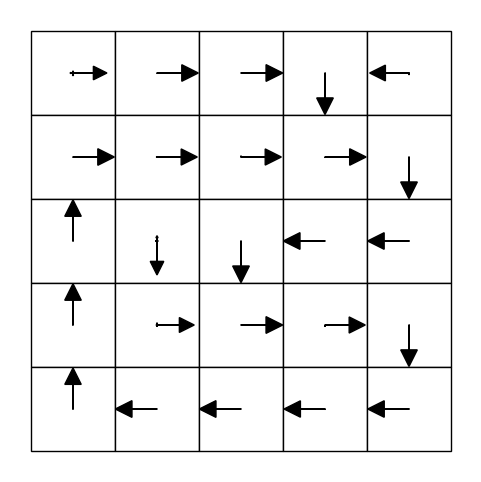

100%|██████████████████████████████████▉| 49999/50000 [1:25:18<00:00,  9.86it/s]

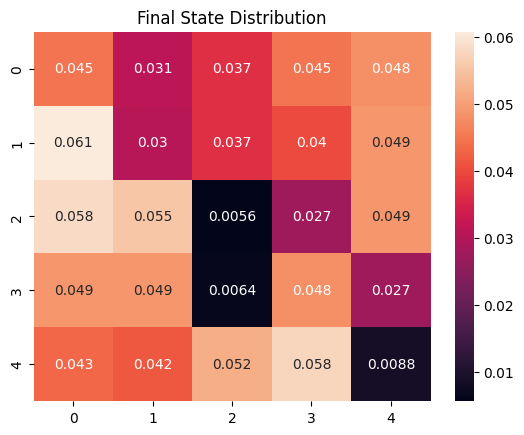

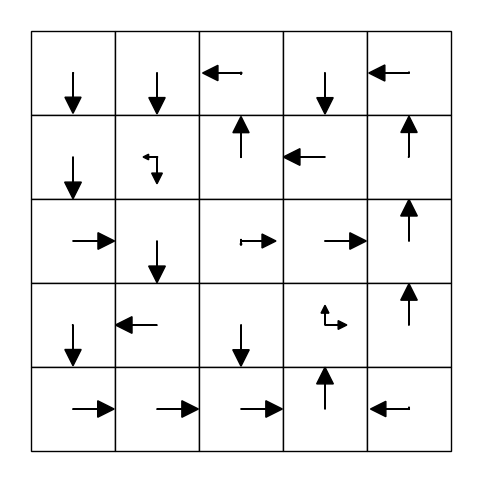

100%|███████████████████████████████████| 50000/50000 [1:25:19<00:00,  9.77it/s]


Stochastic Optimal mean: 2.870896222973462
Stochastic Learned mean: 2.899724378483428


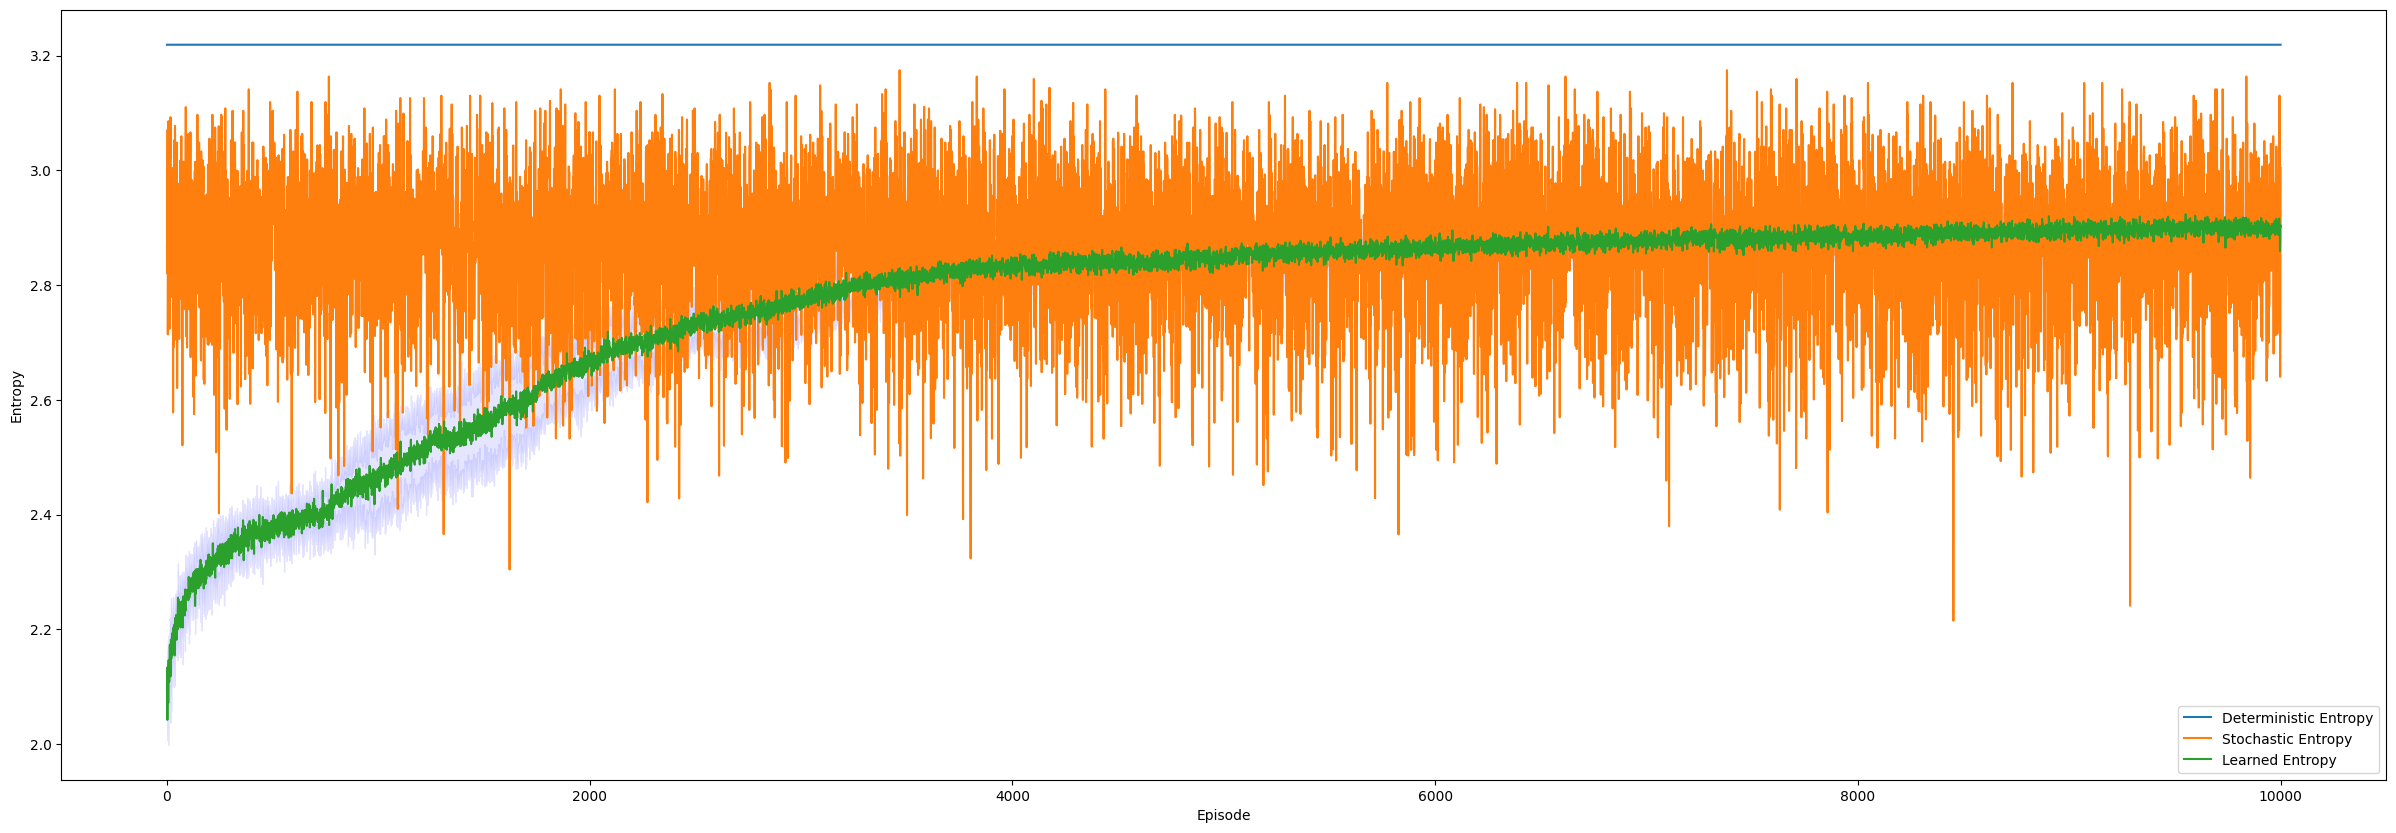

In [20]:
# Number of episodes for the training
n_episodes = 10000
# Initialize the environment
time_horizon = 25
env = environments.GridworldEnvGoalless(time_horizon = 25, prob=0.1)
# Number of runs per episode
n_run = 5
# Number of trajectories to print the visuals
n_traj = 50

with tqdm(total=n_run * n_episodes, ncols=80) as pbar:
    # Train the agent and plot the entropies
    list_true_entropies = []
    for r in range(n_run):
        # Initialize the agent
        agent = agents.REINFORCEAgentE(env, alpha=0.15)
        # Initialize the average entropies array
        avg_entropies = []
        for i in range(n_episodes):
            # Play the environment
            episodes = agent.play(env, n_traj=n_traj)
            # Update the policy
            entropies = agent.update_multiple_sampling(episodes)
            # Save the average entropies over the episode
            avg_entropies.append(np.mean(entropies))
            pbar.update(1)
        # Print the policy and the expected state visitation
        agent.print_visuals(env, n_traj)
        # Save the entropies during the run
        list_true_entropies.append(avg_entropies)
    # Adjust the representation of the entropies
    list_true_entropies = np.transpose(np.array(list_true_entropies), (1,0))

# Prepare values to print
plot_args = {}
plot_args.update(optimal_deterministic_result)
plot_args.update(optimal_stochastic_result)

true_entropies_means = np.mean(list_true_entropies, axis=1)
true_entropies_stds = np.std(list_true_entropies, axis=1)
plot_args['Learned Entropy'] = [true_entropies_means, true_entropies_stds]
plot_graph(n_run, n_episodes, plot_args, confidence, 'Entropy', 'Entropy Policy Deterministic/Stochastic Multiple Sampling')
print("Stochastic Optimal mean: " + str(np.mean(optimal_stochastic_result.get('Stochastic Entropy')[0])))
print("Stochastic Learned mean: " + str(np.mean(true_entropies_means[9500:])))

In [21]:
plot_args = {}
plot_args['Learned Entropy'] = [true_entropies_means, true_entropies_stds]
stochastic_multiple_sampling_result = plot_args

**Test Entropy MDP Multiple Sampling bigger time horizon**

 20%|███████                            | 10000/50000 [18:22<1:13:22,  9.09it/s]

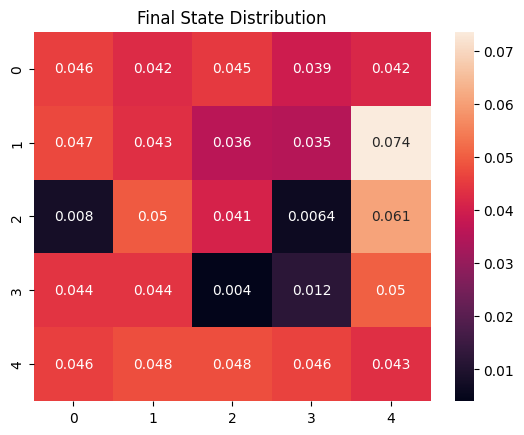

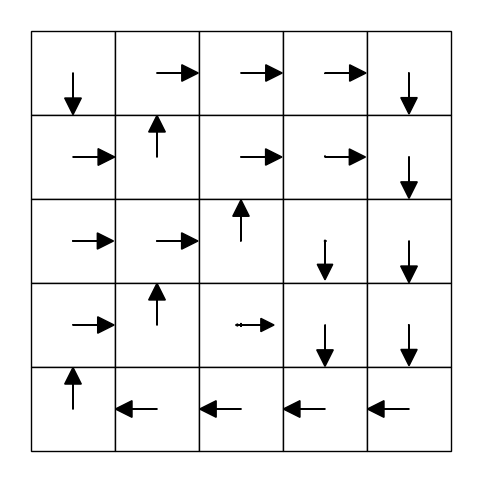

 40%|██████████████▊                      | 20000/50000 [36:44<54:21,  9.20it/s]

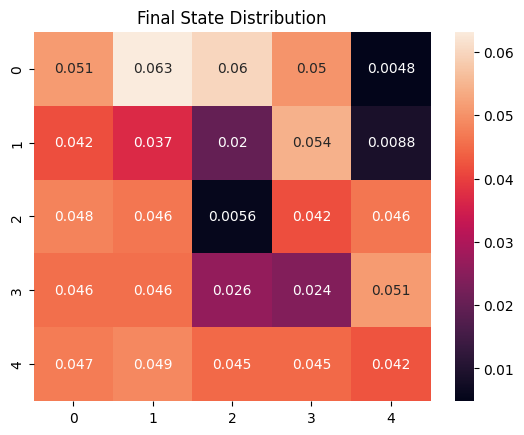

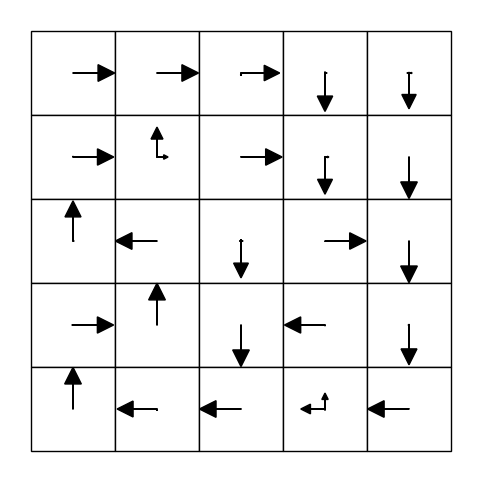

 60%|██████████████████████▏              | 30000/50000 [55:08<36:45,  9.07it/s]

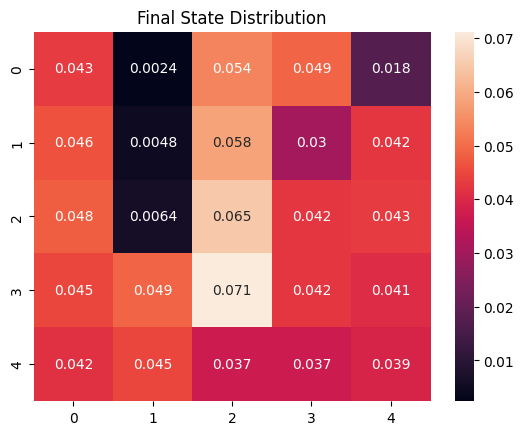

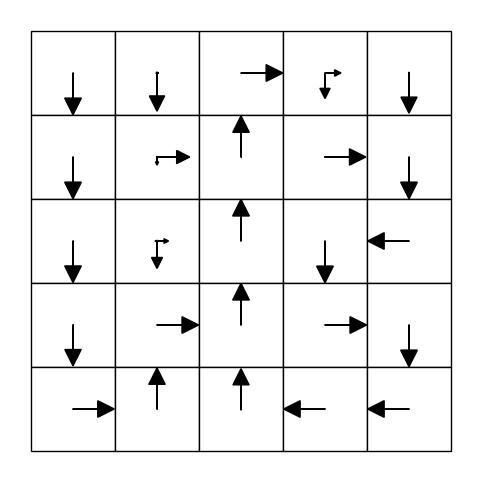

 80%|████████████████████████████       | 40000/50000 [1:13:33<18:38,  8.94it/s]

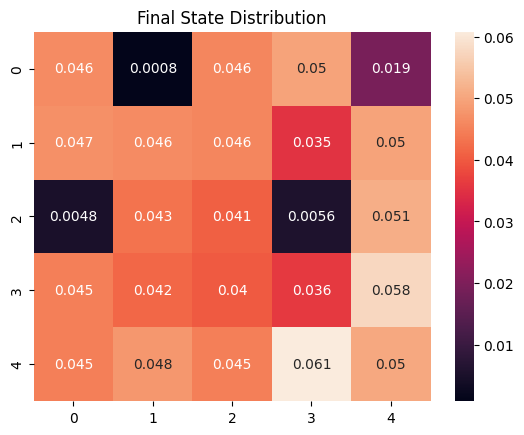

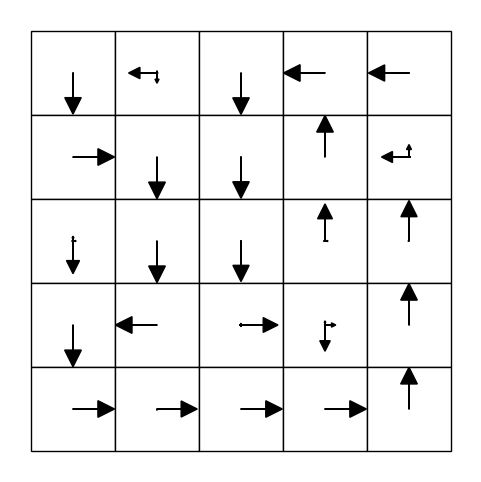

100%|███████████████████████████████████| 50000/50000 [1:31:56<00:00,  8.93it/s]

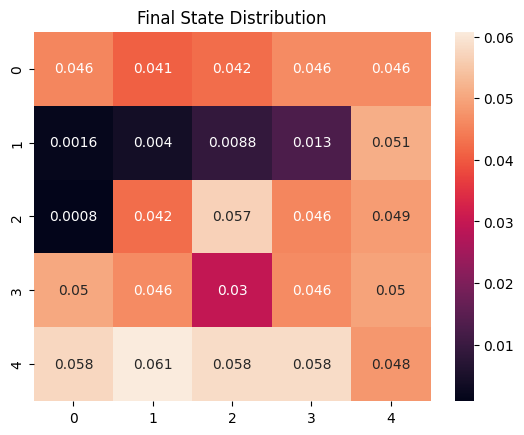

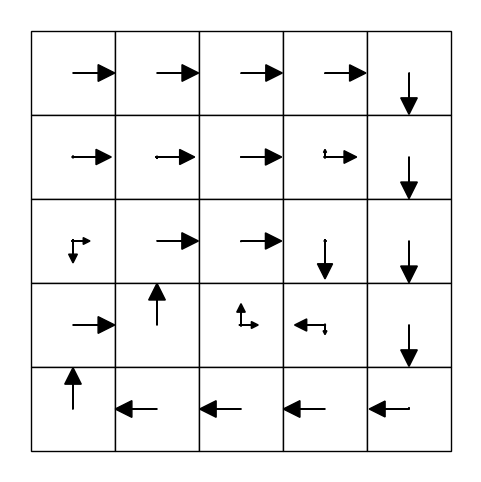

100%|███████████████████████████████████| 50000/50000 [1:31:57<00:00,  9.06it/s]


Stochastic Optimal mean: 2.869424510834507
Stochastic Learned mean: 2.8991541500719533


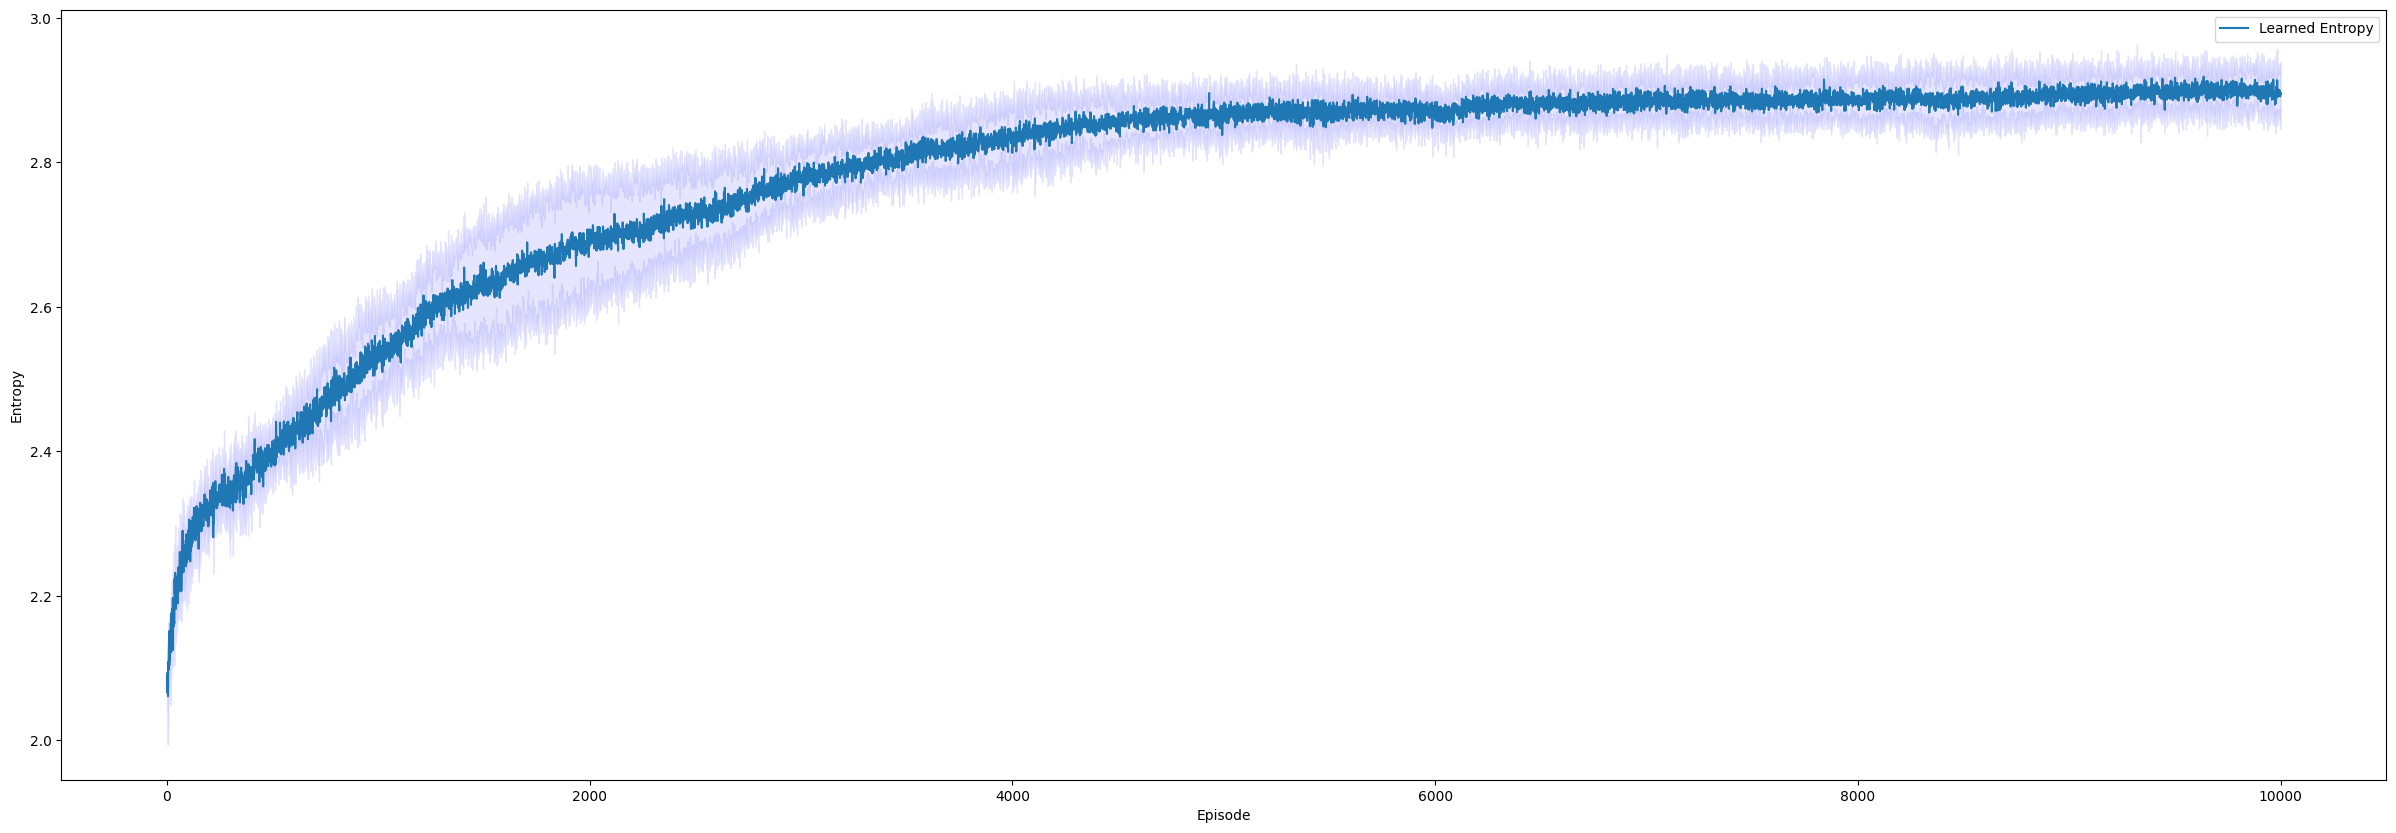

In [9]:
checkpoints = [0, 50, 250, 1000, 2000, 4000, 5000, 7500, 9000, 9999]
list_policies = []
# Number of episodes for the training
n_episodes = 10000
# Initialize the environment
time_horizon = 50
env = environments.GridworldEnvGoalless(time_horizon = 25, prob=0.1)
# Number of runs per episode
n_run = 5
# Number of trajectories to print the visuals
n_traj = 50

with tqdm(total=n_run * n_episodes, ncols=80) as pbar:
    # Train the agent and plot the entropies
    list_true_entropies = []
    for r in range(n_run):
        # Initialize the agent
        agent = agents.REINFORCEAgentE(env, alpha=0.15)
        # Initialize the average entropies array
        avg_entropies = []
        for i in range(n_episodes):
            if i in checkpoints:
                list_policies.append(np.copy(agent.policy_params))
            # Play the environment
            episodes = agent.play(env, n_traj=n_traj)
            # Update the policy
            entropies = agent.update_multiple_sampling(episodes)
            # Save the average entropies over the episode
            avg_entropies.append(np.mean(entropies))
            pbar.update(1)
        # Print the policy and the expected state visitation
        agent.print_visuals(env, n_traj)
        # Save the entropies during the run
        list_true_entropies.append(avg_entropies)
    # Adjust the representation of the entropies
    list_true_entropies = np.transpose(np.array(list_true_entropies), (1,0))

# Prepare values to print
plot_args = {}

true_entropies_means = np.mean(list_true_entropies, axis=1)
true_entropies_stds = np.std(list_true_entropies, axis=1)
plot_args['Learned Entropy'] = [true_entropies_means, true_entropies_stds]
plot_graph(n_run, n_episodes, plot_args, confidence, 'Entropy', 'Entropy Policy Deterministic/Stochastic Multiple Sampling')
print("Stochastic Optimal mean: " + str(np.mean(optimal_stochastic_result.get('Stochastic Entropy')[0])))
print("Stochastic Learned mean: " + str(np.mean(true_entropies_means[9500:])))

Checkpoint 0 policy:


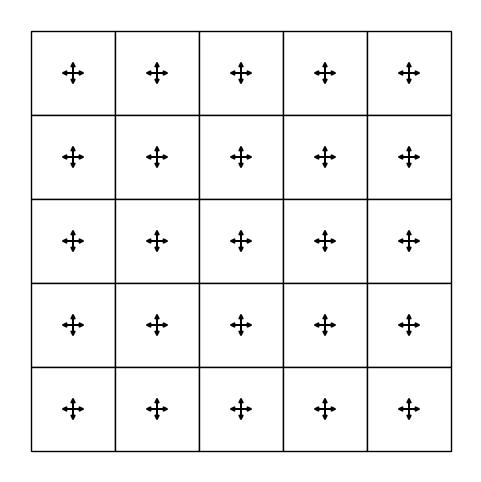

Checkpoint 50 policy:


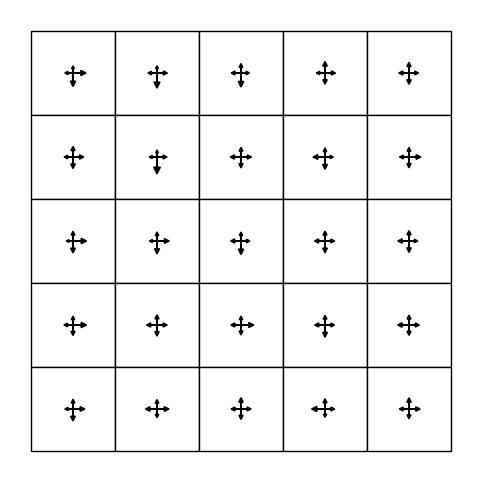

Checkpoint 250 policy:


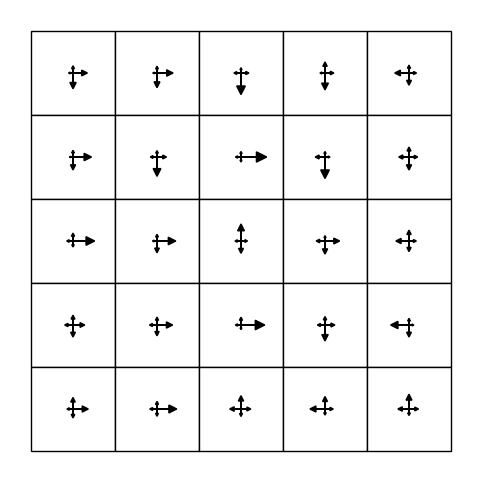

Checkpoint 1000 policy:


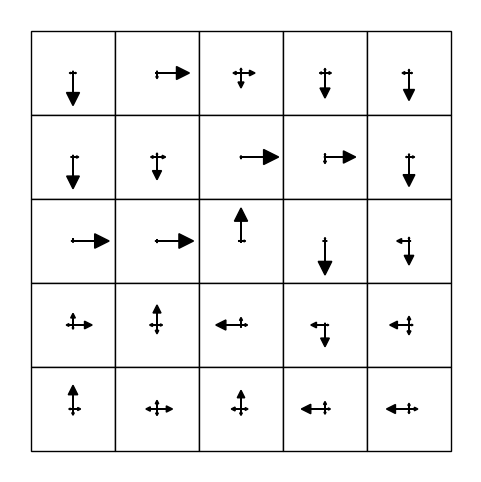

Checkpoint 2000 policy:


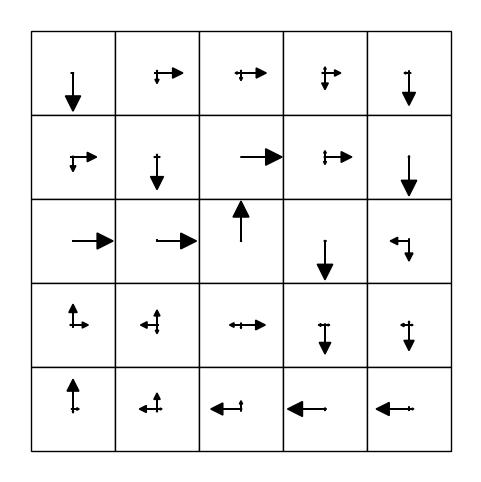

Checkpoint 4000 policy:


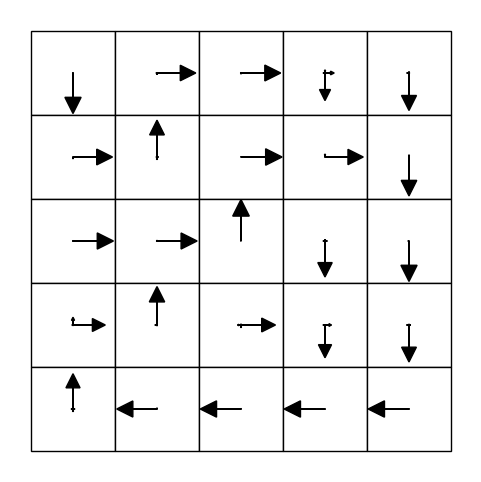

Checkpoint 5000 policy:


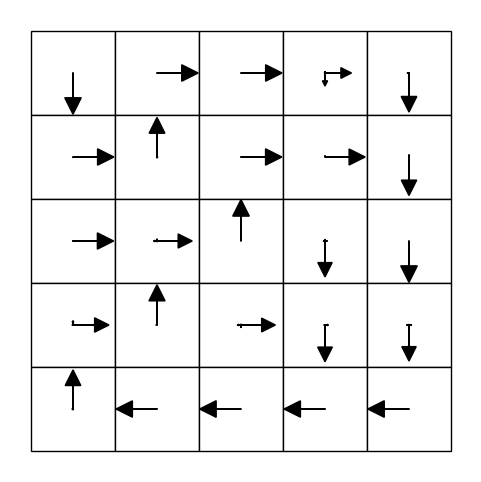

Checkpoint 7500 policy:


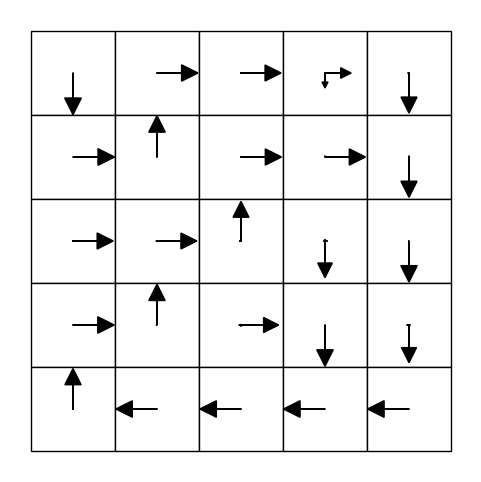

Checkpoint 9000 policy:


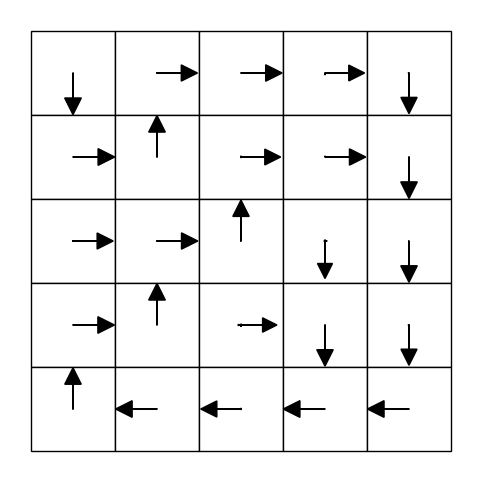

Checkpoint 9999 policy:


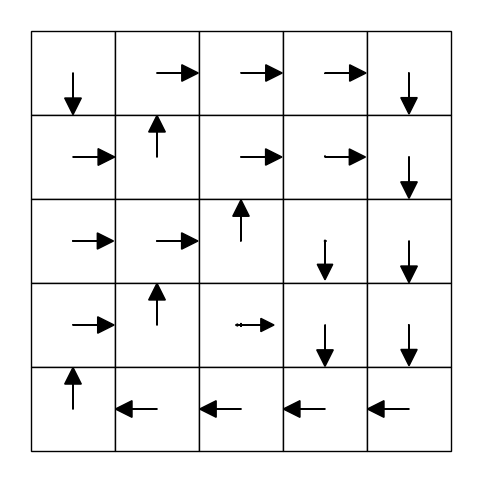

In [10]:
# Print the ending policy
for i in range(len(checkpoints)):
    print("Checkpoint %d policy:" %checkpoints[i])
    agent.policy_params = list_policies[i]
    print_gridworld_with_policy(agent, env)

# Gridworld POMDP

In [3]:
gym.envs.register(
    id='GridworldPOMDPEnv-v0',
    entry_point=environments.GridworldPOMDPEnv
)
env = gym.make('GridworldPOMDPEnv-v0', steepness=501)

## Test observation matrix


1.0
1.0


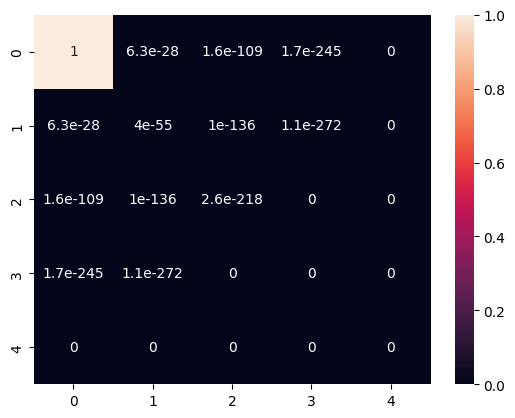

In [4]:
sns.heatmap(np.reshape(env.observation_matrix[0], (env.grid_size, env.grid_size)), annot=True)
print(np.sum(env.observation_matrix[0]))
print(np.sum(env.observation_matrix[0][0]))

## Reward Reinforce POMDP

**Test Reward POMDP sampled state**

  0%|                                                   | 0/500 [00:00<?, ?it/s]

/home/duilio999/.pyenv/versions/3.10.12/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/home/duilio999/.pyenv/versions/3.10.12/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:187: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  logger.warn(
/home/duilio999/.pyenv/versions/3.10.12/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
 20%|████████▏                                | 100/500 [00:09<00:32, 12.49it/s]

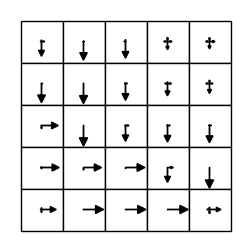

 40%|████████████████▎                        | 199/500 [00:19<00:23, 12.78it/s]

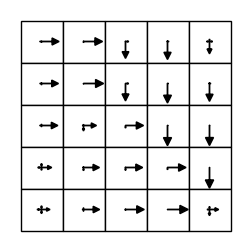

 60%|████████████████████████▌                | 300/500 [00:29<00:14, 13.59it/s]

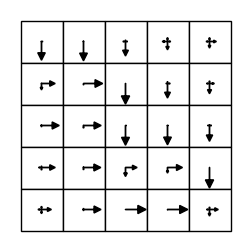

 80%|████████████████████████████████▊        | 400/500 [00:39<00:07, 12.59it/s]

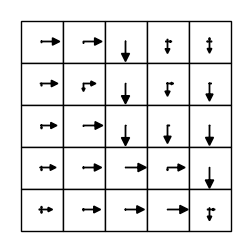

100%|████████████████████████████████████████▉| 499/500 [00:49<00:00, 12.35it/s]

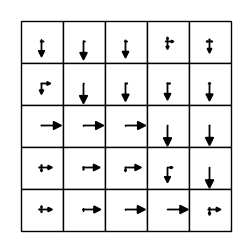

100%|█████████████████████████████████████████| 500/500 [00:49<00:00, 10.02it/s]


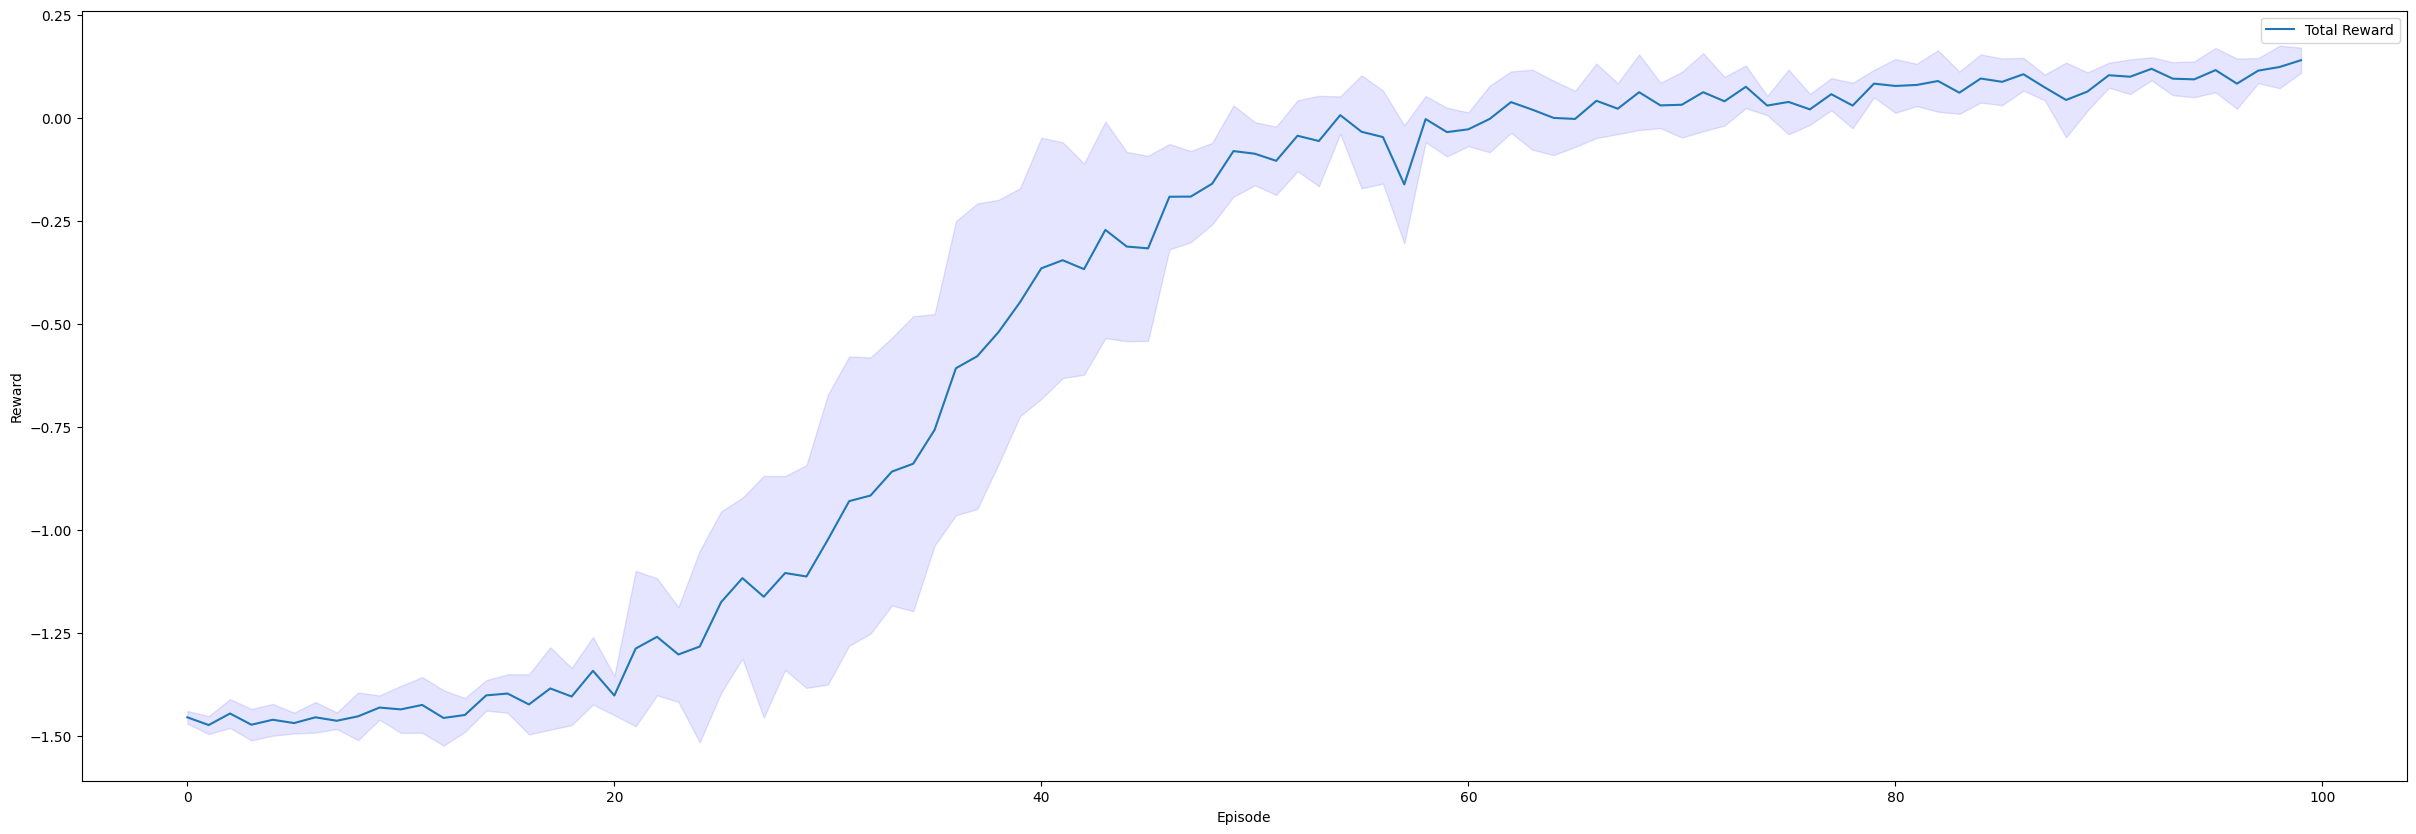

In [5]:
# Create the Gridworld environment and the REINFORCE agent
n_episodes = 100
# Number of sampled trajectories per episode
n_traj = 50
# Number of runs of training
n_run = 5
# Initialize environment
env = gym.make('GridworldPOMDPEnv-v0', time_horizon=15)

# Train the agent and plot the rewards
list_total_rewards = []
with tqdm(total=n_run * n_episodes, ncols=80) as pbar:
    for r in range(n_run):
        #print("Run %d" %r)
        agent = agents.REINFORCEAgentPOMDP(env, alpha=3)
        total_avg_rewards = []
        for i in range(n_episodes):
            episodes, total_rewards = agent.play(env, n_traj)
            agent.update_multiple_sampling(episodes)
            total_avg_rewards.append(np.mean(total_rewards))
            pbar.update(1)
        # Print final policy
        print_gridworld_with_policy(agent, env, (3,3), "Final Policy run #" + str(r))
        list_total_rewards.append(total_avg_rewards)
list_total_rewards = np.transpose(np.array(list_total_rewards), (1,0))

# Prepare values to print
plot_args = {}

total_rewards_means = np.mean(list_total_rewards, axis=1)
total_rewards_stds = np.std(list_total_rewards, axis=1)
plot_args["Total Reward"] = [total_rewards_means, total_rewards_stds]
plot_graph(n_run, n_episodes, plot_args, confidence, 'Reward', 'Reward POMDP')

In [6]:
reward_sampled_version = total_rewards_means
agent_sampled_version = agent

**Test Reward POMDP belief state**

In [ ]:
# Create the Gridworld environment and the REINFORCE agent
n_episodes = 100
# Number of sampled trajectories per episode
n_traj = 50
#number of run per episode
n_run = 5

# Train the agent and plot the rewards
list_total_rewards = []
with tqdm(total=n_run * n_episodes, ncols=80) as pbar:
    for r in range(n_run):
        #print("Run %d" %r)
        agent = agents.REINFORCEAgentPOMDP(env, alpha=3)
        total_avg_rewards = []
        for i in range(n_episodes):
            episodes = []
            total_rewards = []
            for k in range(n_traj):
                episode = []
                agent.belief_state = env.reset()
                done = False
                total_reward = 0
                while not done:
                    # Sample the action from the state
                    action, probs = agent.get_action(agent.belief_state)
                    # Compute the step
                    next_obs, reward, done, true_state = env.step(action)
                    # Save step in the episode
                    episode.append((agent.belief_state, action, probs, reward, true_state))
                    # Update belief
                    agent.belief_update(action, next_obs)
                    total_reward += reward
                episodes.append(episode)
                total_rewards.append(total_reward)
            agent.update_multiple_sampling(episodes)
            total_avg_rewards.append(np.mean(total_rewards))
            pbar.update(1)
        list_total_rewards.append(total_avg_rewards)
list_total_rewards = np.transpose(np.array(list_total_rewards), (1,0))

# Print the ending policy
print("Ending Policy:")
print_gridworld_with_policy(agent, env)

# Initialize the plotting vectors
fig, ax = plt.subplots(figsize=(40, 10))
total_rewards_means = []
under_line = []
over_line = []
for i in range(n_episodes):
    total_rewards_mean = np.mean(list_total_rewards[i])
    total_rewards_std = np.std(list_total_rewards[i])
    freedom_deg = n_run - 1
    t_crit = np.abs(t.ppf((1 - confidence) / 2, freedom_deg))
    total_rewards_means.append(total_rewards_mean)
    under_line.append(total_rewards_mean - total_rewards_std * t_crit / np.sqrt(n_run))
    over_line.append(total_rewards_mean + total_rewards_std * t_crit / np.sqrt(n_run))
ax.clear()
ax.plot(total_rewards_means, label='Total Reward')
ax.fill_between(np.arange(n_episodes), under_line, over_line, color='b', alpha=0.1)
ax.set_xlabel('Episode')
ax.set_ylabel('Reward')
ax.legend()
fig.canvas.draw()

In [ ]:
reward_belief_version = total_rewards_means
agent_belief_version = agent

**Comparison between the two**

In [ ]:
# Print the ending policy
print("Ending Policy Sampled Version:")
print_gridworld_with_policy(agent_sampled_version, env)
# Print the ending policy
print("Ending Policy Belief Version:")
print_gridworld_with_policy(agent_belief_version, env)
# Initialize the plotting vectors
fig, ax = plt.subplots(figsize=(40, 10))
ax.clear()
ax.plot(reward_sampled_version[:3000], label='Total Reward Sampled Version')
ax.plot(reward_belief_version, label='Total Reward Belief Version')
ax.set_xlabel('Episode')
ax.set_ylabel('Reward')
ax.legend()
fig.canvas.draw()

**Random Initialization**

In [ ]:
# Create the Gridworld environment and the REINFORCE agent
n_episodes = 100
# Number of sampled trajectories per episode
n_traj = 50
#number of run per episode
n_run = 5
confidence = 0.95

env = GridworldPOMDPEnv(time_horizon=15, randomize=1)

# Train the agent and plot the rewards
list_total_rewards = []
with tqdm(total=n_run * n_episodes, ncols=80) as pbar:
    for r in range(n_run):
        #print("Run %d" %r)
        agent = REINFORCEAgentPOMDP(env, alpha=3)
        total_avg_rewards = []
        for i in range(n_episodes):
            episodes = []
            total_rewards = []
            for k in range(n_traj):
                episode = []
                agent.belief_state = env.reset()
                done = False
                total_reward = 0
                while not done:
                    # Sample state
                    sampled_state = agent.get_state(1)
                    # Get the index of the state
                    state_index = agent.env.state_to_index(sampled_state)
                    # Get the one hot encoding
                    ohe_state = agent.ohe_states[state_index, :]
                    # Sample the action from the state
                    action, probs = agent.get_action(ohe_state)
                    # Compute the step
                    next_obs, reward, done, true_state = env.step(action)
                    # Save step in the episode
                    episode.append((ohe_state, action, probs, reward, true_state))
                    # Update belief
                    agent.belief_update(action, next_obs)
                    total_reward += reward
                episodes.append(episode)
                total_rewards.append(total_reward)
            agent.update_multiple_sampling(episodes)
            total_avg_rewards.append(np.mean(total_rewards))
            pbar.update(1)
        list_total_rewards.append(total_avg_rewards)
list_total_rewards = np.transpose(np.array(list_total_rewards), (1,0))

# Print the ending policy
print("Ending Policy:")
print_gridworld_with_policy(agent, env)

# Initialize the plotting vectors
fig, ax = plt.subplots(figsize=(40, 10))
total_rewards_means = []
under_line = []
over_line = []
for i in range(n_episodes):
    total_rewards_mean = np.mean(list_total_rewards[i])
    total_rewards_std = np.std(list_total_rewards[i])
    freedom_deg = n_run - 1
    t_crit = np.abs(t.ppf((1 - confidence) / 2, freedom_deg))
    total_rewards_means.append(total_rewards_mean)
    under_line.append(total_rewards_mean - total_rewards_std * t_crit / np.sqrt(n_run))
    over_line.append(total_rewards_mean + total_rewards_std * t_crit / np.sqrt(n_run))
ax.clear()
ax.plot(total_rewards_means, label='Total Reward')
ax.fill_between(np.arange(n_episodes), under_line, over_line, color='b', alpha=0.1)
ax.set_xlabel('Episode')
ax.set_ylabel('Reward')
ax.legend()
fig.canvas.draw()

In [ ]:
reward_sampled_version = total_rewards_means
agent_sampled_version = agent

In [ ]:
# Create the Gridworld environment and the REINFORCE agent
n_episodes = 100
# Number of sampled trajectories per episode
n_traj = 50
#number of run per episode
n_run = 5
confidence = 0.95

env = GridworldPOMDPEnv(time_horizon=15, randomize=1)

# Train the agent and plot the rewards
list_total_rewards = []
with tqdm(total=n_run * n_episodes, ncols=80) as pbar:
    for r in range(n_run):
        #print("Run %d" %r)
        agent = REINFORCEAgentPOMDP(env, alpha=3)
        total_avg_rewards = []
        for i in range(n_episodes):
            episodes = []
            total_rewards = []
            for k in range(n_traj):
                episode = []
                agent.belief_state = env.reset()
                done = False
                total_reward = 0
                while not done:
                    # Sample the action from the state
                    action, probs = agent.get_action(agent.belief_state)
                    # Compute the step
                    next_obs, reward, done, true_state = env.step(action)
                    # Save step in the episode
                    episode.append((agent.belief_state, action, probs, reward, true_state))
                    # Update belief
                    agent.belief_update(action, next_obs)
                    total_reward += reward
                episodes.append(episode)
                total_rewards.append(total_reward)
            agent.update_multiple_sampling(episodes)
            total_avg_rewards.append(np.mean(total_rewards))
            pbar.update(1)
        list_total_rewards.append(total_avg_rewards)
list_total_rewards = np.transpose(np.array(list_total_rewards), (1, 0))

# Print the ending policy
print("Ending Policy:")
print_gridworld_with_policy(agent, env)

# Initialize the plotting vectors
fig, ax = plt.subplots(figsize=(40, 10))
total_rewards_means = []
under_line = []
over_line = []
for i in range(n_episodes):
    total_rewards_mean = np.mean(list_total_rewards[i])
    total_rewards_std = np.std(list_total_rewards[i])
    freedom_deg = n_run - 1
    t_crit = np.abs(t.ppf((1 - confidence) / 2, freedom_deg))
    total_rewards_means.append(total_rewards_mean)
    under_line.append(total_rewards_mean - total_rewards_std * t_crit / np.sqrt(n_run))
    over_line.append(total_rewards_mean + total_rewards_std * t_crit / np.sqrt(n_run))
ax.clear()
ax.plot(total_rewards_means, label='Total Reward')
ax.fill_between(np.arange(n_episodes), under_line, over_line, color='b', alpha=0.1)
ax.set_xlabel('Episode')
ax.set_ylabel('Reward')
ax.legend()
fig.canvas.draw()

In [ ]:
reward_belief_version = total_rewards_means
agent_belief_version = agent

**Comparison between the two**

In [ ]:
# Print the ending policy
print("Ending Policy Sampled Version:")
print_gridworld_with_policy(agent_sampled_version, env)
# Print the ending policy
print("Ending Policy Belief Version:")
print_gridworld_with_policy(agent_belief_version, env)
# Initialize the plotting vectors
fig, ax = plt.subplots(figsize=(40, 10))
ax.clear()
ax.plot(reward_sampled_version[:3000], label='Total Reward Sampled Version')
ax.plot(reward_belief_version, label='Total Reward Belief Version')
ax.set_xlabel('Episode')
ax.set_ylabel('Reward')
ax.legend()
fig.canvas.draw()

    # Entropy Reinforce POMDP

In [ ]:
class REINFORCEAgentEPOMDP(REINFORCEAgentE):
    '''
    This calls implements the Reinforce Agent for the POMDP defined above.
    It is implemented as the extension of the former MDP agent but adds the belief state and what is concerned by it.
    '''
    def __init__(self, env, alpha=0.1, gamma=0.9):
        super().__init__(env=env, alpha=alpha, gamma=gamma)
        self.belief_state = np.ones(env.grid_size ** 2) / (env.grid_size * env.grid_size)
        self.n_expected_value = 30

    def belief_update(self, action, observation):
        '''
        This method updates the belief of the agent in a Bayesian way.
        '''
        # Get the index of the observed state
        obs_state_index = self.env.state_to_index(observation)

        # Get the observation probabilities for all states
        obs_probabilities = self.env.observation_matrix[:, obs_state_index]

        # Calculate the numerator: Obs(o|s) * sum_s' (P(s|s',a) * belief_state[s'])
        numerator = obs_probabilities * np.sum(self.env.transition_matrix[:, :, action] * self.belief_state, axis=1)

        # Calculate the denominator: sum_s' (Obs(o|s') * sum_s'' (P(s'|s'',a) * belief_state[s'']))
        denominator = np.sum(obs_probabilities * np.sum(self.env.transition_matrix[:, :, action] * self.belief_state, axis=1))

        # Update the belief state
        self.belief_state = numerator / denominator

    def get_state(self, belief, behaviour):
        '''
        This method is used to sample or compute the expected state given the current belief.
        Args:
         - behaviour: if 0 it returns the state from a single sampling.
                 if 1 it returns the state from multiple samplings.
                 No other values allowed.
        '''
        if behaviour != 0 and behaviour != 1:
            raise Exception("You have to pass me 0 or 1, read :/")

        if behaviour == 0:
            state = np.random.choice(belief.size, p=belief)
            state = env.index_to_state(state)
            return state

        if behaviour == 1:
            states = np.random.choice(belief.size, self.n_expected_value, p=belief)
            state = mode(states).mode[0]
            state = env.index_to_state(state)
            return state

    def play(self, env, n_traj):
        episodes = []
        true_entropies = []
        for k in range(n_traj):
            episode = []
            d_t = np.zeros((env.grid_size, env.grid_size))
            true_d_t = np.zeros((env.grid_size, env.grid_size))
            self.belief_state = env.reset()
            done = False
            while not done:
                # Sample action and get probabilities from the belief
                action, probs = self.get_action(self.belief_state)
                # Sample state
                sampled_state = self.get_state(self.belief_state, 1)
                # Take a step of the environment
                next_obs, reward, done, true_state = env.step(action)
                # Update state visitation
                d_t[sampled_state[0]][sampled_state[1]] += 1
                # Update state visitation
                true_d_t[true_state[0]][true_state[1]] += 1
                episode.append((self.belief_state, action, probs, reward, true_state))
                self.belief_update(action, next_obs)
            # Compute true entropy of the trajectory
            true_d_t /= len(episode)
            true_entropies.append(agent.compute_entropy(true_d_t))
            d_t /= len(episode)
            episodes.append((episode, d_t))
        return episodes, true_entropies

    def print_visuals(self, env, n_traj):
        # Visualization of policy and expected state visitation
        d_t = np.zeros(env.state_space.n)
        true_d_t = np.zeros(env.state_space.n)
        for i in range(n_traj):
            self.belief_state = env.reset()
            done = False
            while not done:
                # Sample action and get probabilities from the belief
                action, probs = self.get_action(self.belief_state)
                # Sample state
                sampled_state = self.get_state(self.belief_state, 1)
                # Get the index of the state
                state_index = self.env.state_to_index(sampled_state)
                # Take a step of the environment
                next_obs, reward, done, true_state = env.step(action)
                # Update state visitation
                d_t[state_index] += 1
                # Update state visitation
                true_d_t[env.state_to_index(true_state)] += 1
                agent.belief_update(action, next_obs)
        true_d_t /= (time_horizon * n_traj)
        d_t /= (time_horizon * n_traj)
        # Print the final true state heatmap
        print_heatmap(self, true_d_t, "Final True State Distribution")
        # Print the final true state heatmap
        print_heatmap(self, d_t, "Final Believed State Distribution")
        # Print the ending policy
        print_gridworld_with_policy(self, title="Ending Policy")

**Test belief Update**

In [ ]:
time_horizon = 25
env = GridworldPOMDPEnvGoalless(time_horizon = time_horizon, steepness=501, prob=0)
agent = REINFORCEAgentEPOMDP(env, alpha = 0.5)

agent.belief_state = env.reset()
done = False
d_t = np.zeros((env.grid_size, env.grid_size))
true_d_t = np.zeros((env.grid_size, env.grid_size))
while not done:
    # Sample action and get probabilities from the belief
    action, probs = agent.get_action(agent.belief_state)
    # Sample state
    sampled_state = agent.get_state(agent.belief_state, 1)
    # Get the index of the state
    state_index = agent.env.state_to_index(sampled_state)
    # Get the one hot encoding
    ohe_state = agent.ohe_states[state_index, :]
    # Take a step of the environment
    next_obs, reward, done, true_state = env.step(action)
    # Update state visitation
    d_t[sampled_state[0]][sampled_state[1]] += 1
    # Update state visitation
    true_d_t[true_state[0]][true_state[1]] += 1
    episode.append((agent.belief_state, action, probs, reward, true_state))
    print(action, probs, reward, true_state)
    print(np.sum(agent.belief_state))
    agent.belief_update(action, next_obs)

# Gridworld Env Goalless POMDP

In [3]:
gym.envs.register(
    id='GridworldPOMDPEnvGoalless-v0',
    entry_point=environments.GridworldPOMDPEnvGoalless
)

**Training method to allow parallel runs**

In [5]:
# Define a function to perform the training for a single run
def train_agent(args):
    run_idx, alpha, n_traj, n_episodes, steepness, prob, randomize = args
    env = gym.make("GridworldPOMDPEnvGoalless-v0", time_horizon=time_horizon, steepness=steepness, prob=prob, randomize=randomize)  # Create a new environment for each run
    agent = agents.REINFORCEAgentEPOMDP(env, alpha=alpha)
    avg_entropies = []
    avg_true_entropies = []

    with tqdm(total=n_episodes, position=run_idx, ncols=80, desc=f'Run {run_idx}') as pbar:
        for i in range(n_episodes):
            episodes, true_entropies = agent.play(env=env, n_traj=n_traj)
            entropies = agent.update_multiple_sampling(episodes)
            avg_entropies.append(np.mean(entropies))
            avg_true_entropies.append(np.mean(true_entropies))
            pbar.update(1)
    agent.print_visuals(env, n_traj)

    return avg_entropies, avg_true_entropies

## Deterministic Entropy POMDP








Run 7:   0%|                                             | 0/50 [00:00<?, ?it/s]


















Run 0:   0%|                                             | 0/50 [00:00<?, ?it/s]









/home/duilio999/.pyenv/versions/3.10.12/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
Run 2:   0%|                                             | 0/50 [00:00<?, ?it/s]


/home/duilio999/.pyenv/versions/3.10.12/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):/home/duilio999/.pyenv/versions/3.10.12/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstan

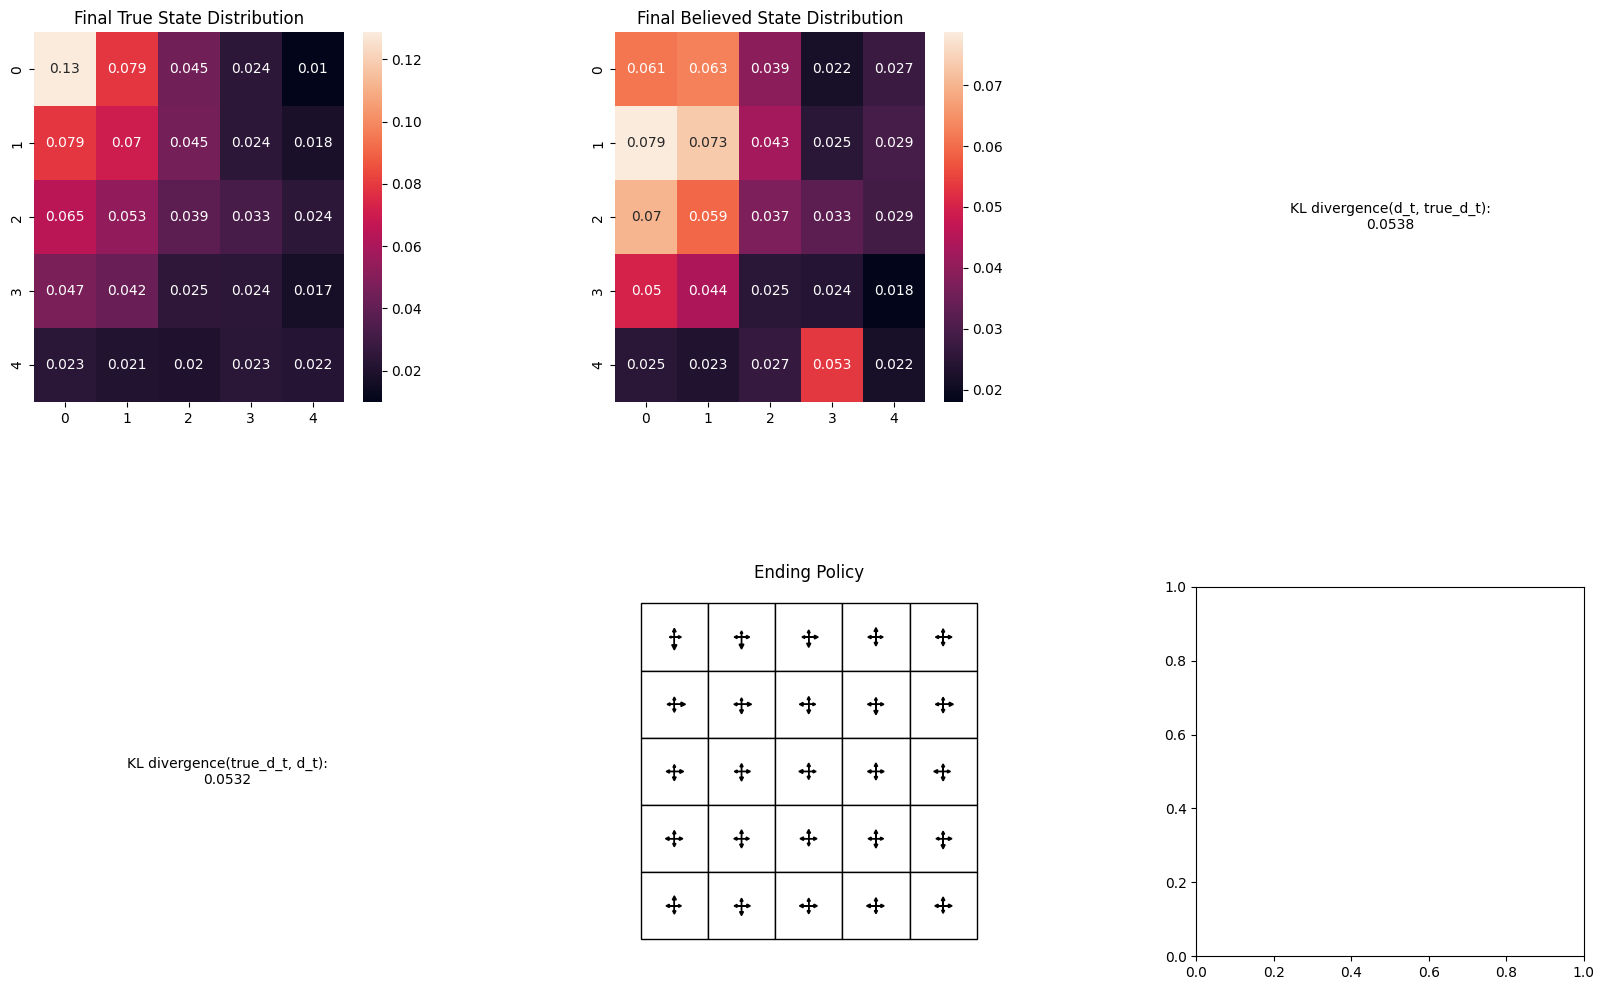

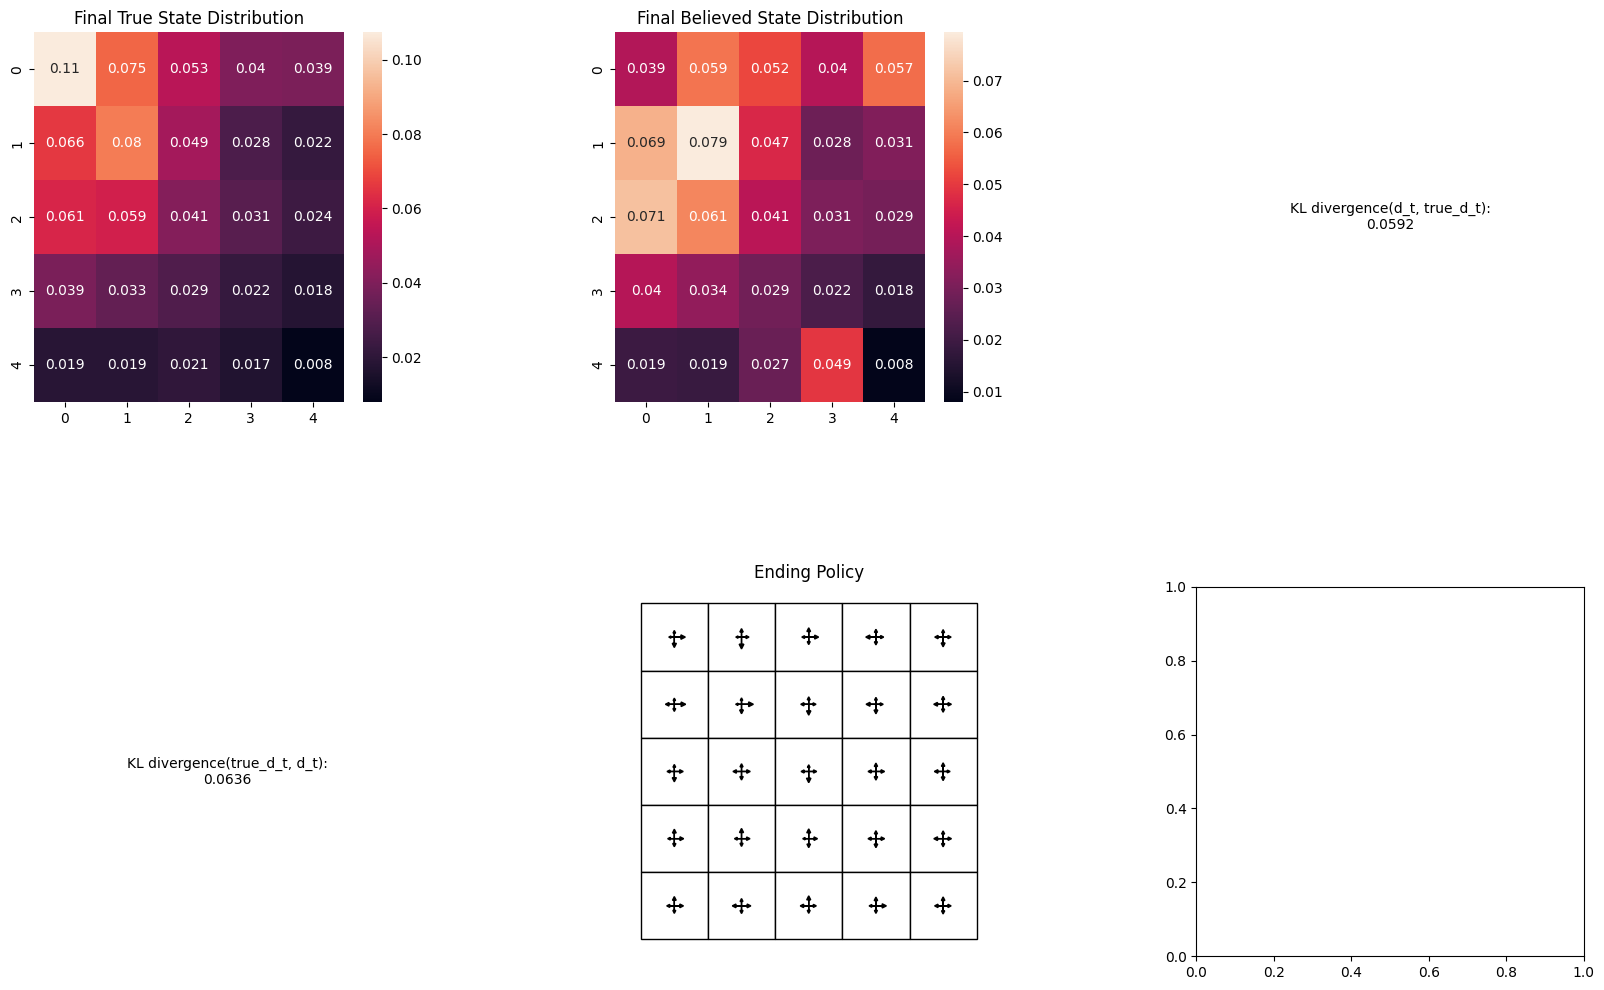

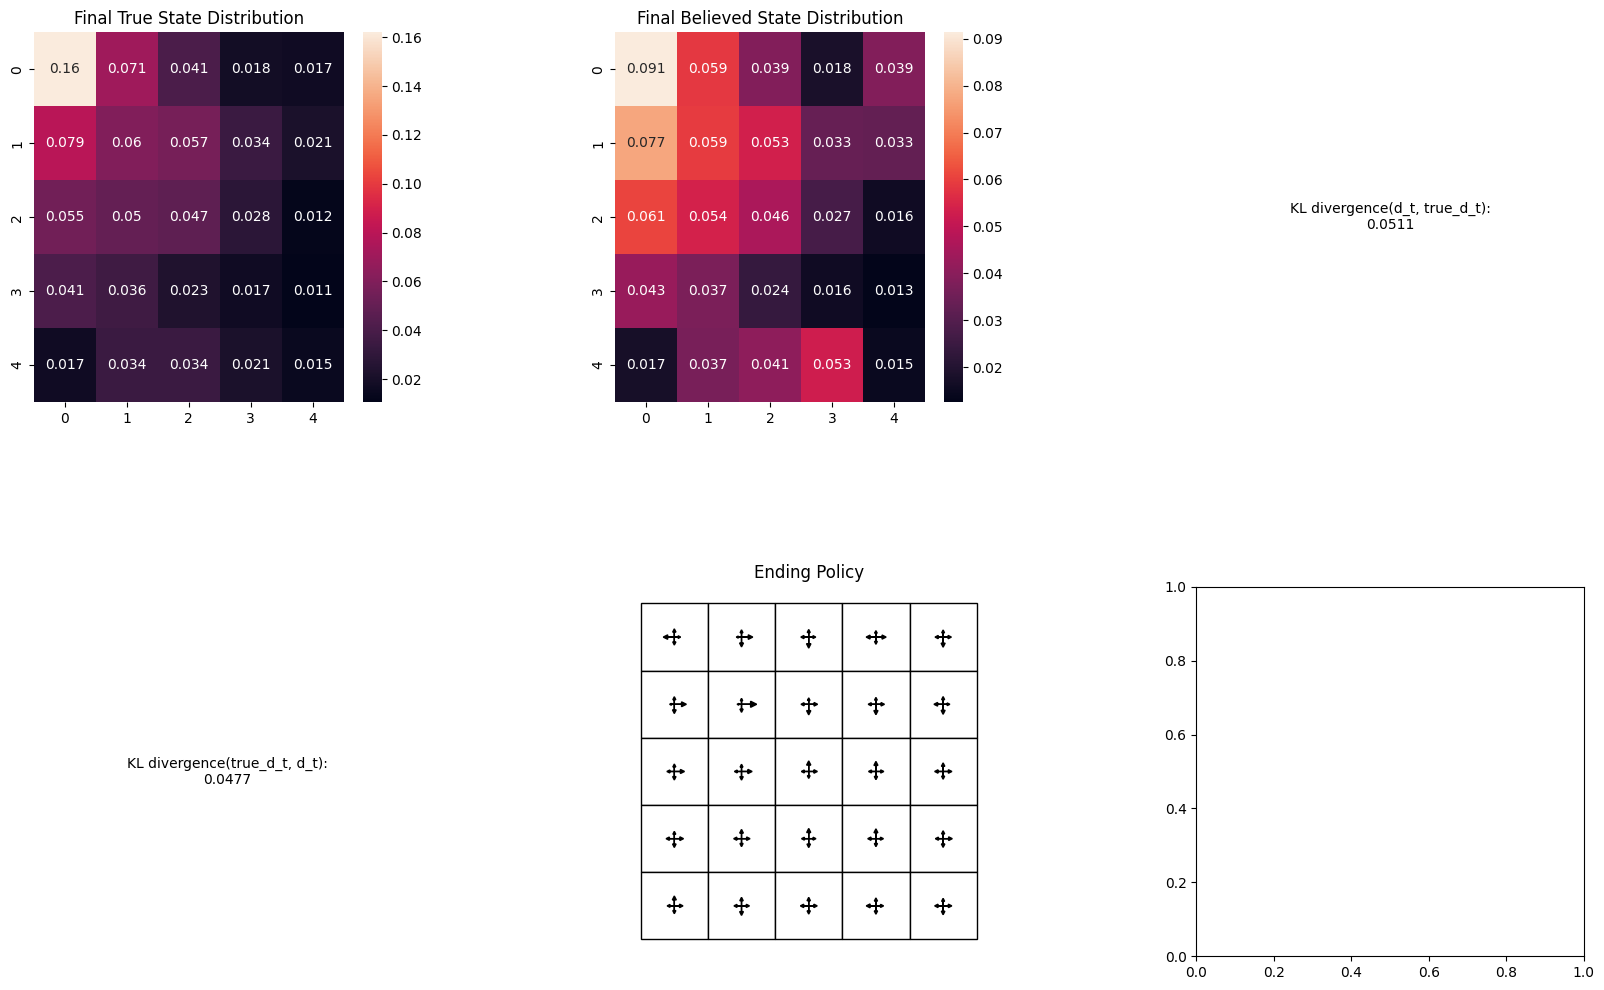

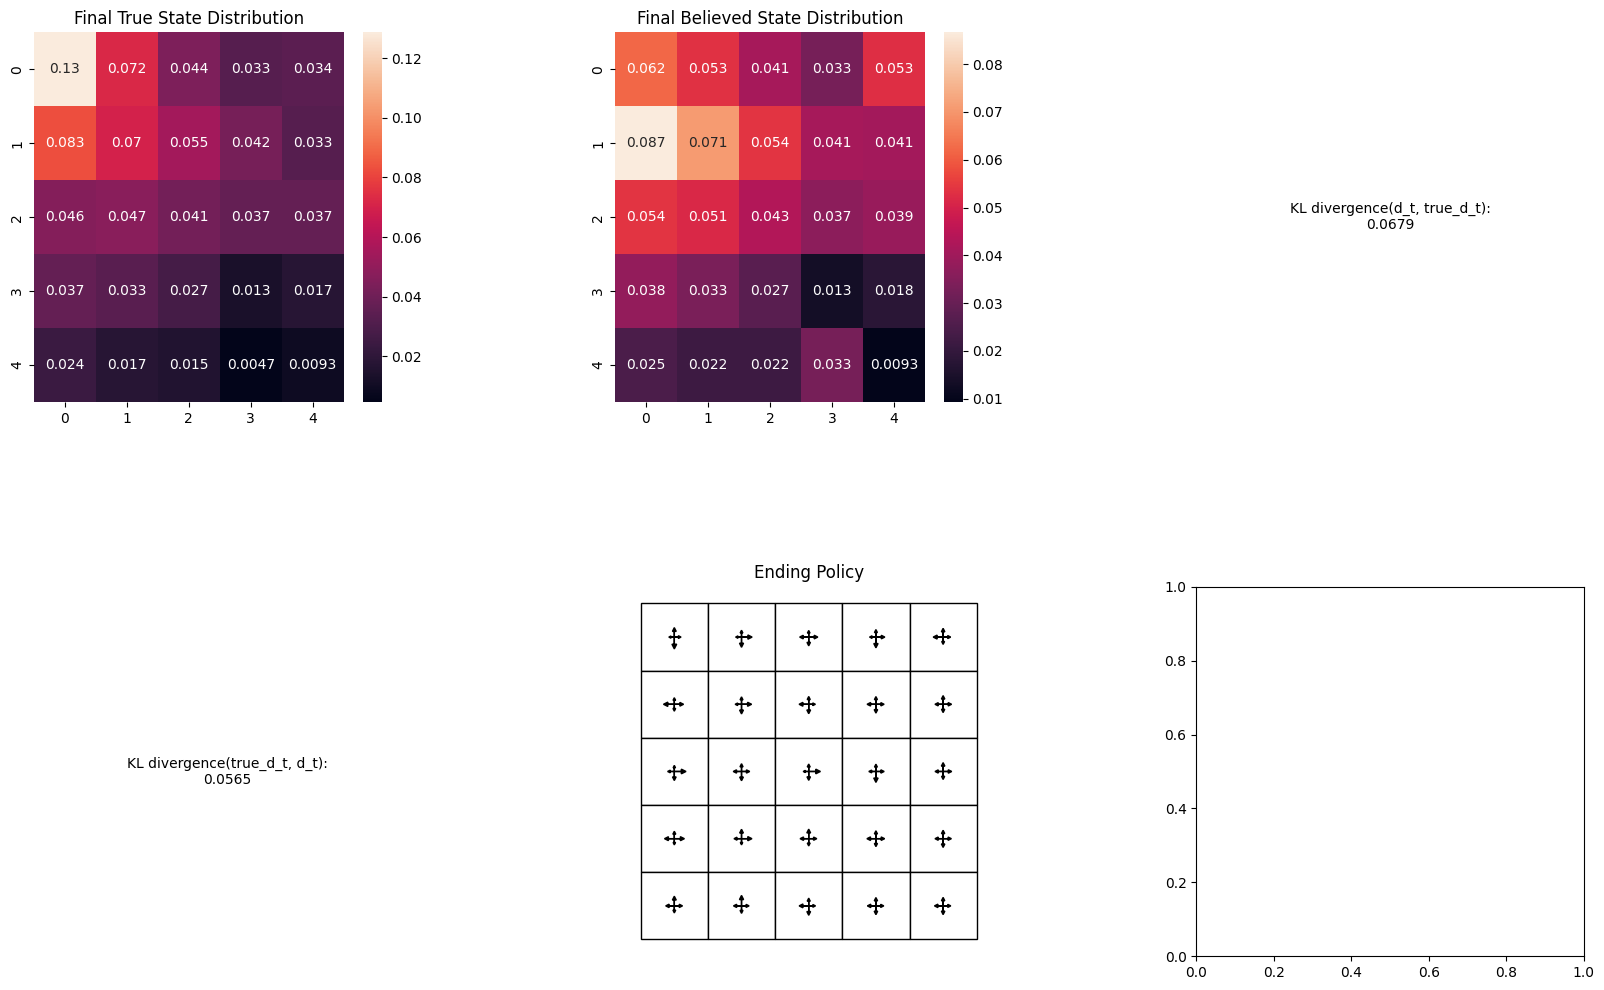

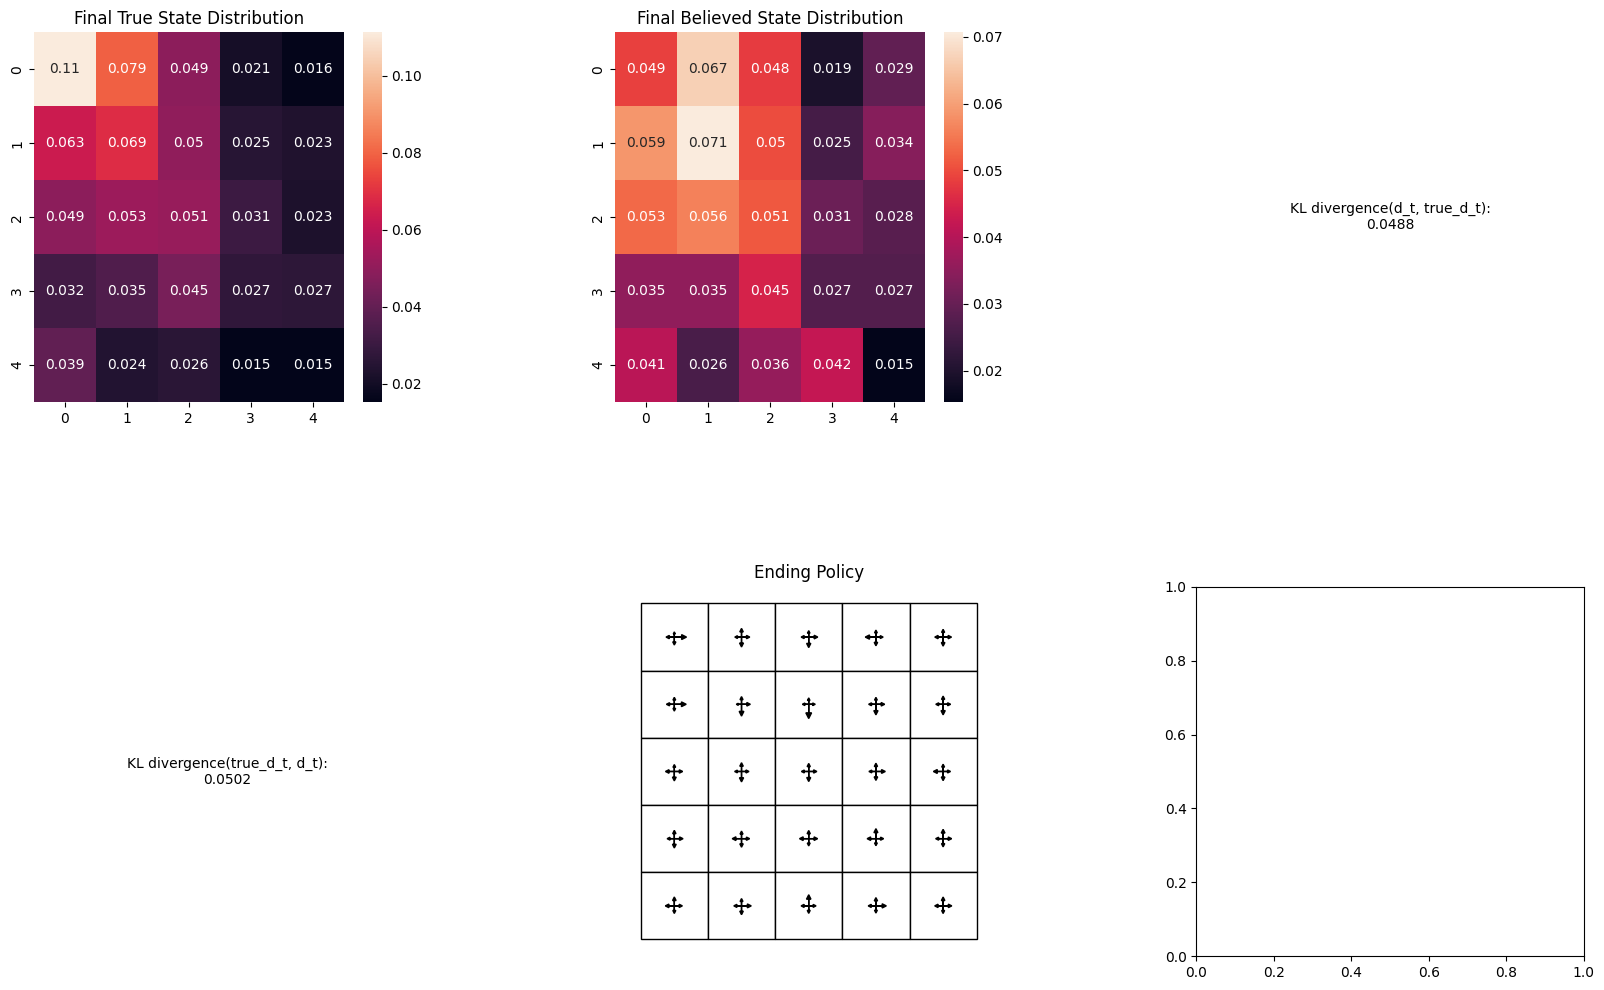

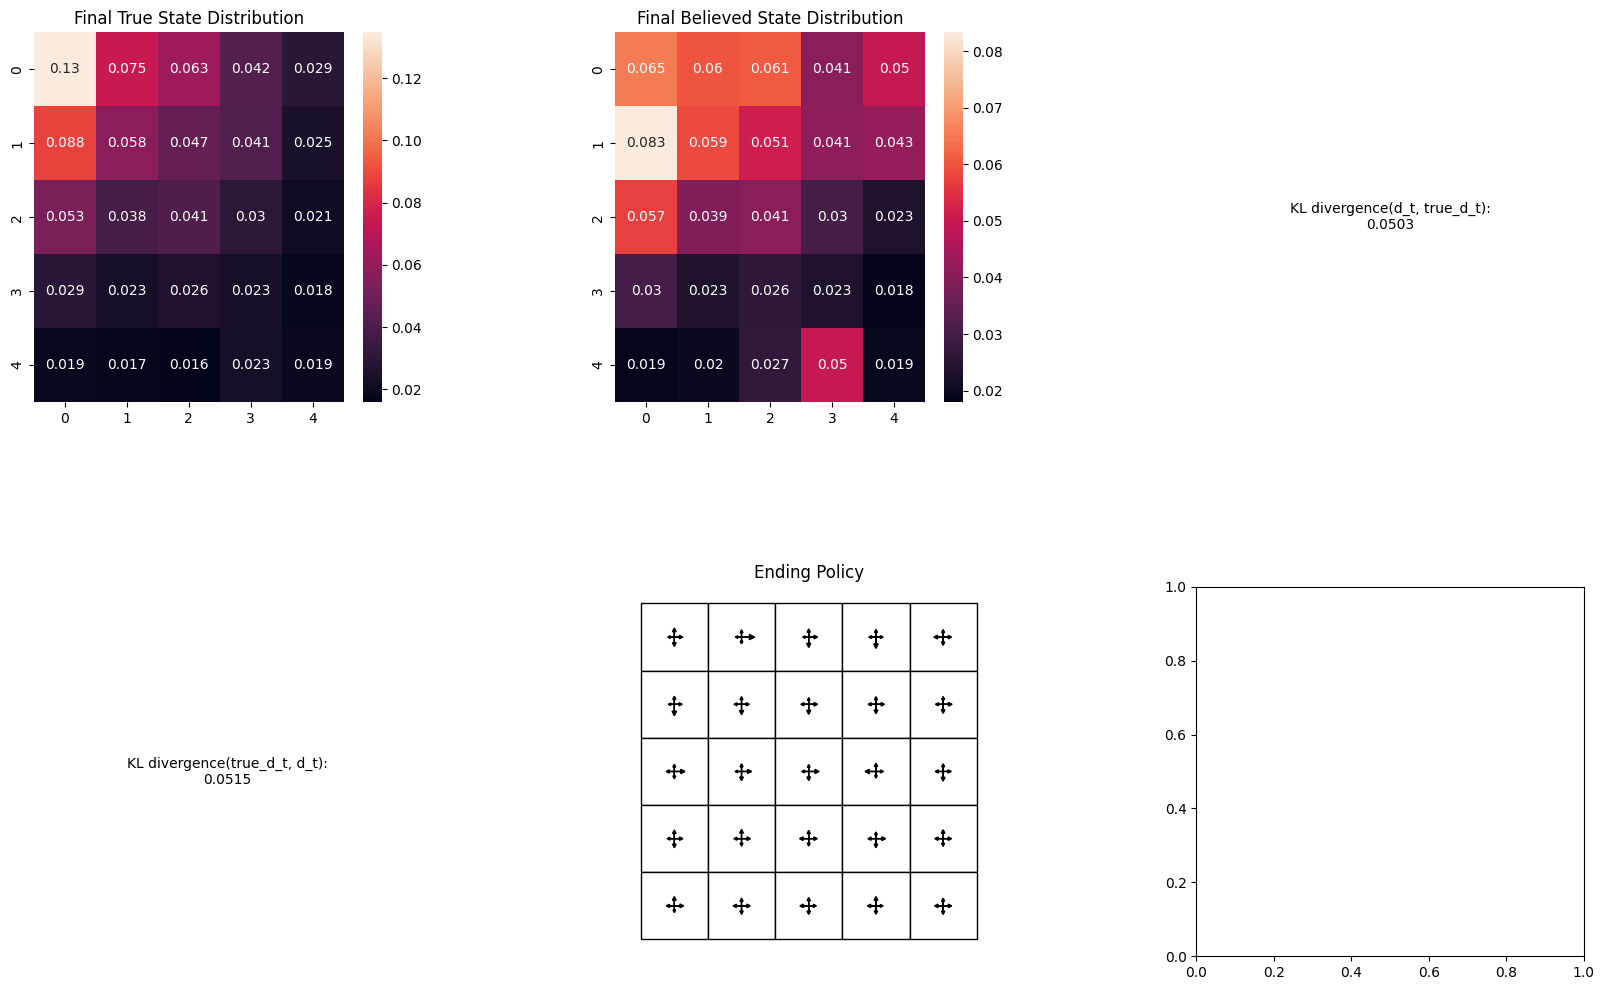

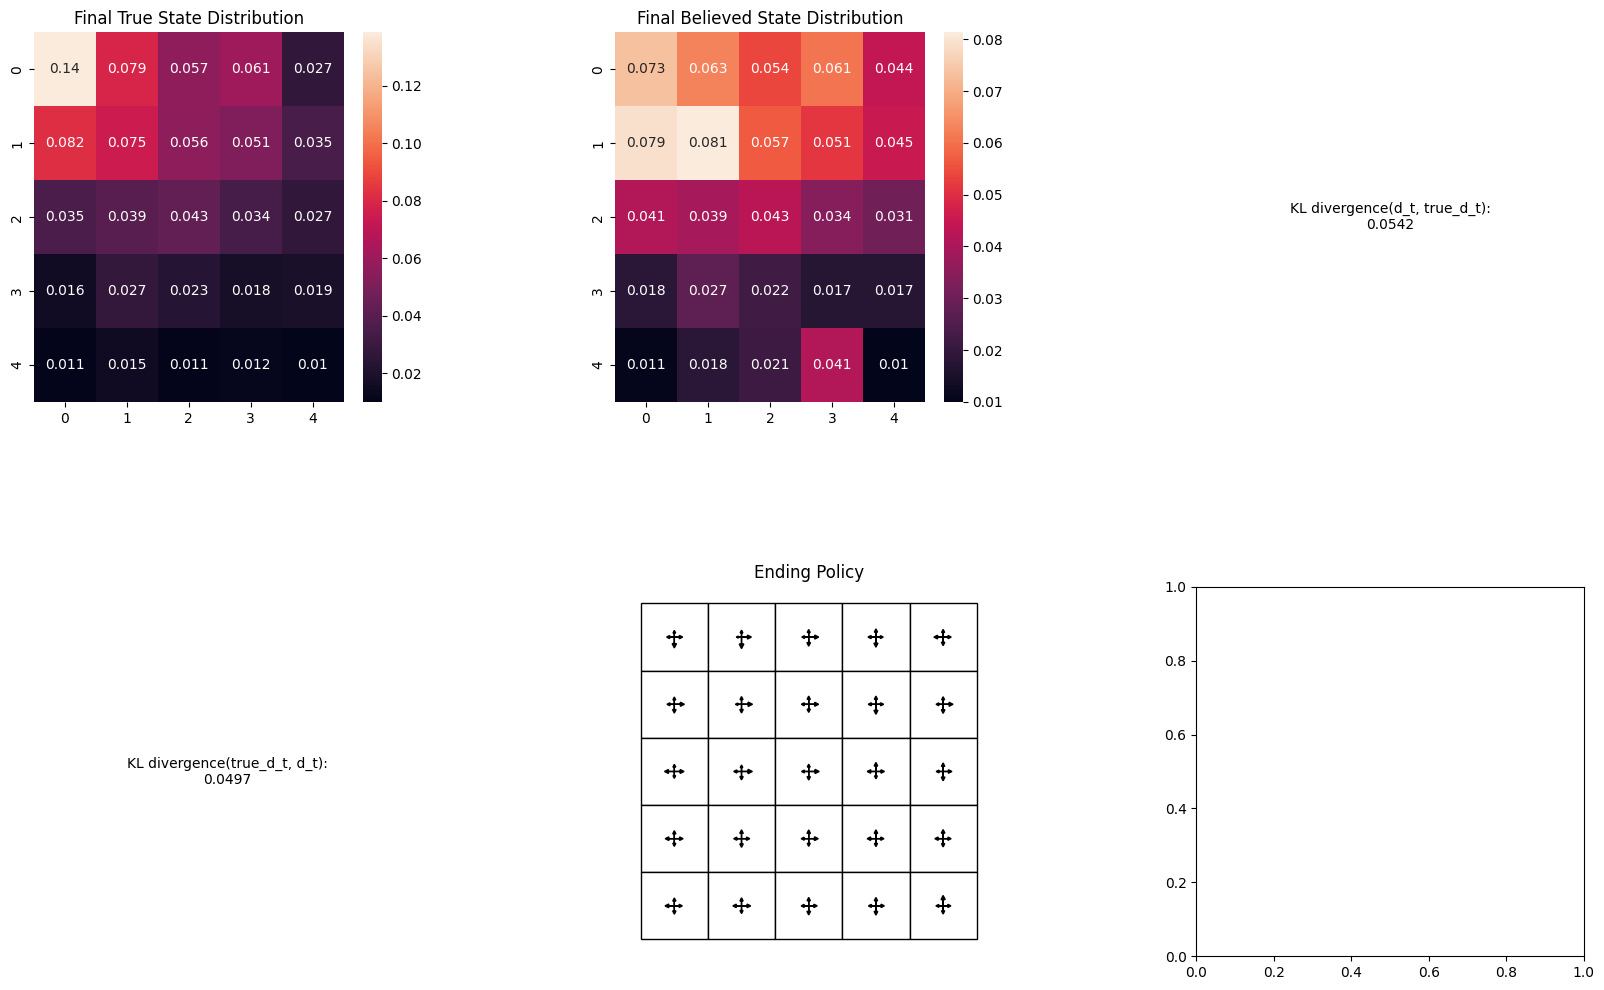

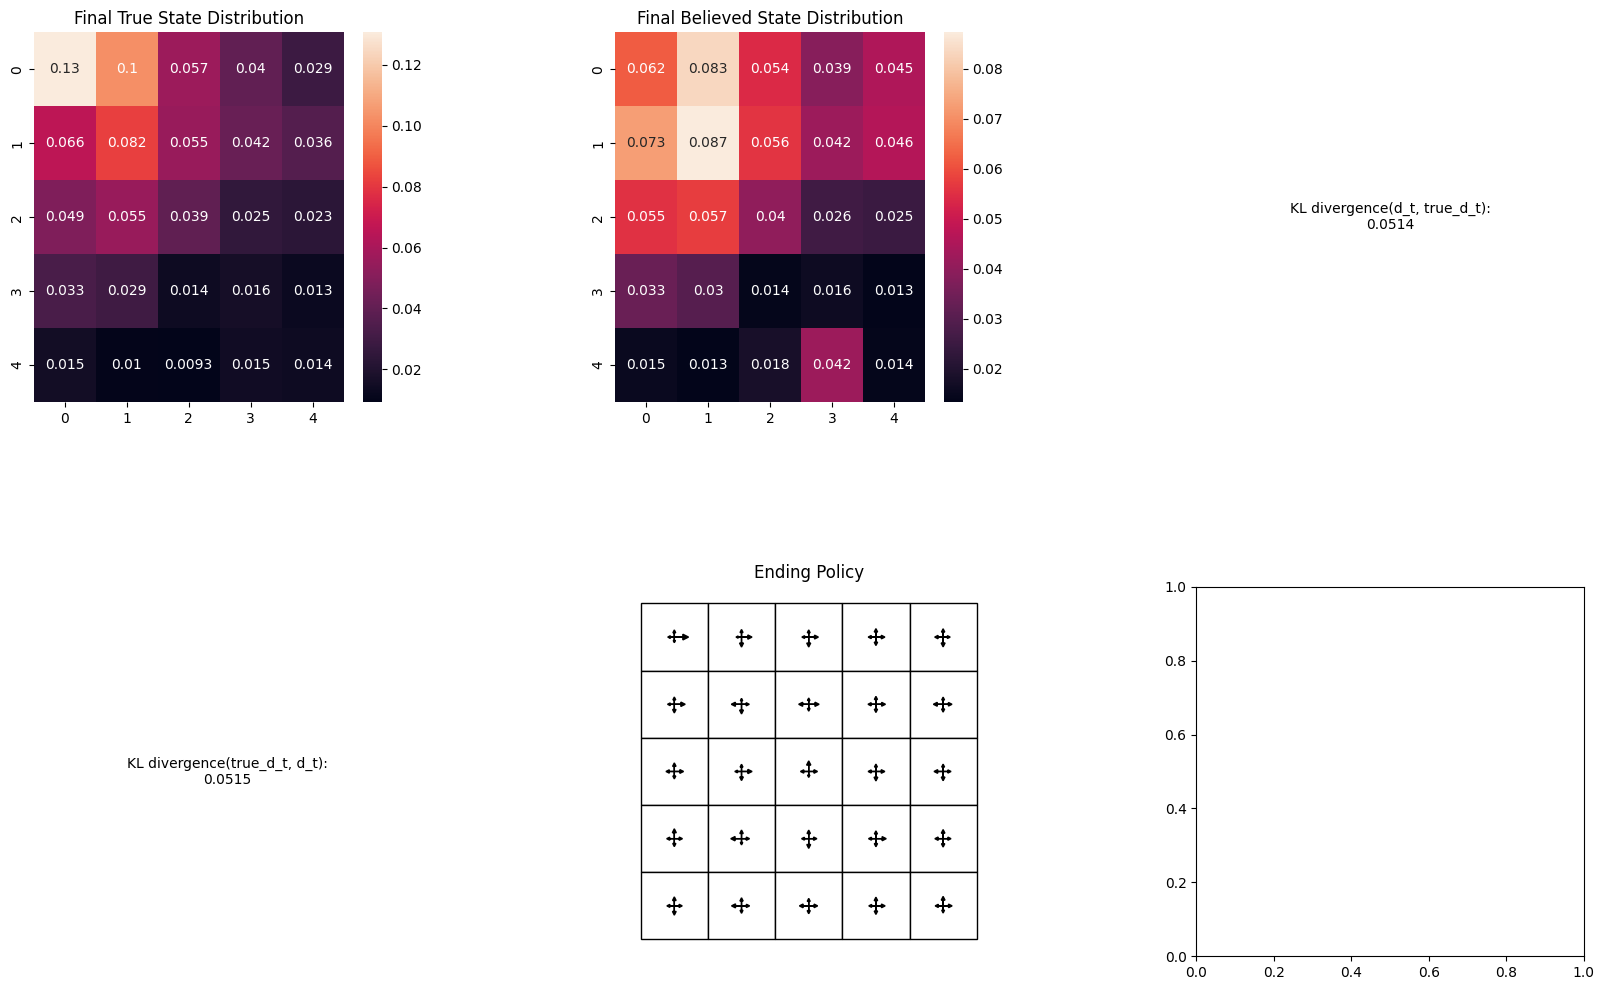

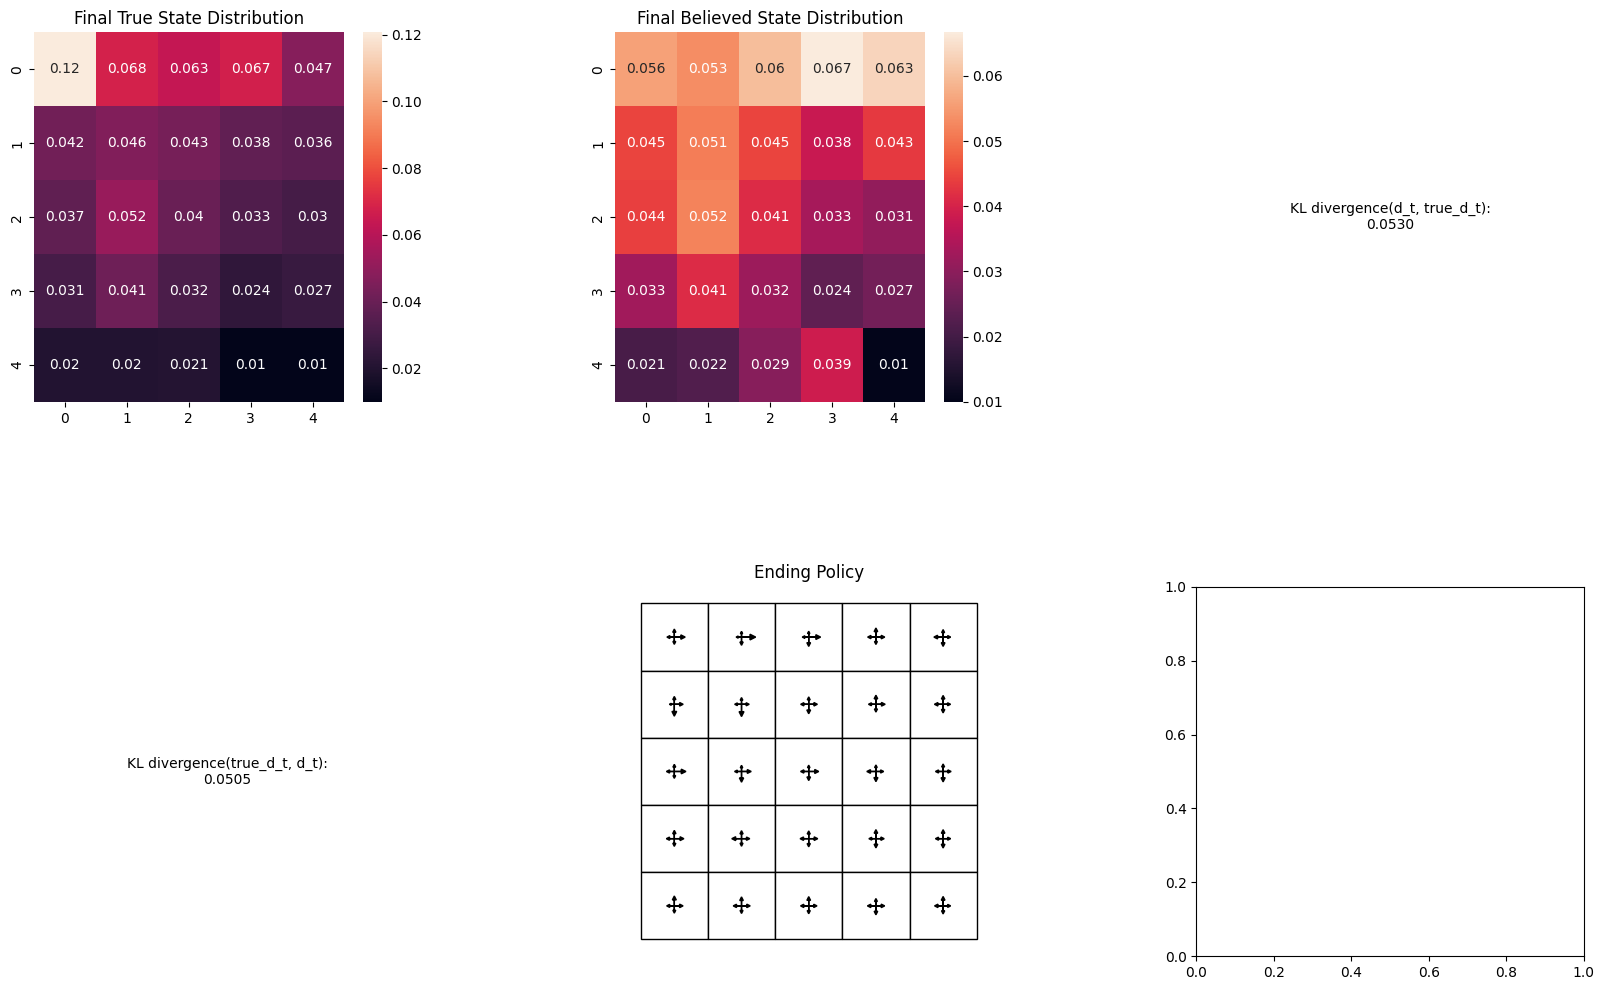

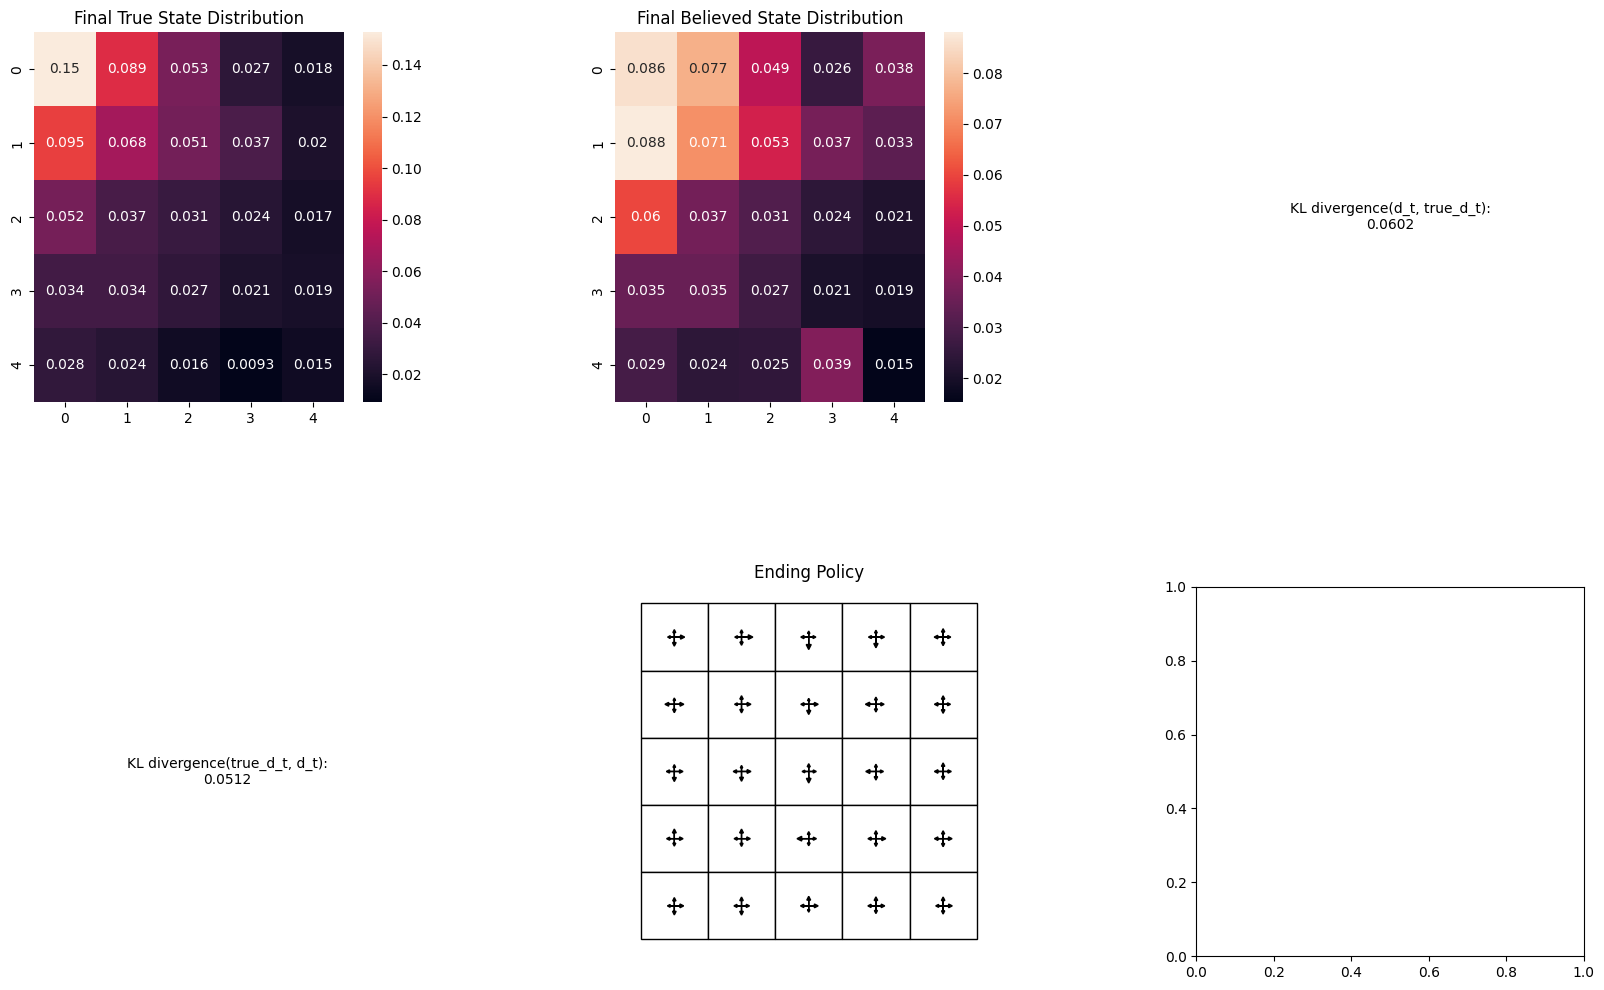

Stochastic Learned mean: 2.1669779592210867


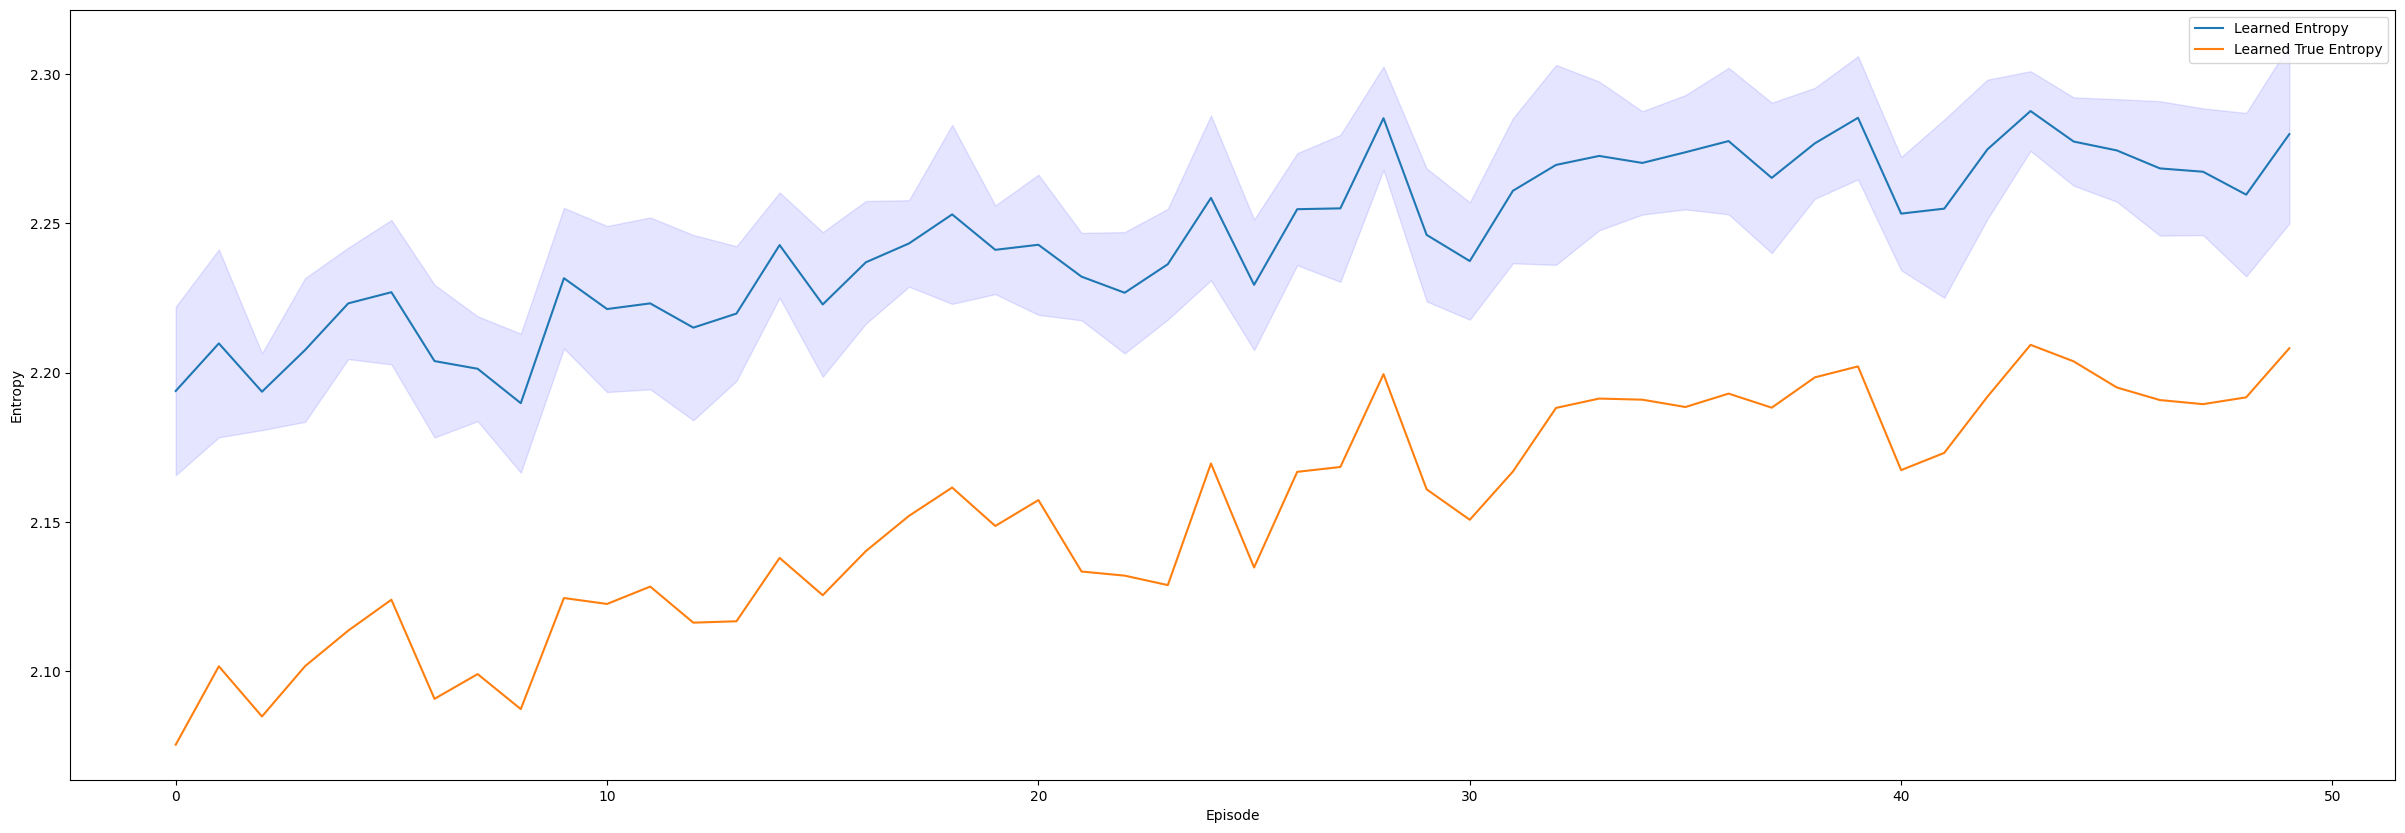

In [6]:
# Number of episodes for the training
n_episodes = 10000
n_traj = 60
# Number of runs per episode
n_run = 10
# Environment variables
time_horizon = 25
steepness=15
prob=0
randomize=0
# Agent variables
alpha = 0.15

# Create a list of arguments to pass to train_agent
args_list = [(r, alpha, n_traj, n_episodes, steepness, prob, randomize) for r in range(n_run)]

# Use multiprocessing.Pool to parallelize the runs
with Pool() as pool:
    results = pool.map(train_agent, args_list)

# Collect the results
list_entropies = []
list_true_entropies = []
for result in results:
    entropies, true_entropies = result
    list_entropies.append(entropies)
    list_true_entropies.append(true_entropies)

# Transpose the lists to get the desired format
list_entropies = np.transpose(np.array(list_entropies), (1, 0))
list_true_entropies = np.transpose(np.array(list_true_entropies), (1, 0))

# Prepare values to print
plot_args = {}
entropies_means = np.mean(list_entropies, axis=1)
entropies_stds = np.std(list_entropies, axis=1)
plot_args['Learned Entropy'] = [entropies_means, entropies_stds]
true_entropies_means = np.mean(list_true_entropies, axis=1)
true_entropies_stds = np.std(list_true_entropies, axis=1)
plot_args['Learned True Entropy'] = [true_entropies_means, true_entropies_stds]
plot_graph(n_run, n_episodes, plot_args, confidence, 'Entropy', "Deterministic Entropy POMDP")
tail = n_episodes*0.95
print("Stochastic Learned mean: " + str(np.mean(true_entropies_means[10:])))

## Deterministic Entropy POMDP Random Initial Position

  0%|                                                 | 0/32000 [00:00<?, ?it/s]/home/duilio999/.pyenv/versions/3.10.12/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/home/duilio999/.pyenv/versions/3.10.12/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:187: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  logger.warn(
/home/duilio999/.pyenv/versions/3.10.12/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
 25%|█████████                           | 8000/32000 [42:37<2:07:08,  3.15it/s

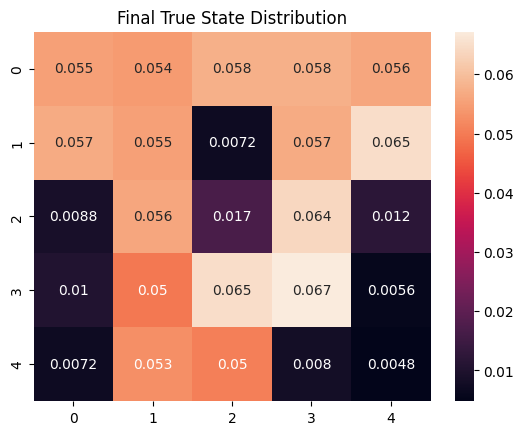

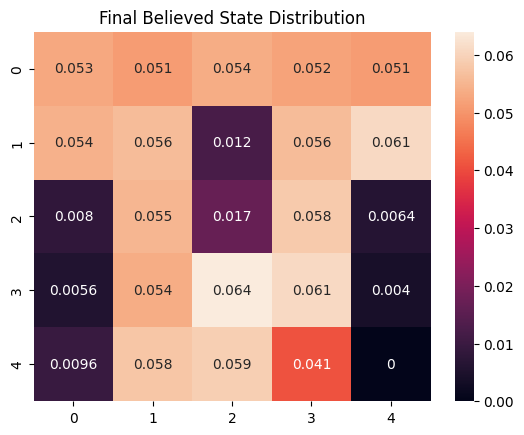

KL divergence(d_t, true_d_t): 0.04601422656466518
KL divergence(true_d_t, d_t): inf


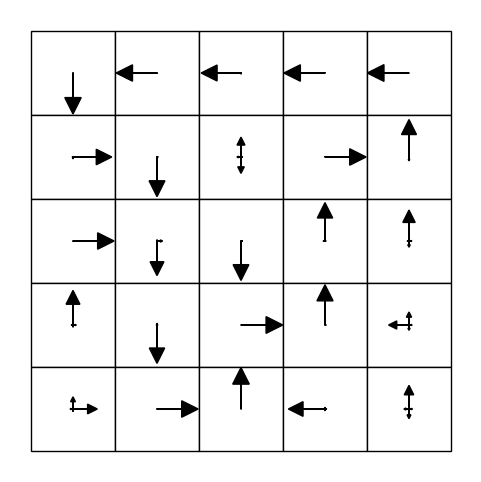

 50%|████████████████▌                | 16000/32000 [1:25:24<1:25:53,  3.10it/s]

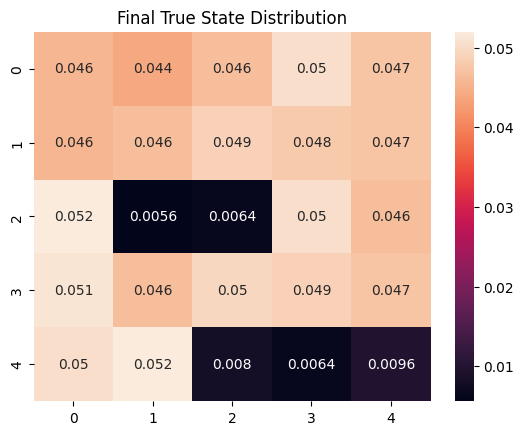

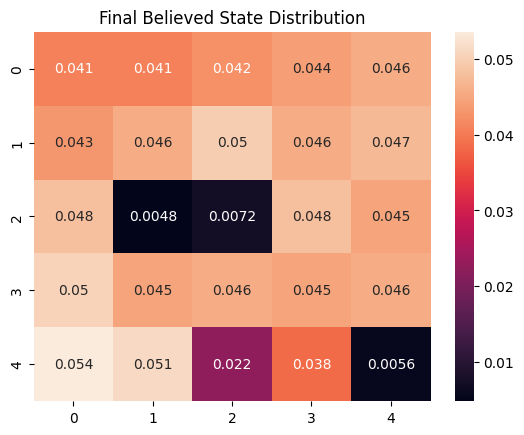

KL divergence(d_t, true_d_t): 0.04845225320577274
KL divergence(true_d_t, d_t): 0.029929454575168244


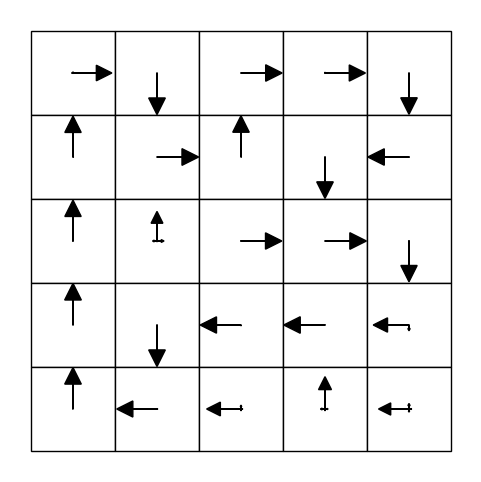

 75%|██████████████████████████▎        | 24000/32000 [2:08:55<42:23,  3.14it/s]

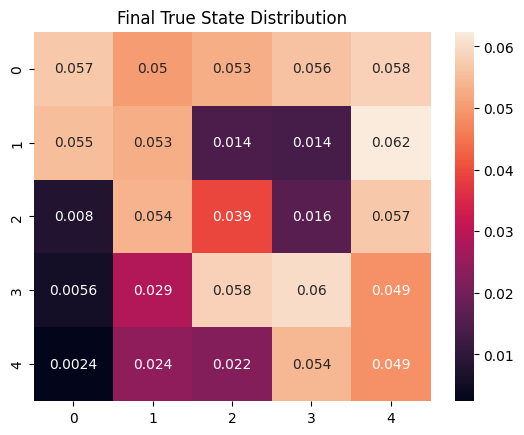

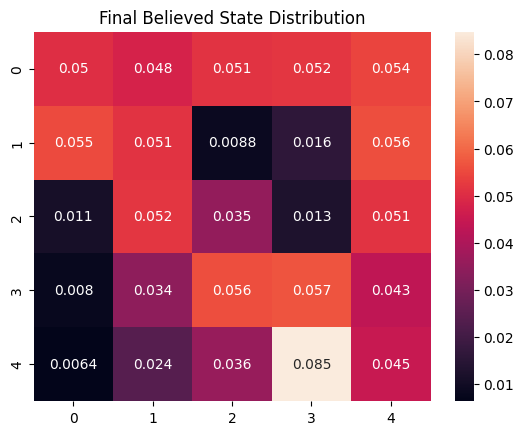

KL divergence(d_t, true_d_t): 0.018617188799259957
KL divergence(true_d_t, d_t): 0.016658495493316515


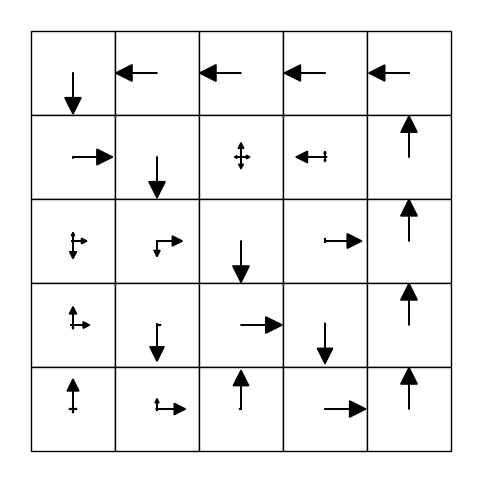

100%|███████████████████████████████████| 32000/32000 [2:52:10<00:00,  3.13it/s]

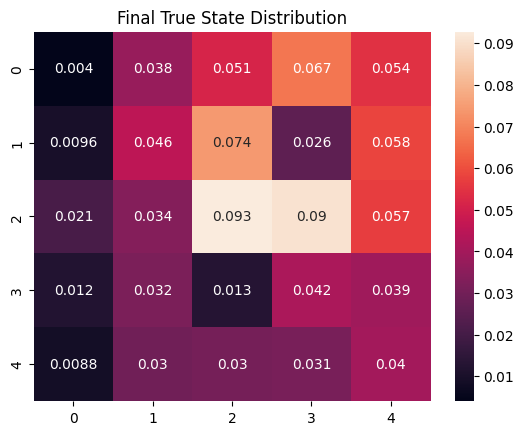

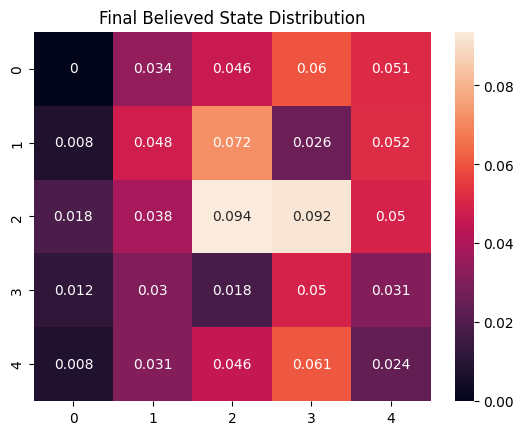

KL divergence(d_t, true_d_t): 0.026963364763077525
KL divergence(true_d_t, d_t): inf


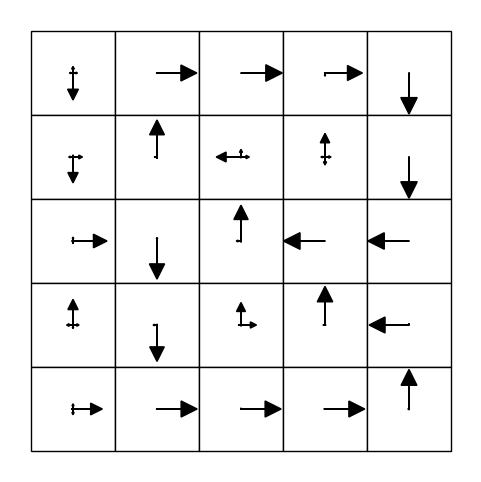

100%|███████████████████████████████████| 32000/32000 [2:52:12<00:00,  3.10it/s]


Stochastic True Learned mean: 2.781856565432319
Stochastic Learned mean: 2.8079995760140175


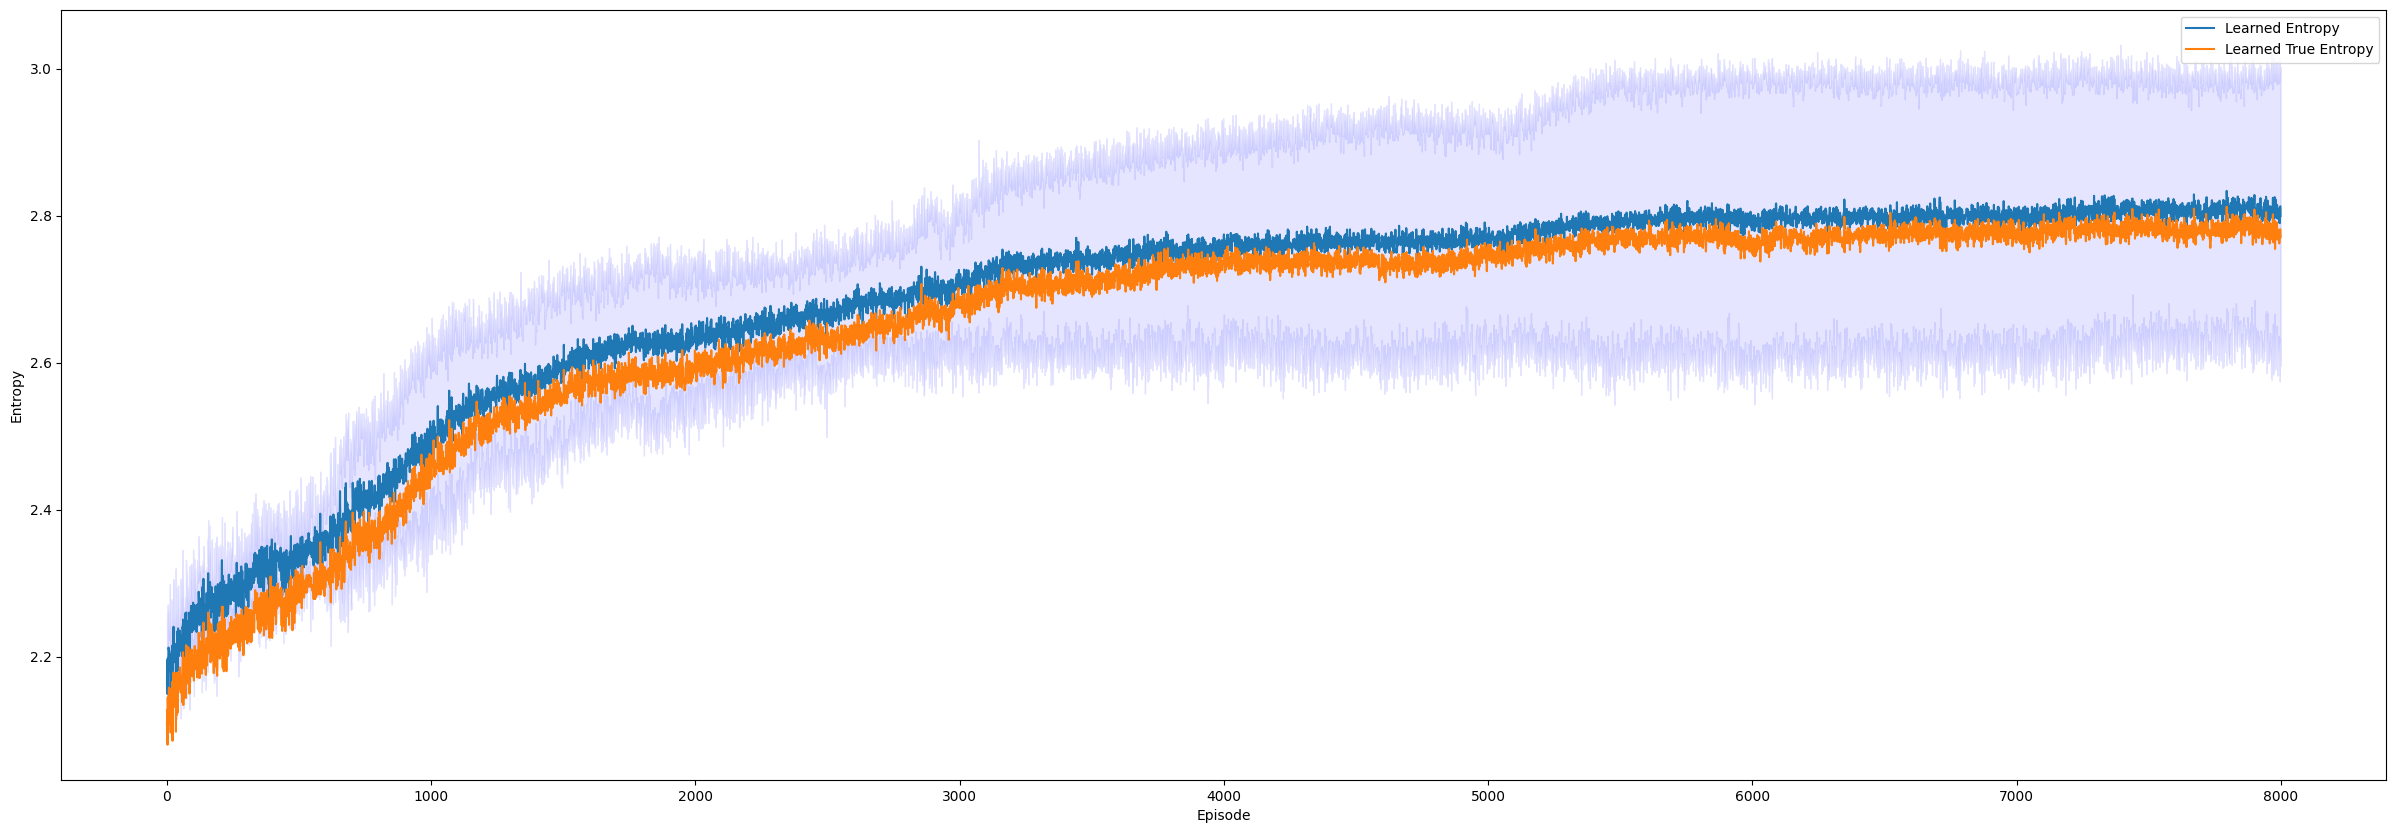

In [8]:
# Number of episodes for the training
n_episodes = 10000
n_traj = 60
# Number of runs per episode
n_run = 4
# Number of runs per episode
n_run = 10
# Environment variables
time_horizon = 25
steepness=15
prob=0
randomize=1
# Agent variables
alpha = 0.15

# Create a list of arguments to pass to train_agent
args_list = [(r, alpha, n_traj, n_episodes, steepness, prob, randomize) for r in range(n_run)]

# Use multiprocessing.Pool to parallelize the runs
with Pool() as pool:
    results = pool.map(train_agent, args_list)

# Collect the results
list_entropies = []
list_true_entropies = []
for result in results:
    entropies, true_entropies = result
    list_entropies.append(entropies)
    list_true_entropies.append(true_entropies)

# Transpose the lists to get the desired format
list_entropies = np.transpose(np.array(list_entropies), (1, 0))
list_true_entropies = np.transpose(np.array(list_true_entropies), (1, 0))

# Prepare values to print
plot_args = {}
entropies_means = np.mean(list_entropies, axis=1)
entropies_stds = np.std(list_entropies, axis=1)
plot_args['Learned Entropy'] = [entropies_means, entropies_stds]
true_entropies_means = np.mean(list_true_entropies, axis=1)
true_entropies_stds = np.std(list_true_entropies, axis=1)
plot_args['Learned True Entropy'] = [true_entropies_means, true_entropies_stds]
plot_graph(n_run, n_episodes, plot_args, confidence, 'Entropy', "Deterministic Entropy POMDP random initial position")
tail = n_episodes*0.95
print("Stochastic Learned mean: " + str(np.mean(true_entropies_means[tail:])))

## Deterministic Entropy POMDP, Longer Time Horizon

In [7]:
# Number of episodes for the training
n_episodes = 10000
n_traj = 60
# Number of runs per episode
n_run = 10
# Environment variables
time_horizon = 50
steepness=15
prob=0
randomize=1
# Agent variables
alpha = 0.15

# Create a list of arguments to pass to train_agent
args_list = [(r, alpha, n_traj, n_episodes, steepness, prob, randomize) for r in range(n_run)]

# Use multiprocessing.Pool to parallelize the runs
with Pool() as pool:
    results = pool.map(train_agent, args_list)

# Collect the results
list_entropies = []
list_true_entropies = []
for result in results:
    entropies, true_entropies = result
    list_entropies.append(entropies)
    list_true_entropies.append(true_entropies)

# Transpose the lists to get the desired format
list_entropies = np.transpose(np.array(list_entropies), (1, 0))
list_true_entropies = np.transpose(np.array(list_true_entropies), (1, 0))

# Prepare values to print
plot_args = {}
entropies_means = np.mean(list_entropies, axis=1)
entropies_stds = np.std(list_entropies, axis=1)
plot_args['Learned Entropy'] = [entropies_means, entropies_stds]
true_entropies_means = np.mean(list_true_entropies, axis=1)
true_entropies_stds = np.std(list_true_entropies, axis=1)
plot_args['Learned True Entropy'] = [true_entropies_means, true_entropies_stds]
plot_graph(n_run, n_episodes, plot_args, confidence, 'Entropy', "Deterministic Entropy POMDP longer time_horizon")
tail = n_episodes*0.95
print("Stochastic Learned mean: " + str(np.mean(true_entropies_means[tail:])))










Run 0:   0%|                                            | 0/100 [00:00<?, ?it/s]








Run 2:   0%|                                            | 0/100 [00:00<?, ?it/s]







Run 3:   0%|                                            | 0/100 [00:00<?, ?it/s]











Run 5:   0%|                                            | 0/100 [00:00<?, ?it/s]/home/duilio999/.pyenv/versions/3.10.12/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
/home/duilio999/.pyenv/versions/3.10.12/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


/home/duilio999/.pyenv/versions/3.10.12/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8

KeyboardInterrupt: 

## Stochastic Entropy POMDP

In [ ]:
# Number of episodes for the training
n_episodes = 8000
n_traj = 60
# Number of runs per episode
n_run = 10
# Environment variables
time_horizon = 25
steepness=15
prob=0.1
randomize=0
# Agent variables
alpha = 0.15

# Create a list of arguments to pass to train_agent
args_list = [(r, alpha, n_traj, n_episodes, steepness, prob, randomize) for r in range(n_run)]

# Use multiprocessing.Pool to parallelize the runs
with Pool() as pool:
    results = pool.map(train_agent, args_list)

# Collect the results
list_entropies = []
list_true_entropies = []
for result in results:
    entropies, true_entropies = result
    list_entropies.append(entropies)
    list_true_entropies.append(true_entropies)

# Transpose the lists to get the desired format
list_entropies = np.transpose(np.array(list_entropies), (1, 0))
list_true_entropies = np.transpose(np.array(list_true_entropies), (1, 0))

# Prepare values to print
plot_args = {}
entropies_means = np.mean(list_entropies, axis=1)
entropies_stds = np.std(list_entropies, axis=1)
plot_args['Learned Entropy'] = [entropies_means, entropies_stds]
true_entropies_means = np.mean(list_true_entropies, axis=1)
true_entropies_stds = np.std(list_true_entropies, axis=1)
plot_args['Learned True Entropy'] = [true_entropies_means, true_entropies_stds]
plot_graph(n_run, n_episodes, plot_args, confidence, 'Entropy', "Strochastic Entropy POMDP")
print("Stochastic Learned mean: " + str(np.mean(true_entropies_means[n_episodes*0.95:])))

NameError: name 'GridworldPOMDPEnvGoalless' is not defined

## Stochastic Entropy POMDP with Random Initial Position

In [ ]:
# Number of episodes for the training
n_episodes = 8000
n_traj = 60
# Number of runs per episode
n_run = 10
# Environment variables
time_horizon = 25
steepness=15
prob=0.1
randomize=1
# Agent variables
alpha = 0.15

# Create a list of arguments to pass to train_agent
args_list = [(r, alpha, n_traj, n_episodes, steepness, prob, randomize) for r in range(n_run)]

# Use multiprocessing.Pool to parallelize the runs
with Pool() as pool:
    results = pool.map(train_agent, args_list)

# Collect the results
list_entropies = []
list_true_entropies = []
for result in results:
    entropies, true_entropies = result
    list_entropies.append(entropies)
    list_true_entropies.append(true_entropies)

# Transpose the lists to get the desired format
list_entropies = np.transpose(np.array(list_entropies), (1, 0))
list_true_entropies = np.transpose(np.array(list_true_entropies), (1, 0))

# Prepare values to print
plot_args = {}
entropies_means = np.mean(list_entropies, axis=1)
entropies_stds = np.std(list_entropies, axis=1)
plot_args['Learned Entropy'] = [entropies_means, entropies_stds]
true_entropies_means = np.mean(list_true_entropies, axis=1)
true_entropies_stds = np.std(list_true_entropies, axis=1)
plot_args['Learned True Entropy'] = [true_entropies_means, true_entropies_stds]
plot_graph(n_run, n_episodes, plot_args, confidence, 'Entropy', "Strochastic Entropy POMDP random initial position")
print("Stochastic Learned mean: " + str(np.mean(true_entropies_means[n_episodes*0.95:])))

# Bimodal Env

In [ ]:
gym.envs.register(
    id='Gridworld-v0',
    entry_point=environments.GridworldPOMDPEnvBiModal
)
env = gym.make('GridworldPOMDPEnvBiModal-v0')

In [ ]:
# Define a function to perform the training for a single run
def train_agent(args):
    run_idx, alpha, n_traj, n_episodes, steepness, prob, randomize, shift_amount = args
    env = gym.make("GridworldPOMDPEnvGoalless-v0", time_horizon=time_horizon, steepness=steepness, prob=prob, randomize=randomize)  # Create a new environment for each run
    agent = agents.REINFORCEAgentEPOMDP(env, alpha=alpha)
    avg_entropies = []
    avg_true_entropies = []

    with tqdm(total=n_episodes, position=run_idx, ncols=80, desc=f'Run {run_idx}') as pbar:
        for i in range(n_episodes):
            episodes, true_entropies = agent.play(env=env, n_traj=n_traj)
            entropies = agent.update_multiple_sampling(episodes)
            avg_entropies.append(np.mean(entropies))
            avg_true_entropies.append(np.mean(true_entropies))
            pbar.update(1)

    return avg_entropies, avg_true_entropies

In [ ]:
# Test observation matrix
sns.heatmap(np.reshape(env.observation_matrix[0], (env.grid_size, env.grid_size)), annot=True)
print(np.sum(env.observation_matrix[0]))
print(np.sum(env.observation_matrix[0][0]))


**Deterministic BiModal**

In [ ]:
# Number of episodes for the training
n_episodes = 10000
n_traj = 60
# Number of runs per episode
n_run = 10
# Environment variables
time_horizon = 25
steepness=15
prob=0
randomize=0
shift_amount=0.8
# Agent variables
alpha = 0.15

# Create a list of arguments to pass to train_agent
args_list = [(r, alpha, n_traj, n_episodes, steepness, prob, randomize, shift_amount) for r in range(n_run)]

# Use multiprocessing.Pool to parallelize the runs
with Pool() as pool:
    results = pool.map(train_agent, args_list)

# Collect the results
list_entropies = []
list_true_entropies = []
for result in results:
    entropies, true_entropies = result
    list_entropies.append(entropies)
    list_true_entropies.append(true_entropies)

# Transpose the lists to get the desired format
list_entropies = np.transpose(np.array(list_entropies), (1, 0))
list_true_entropies = np.transpose(np.array(list_true_entropies), (1, 0))

# Prepare values to print
plot_args = {}
entropies_means = np.mean(list_entropies, axis=1)
entropies_stds = np.std(list_entropies, axis=1)
plot_args['Learned Entropy'] = [entropies_means, entropies_stds]
true_entropies_means = np.mean(list_true_entropies, axis=1)
true_entropies_stds = np.std(list_true_entropies, axis=1)
plot_args['Learned True Entropy'] = [true_entropies_means, true_entropies_stds]
plot_graph(n_run, n_episodes, plot_args, confidence, 'Entropy', "Deterministic Entropy POMDP BiModal")
tail = n_episodes*0.95
print("Stochastic Learned mean: " + str(np.mean(true_entropies_means[tail:])))

**Deterministic BiModal Random Initial Position**

In [ ]:
# Number of episodes for the training
n_episodes = 10000
n_traj = 60
# Number of runs per episode
n_run = 10
# Environment variables
time_horizon = 25
steepness=15
prob=0
randomize=1
shift_amount=0.8
# Agent variables
alpha = 0.15

# Create a list of arguments to pass to train_agent
args_list = [(r, alpha, n_traj, n_episodes, steepness, prob, randomize, shift_amount) for r in range(n_run)]

# Use multiprocessing.Pool to parallelize the runs
with Pool() as pool:
    results = pool.map(train_agent, args_list)

# Collect the results
list_entropies = []
list_true_entropies = []
for result in results:
    entropies, true_entropies = result
    list_entropies.append(entropies)
    list_true_entropies.append(true_entropies)

# Transpose the lists to get the desired format
list_entropies = np.transpose(np.array(list_entropies), (1, 0))
list_true_entropies = np.transpose(np.array(list_true_entropies), (1, 0))

# Prepare values to print
plot_args = {}
entropies_means = np.mean(list_entropies, axis=1)
entropies_stds = np.std(list_entropies, axis=1)
plot_args['Learned Entropy'] = [entropies_means, entropies_stds]
true_entropies_means = np.mean(list_true_entropies, axis=1)
true_entropies_stds = np.std(list_true_entropies, axis=1)
plot_args['Learned True Entropy'] = [true_entropies_means, true_entropies_stds]
plot_graph(n_run, n_episodes, plot_args, confidence, 'Entropy', "Deterministic Entropy POMDP BiModal Random Initial Position")
tail = n_episodes*0.95
print("Stochastic Learned mean: " + str(np.mean(true_entropies_means[tail:])))

**Deterministic BiModal Random Initial Position Prior Correct**

In [ ]:
'''# Number of episodes for the training
n_episodes = 10000
n_traj = 60
# Number of runs per episode
n_run = 10
# Environment variables
time_horizon = 25
steepness=15
prob=0
randomize=0
shift_amount=0.8
# Agent variables
alpha = 0.15

# Create a list of arguments to pass to train_agent
args_list = [(r, alpha, n_traj, n_episodes, steepness, prob, randomize, shift_amount) for r in range(n_run)]

# Use multiprocessing.Pool to parallelize the runs
with Pool() as pool:
    results = pool.map(train_agent, args_list)

# Collect the results
list_entropies = []
list_true_entropies = []
for result in results:
    entropies, true_entropies = result
    list_entropies.append(entropies)
    list_true_entropies.append(true_entropies)

# Transpose the lists to get the desired format
list_entropies = np.transpose(np.array(list_entropies), (1, 0))
list_true_entropies = np.transpose(np.array(list_true_entropies), (1, 0))

# Prepare values to print
plot_args = {}
entropies_means = np.mean(list_entropies, axis=1)
entropies_stds = np.std(list_entropies, axis=1)
plot_args['Learned Entropy'] = [entropies_means, entropies_stds]
true_entropies_means = np.mean(list_true_entropies, axis=1)
true_entropies_stds = np.std(list_true_entropies, axis=1)
plot_args['Learned True Entropy'] = [true_entropies_means, true_entropies_stds]
plot_graph(n_run, n_episodes, plot_args, confidence, 'Entropy', "Deterministic Entropy POMDP BiModal")
tail = n_episodes*0.95
print("Stochastic Learned mean: " + str(np.mean(true_entropies_means[tail:])))'''

**Stochastic BiModal**

In [ ]:
# Number of episodes for the training
n_episodes = 10000
n_traj = 60
# Number of runs per episode
n_run = 10
# Environment variables
time_horizon = 25
steepness=15
prob=0.1
randomize=0
shift_amount=0.8
# Agent variables
alpha = 0.15

# Create a list of arguments to pass to train_agent
args_list = [(r, alpha, n_traj, n_episodes, steepness, prob, randomize, shift_amount) for r in range(n_run)]

# Use multiprocessing.Pool to parallelize the runs
with Pool() as pool:
    results = pool.map(train_agent, args_list)

# Collect the results
list_entropies = []
list_true_entropies = []
for result in results:
    entropies, true_entropies = result
    list_entropies.append(entropies)
    list_true_entropies.append(true_entropies)

# Transpose the lists to get the desired format
list_entropies = np.transpose(np.array(list_entropies), (1, 0))
list_true_entropies = np.transpose(np.array(list_true_entropies), (1, 0))

# Prepare values to print
plot_args = {}
entropies_means = np.mean(list_entropies, axis=1)
entropies_stds = np.std(list_entropies, axis=1)
plot_args['Learned Entropy'] = [entropies_means, entropies_stds]
true_entropies_means = np.mean(list_true_entropies, axis=1)
true_entropies_stds = np.std(list_true_entropies, axis=1)
plot_args['Learned True Entropy'] = [true_entropies_means, true_entropies_stds]
plot_graph(n_run, n_episodes, plot_args, confidence, 'Entropy', "Stochastic Entropy POMDP BiModal")
tail = n_episodes*0.95
print("Stochastic Learned mean: " + str(np.mean(true_entropies_means[tail:])))

**Stochastic Random BiModal**

In [ ]:
# Number of episodes for the training
n_episodes = 10000
n_traj = 60
# Number of runs per episode
n_run = 10
# Environment variables
time_horizon = 25
steepness=15
prob=0
randomize=1
shift_amount=0.8
# Agent variables
alpha = 0.15

# Create a list of arguments to pass to train_agent
args_list = [(r, alpha, n_traj, n_episodes, steepness, prob, randomize, shift_amount) for r in range(n_run)]

# Use multiprocessing.Pool to parallelize the runs
with Pool() as pool:
    results = pool.map(train_agent, args_list)

# Collect the results
list_entropies = []
list_true_entropies = []
for result in results:
    entropies, true_entropies = result
    list_entropies.append(entropies)
    list_true_entropies.append(true_entropies)

# Transpose the lists to get the desired format
list_entropies = np.transpose(np.array(list_entropies), (1, 0))
list_true_entropies = np.transpose(np.array(list_true_entropies), (1, 0))

# Prepare values to print
plot_args = {}
entropies_means = np.mean(list_entropies, axis=1)
entropies_stds = np.std(list_entropies, axis=1)
plot_args['Learned Entropy'] = [entropies_means, entropies_stds]
true_entropies_means = np.mean(list_true_entropies, axis=1)
true_entropies_stds = np.std(list_true_entropies, axis=1)
plot_args['Learned True Entropy'] = [true_entropies_means, true_entropies_stds]
plot_graph(n_run, n_episodes, plot_args, confidence, 'Entropy', "Stochastic Entropy POMDP BiModal Random Initial Position")
tail = n_episodes*0.95
print("Stochastic Learned mean: " + str(np.mean(true_entropies_means[tail:])))

**Stochastic Random BiModal Correct Prior**

In [ ]:
'''# Number of episodes for the training
n_episodes = 6000
n_traj = 65
# Number of runs per episode
n_run = 3
time_horizon = 25
env = gym.make('GridworldPOMDPEnvBiModal-v0', time_horizon = time_horizon, steepness=15, prob=0.1, randomize=1)

with tqdm(total=n_run * n_episodes, ncols=80) as pbar:
    # Train the agent and plot the entropies
    list_entropies = []
    list_true_entropies = []
    for r in range(n_run):
        agent = agents.REINFORCEAgentEPOMDP(env, alpha = 0.15)
        avg_entropies = []
        avg_true_entropies = []
        for i in range(n_episodes):
            episodes, true_entropies = agent.play(env=env, n_traj=n_traj)
            entropies = agent.update_multiple_sampling(episodes)
            avg_entropies.append(np.mean(entropies))
            avg_true_entropies.append(np.mean(true_entropies))
            pbar.update(1)
        agent.print_visuals(env=env, n_traj=n_traj)
        list_entropies.append(avg_entropies)
        list_true_entropies.append(avg_true_entropies)
    list_entropies = np.transpose(np.array(list_entropies), (1,0))
    list_true_entropies = np.transpose(np.array(list_true_entropies), (1,0))

plot_graph(n_run, n_episodes, list_true_entropies, list_true_entropies, confidence)'''

# Asymmetric env

In [ ]:
class GridworldPOMDPEnvAsymm(GridworldEnvGoalless):
    '''
    This class implements the extension of the upper Gridworld MDP, making it become a POMDP by inserting the observation mechanism.
    The observations here are modeled as a probability of returning the real state of the MDP, in a Gaussian fashion based on the distance of the observed state from the real current state.

    Args:
     - grid_size: the size in height and length of the grid, N of the NxN matrix.
     - time_horizon: the maximum number of time steps the agent can take to get to the goal. If set to -1 the time horizon is ∞.
     - prob: the probability with which the environment takes the chosen action. If set to 0 the actions taken by the agent are deterministic.
     - steepness: a parameter to control the steepness of the Gaussian distribution that models the observation probability from the real state. A higher value makes it steeper.
    '''
    def __init__(self, grid_size=5, time_horizon=-1, prob=0.1, randomize=0, steepness=15):
        # Initialize the underlying Gridworld MDP
        super().__init__(grid_size=grid_size, time_horizon=time_horizon, randomize=randomize, prob=prob)
        # Initialize all the POMDP specific variables
        self.shift_amount = 0.1
        self.observation_space = spaces.Discrete(self.grid_size**2)
        self.steepness = steepness
        self.observation_matrix = self.build_observation_matrix()

    def build_observation_matrix(self):
        '''
        This method creates the observation matrix for our environment.
        The observation function indexes are to be used in order:
         - first param: true state s
         - second param: observation o
        '''
        # Initialize the observation function with zeros
        observation_matrix = np.zeros((self.state_space.n, self.state_space.n))
        # Calculate the variance of the Gaussian distribution based on the grid size
        variance = (self.grid_size // 2) ** 2

        for s_i in range(self.observation_space.n):
            for s in range(self.observation_space.n):
                # Calculate the distance between the observed position and the true state
                distance = np.linalg.norm(np.array(self.index_to_state(s_i)) - np.array(self.index_to_state(s)))
                # Calculate the probability for the left-shifted Gaussian
                probability = np.exp(-self.steepness * (distance - self.shift_amount) ** 2 / (2 * variance))
                # Introduce an asymmetric bias
                if self.index_to_state(s_i)[0] < self.index_to_state(s)[0]:
                    # Increase probability for positions to the right of the true state
                    probability *= 1.6
                elif self.index_to_state(s_i)[0] > self.index_to_state(s)[0]:
                    # Decrease probability for positions to the left of the true state
                    probability *= 0.4
                observation_matrix[s_i][s] += probability
            # Normalize the probabilities for each row
            observation_matrix[s_i] /= np.sum(observation_matrix[s_i])

        # Return the built matrix
        return observation_matrix

    def reset(self):
        # Call the upper reset of the environment
        super().reset()
        # Set the initial belief to a uniform distribution and give it to the agent
        initial_belief = np.ones(self.observation_space.n) / self.observation_space.n
        return initial_belief

    def step(self, action):
        # Save the true state
        true_state = self.current_pos
        # Make the step of the underlying MDP
        next_state, reward, done, info = super().step(action)
        # Get the index of the state
        next_state_index = self.state_to_index(next_state)
        # Get the observation probabilities for the state
        obs_prob = self.observation_matrix[next_state_index]
        # Sample the next observation from the probabilities
        obs = np.random.choice(self.grid_size**2, p=obs_prob)
        # Change index to position
        obs = self.index_to_state(obs)
        return obs, reward, done, true_state

In [ ]:
# Test observation matrix

env = GridworldPOMDPEnvAsymm(steepness=15)
sns.heatmap(np.reshape(env.observation_matrix[0], (env.grid_size, env.grid_size)), annot=True)
print(np.sum(env.observation_matrix[0]))
print(np.sum(env.observation_matrix[0][0]))

**Deterministic Asymmetric**

In [ ]:
# Number of episodes for the training
n_episodes = 6000
n_traj = 50
# Number of runs per episode
n_run = 3
confidence = 0.95
time_horizon = 25
env = GridworldPOMDPEnvAsymm(time_horizon = time_horizon, steepness=15, prob=0)

with tqdm(total=n_run * n_episodes, ncols=80) as pbar:
    # Train the agent and plot the entropies
    list_true_entropies = []
    list_true_entropies = []
    for r in range(n_run):
        agent = REINFORCEAgentEPOMDP(env, alpha = 0.5)
        avg_entropies = []
        avg_true_entropies = []
        for i in range(n_episodes):
            episodes, true_entropies = agent.play(env=env, n_traj=n_traj)
            entropies = agent.update_multiple_sampling(episodes)
            avg_entropies.append(np.mean(entropies))
            avg_true_entropies.append(np.mean(true_entropies))
            pbar.update(1)
        agent.print_visuals(env=env, n_traj=n_traj)
        list_true_entropies.append(avg_entropies)
        list_true_entropies.append(avg_true_entropies)
    list_true_entropies = np.transpose(np.array(list_true_entropies), (1,0))
    list_true_entropies = np.transpose(np.array(list_true_entropies), (1,0))

plot_graph(n_run, n_episodes, list_true_entropies, list_true_entropies, confidence)

**Deterministic Asymmetric with Random Initial Position**

In [ ]:
# Number of episodes for the training
n_episodes = 6000
n_traj = 65
# Number of runs per episode
n_run = 3
confidence = 0.95
time_horizon = 25
env = GridworldPOMDPEnvAsymm(time_horizon = time_horizon, steepness=15, prob=0, randomize=1)

with tqdm(total=n_run * n_episodes, ncols=80) as pbar:
    # Train the agent and plot the entropies
    list_true_entropies = []
    list_true_entropies = []
    for r in range(n_run):
        agent = REINFORCEAgentEPOMDP(env, alpha = 0.5)
        avg_entropies = []
        avg_true_entropies = []
        for i in range(n_episodes):
            episodes, true_entropies = agent.play(env=env, n_traj=n_traj)
            entropies = agent.update_multiple_sampling(episodes)
            avg_entropies.append(np.mean(entropies))
            avg_true_entropies.append(np.mean(true_entropies))
            pbar.update(1)
        agent.print_visuals(env=env, n_traj=n_traj)
        list_true_entropies.append(avg_entropies)
        list_true_entropies.append(avg_true_entropies)
    list_true_entropies = np.transpose(np.array(list_true_entropies), (1,0))
    list_true_entropies = np.transpose(np.array(list_true_entropies), (1,0))

plot_graph(n_run, n_episodes, list_true_entropies, list_true_entropies, confidence)

**Deterministic Asymmetric with Random Initial Position Correct Prior**

In [ ]:
# Number of episodes for the training
n_episodes = 6000
n_traj = 65
# Number of runs per episode
n_run = 3
confidence = 0.95
time_horizon = 25
env = GridworldPOMDPEnvAsymm(time_horizon = time_horizon, steepness=15, prob=0, randomize=1)

with tqdm(total=n_run * n_episodes, ncols=80) as pbar:
    # Train the agent and plot the entropies
    list_true_entropies = []
    list_true_entropies = []
    for r in range(n_run):
        agent = REINFORCEAgentEPOMDP(env, alpha = 0.5)
        avg_entropies = []
        avg_true_entropies = []
        for i in range(n_episodes):
            episodes, true_entropies = agent.play(env=env, n_traj=n_traj)
            entropies = agent.update_multiple_sampling(episodes)
            avg_entropies.append(np.mean(entropies))
            avg_true_entropies.append(np.mean(true_entropies))
            pbar.update(1)
        agent.print_visuals(env=env, n_traj=n_traj)
        list_true_entropies.append(avg_entropies)
        list_true_entropies.append(avg_true_entropies)
    list_true_entropies = np.transpose(np.array(list_true_entropies), (1,0))
    list_true_entropies = np.transpose(np.array(list_true_entropies), (1,0))

plot_graph(n_run, n_episodes, list_true_entropies, list_true_entropies, confidence)

**Stochastic Asymmetric**

In [ ]:
# Number of episodes for the training
n_episodes = 6000
n_traj = 50
# Number of runs per episode
n_run = 3
confidence = 0.95
time_horizon = 25
env = GridworldPOMDPEnvAsymm(time_horizon = time_horizon, steepness=15, prob=0.1)

with tqdm(total=n_run * n_episodes, ncols=80) as pbar:
    # Train the agent and plot the entropies
    list_true_entropies = []
    list_true_entropies = []
    for r in range(n_run):
        agent = REINFORCEAgentEPOMDP(env, alpha = 0.5)
        avg_entropies = []
        avg_true_entropies = []
        for i in range(n_episodes):
            episodes, true_entropies = agent.play(env=env, n_traj=n_traj)
            entropies = agent.update_multiple_sampling(episodes)
            avg_entropies.append(np.mean(entropies))
            avg_true_entropies.append(np.mean(true_entropies))
            pbar.update(1)
        agent.print_visuals(env=env, n_traj=n_traj)
        list_true_entropies.append(avg_entropies)
        list_true_entropies.append(avg_true_entropies)
    list_true_entropies = np.transpose(np.array(list_true_entropies), (1,0))
    list_true_entropies = np.transpose(np.array(list_true_entropies), (1,0))

plot_graph(n_run, n_episodes, list_true_entropies, list_true_entropies, confidence)

**Stochastic Asymmetric with Random Initial Position**

In [ ]:
# Number of episodes for the training
n_episodes = 6000
n_traj = 65
# Number of runs per episode
n_run = 3
confidence = 0.95
time_horizon = 25
env = GridworldPOMDPEnvAsymm(time_horizon = time_horizon, steepness=15, prob=0.1, randomize=1)

with tqdm(total=n_run * n_episodes, ncols=80) as pbar:
    # Train the agent and plot the entropies
    list_true_entropies = []
    list_true_entropies = []
    for r in range(n_run):
        agent = REINFORCEAgentEPOMDP(env, alpha = 0.5)
        avg_entropies = []
        avg_true_entropies = []
        for i in range(n_episodes):
            episodes, true_entropies = agent.play(env=env, n_traj=n_traj)
            entropies = agent.update_multiple_sampling(episodes)
            avg_entropies.append(np.mean(entropies))
            avg_true_entropies.append(np.mean(true_entropies))
            pbar.update(1)
        agent.print_visuals(env=env, n_traj=n_traj)
        list_true_entropies.append(avg_entropies)
        list_true_entropies.append(avg_true_entropies)
    list_true_entropies = np.transpose(np.array(list_true_entropies), (1,0))
    list_true_entropies = np.transpose(np.array(list_true_entropies), (1,0))

plot_graph(n_run, n_episodes, list_true_entropies, list_true_entropies, confidence)

**Stochastic Asymmetric with Random Initial Position Correct Prior**

In [ ]:
# Number of episodes for the training
n_episodes = 6000
n_traj = 65
# Number of runs per episode
n_run = 3
confidence = 0.95
time_horizon = 25
env = GridworldPOMDPEnvAsymm(time_horizon = time_horizon, steepness=15, prob=0.1, randomize=1)

with tqdm(total=n_run * n_episodes, ncols=80) as pbar:
    # Train the agent and plot the entropies
    list_true_entropies = []
    list_true_entropies = []
    for r in range(n_run):
        agent = REINFORCEAgentEPOMDP(env, alpha = 0.5)
        avg_entropies = []
        avg_true_entropies = []
        for i in range(n_episodes):
            episodes, true_entropies = agent.play(env=env, n_traj=n_traj)
            entropies = agent.update_multiple_sampling(episodes)
            avg_entropies.append(np.mean(entropies))
            avg_true_entropies.append(np.mean(true_entropies))
            pbar.update(1)
        agent.print_visuals(env=env, n_traj=n_traj)
        list_true_entropies.append(avg_entropies)
        list_true_entropies.append(avg_true_entropies)
    list_true_entropies = np.transpose(np.array(list_true_entropies), (1,0))
    list_true_entropies = np.transpose(np.array(list_true_entropies), (1,0))

plot_graph(n_run, n_episodes, list_true_entropies, list_true_entropies, confidence)